# **Data Preparation**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title **Load Dataset**
line_a = "/content/drive/MyDrive/CS Dataset"
location_reference = pd.read_csv(f'{line_a}/location_reference.csv')
product_reference = pd.read_csv(f'{line_a}/product_reference.csv', sep=";")
a3 = pd.read_csv(f'{line_a}/user.csv')

In [3]:
#@title **Dataset Configuration - Location Dataset**
location_reference

nama provinsi  kode provinsi nama kabupaten kode kabupaten  \
0          GORONTALO             75        BOALEMO           7502   
1          GORONTALO             75        BOALEMO           7502   
2          GORONTALO             75        BOALEMO           7502   
3          GORONTALO             75        BOALEMO           7502   
4          GORONTALO             75        BOALEMO           7502   
...              ...            ...            ...            ...   
7402  SUMATERA UTARA             12           TOBA           1212   
7403  SUMATERA UTARA             12           TOBA           1212   
7404  SUMATERA UTARA             12           TOBA           1212   
7405  SUMATERA UTARA             12           TOBA           1212   
7406  SUMATERA UTARA             12           TOBA           1212   

         nama kecamatan kode kecamatan  
0             BOTUMOITO         750206  
1                DULUPI         750203  
2              MANANGGU         750205  
3             PAGUYAMAN         750201  
4      PAGUYAMAN PANTAI         750207  
...                 ...            ...  
7402  SIANTAR NARUMONDA         121220  
7403           SIGUMPAR         121219  
7404             SILAEN         121203  
7405           TAMPAHAN         121222  
7406              ULUAN         121210  

[7407 rows x 6 columns]

In [4]:
# nilai yang akan digunakan sebagai kriteria pemfilteran
daftar_nilai = [31, 32, 33, 34, 35, 36]

# Memfilter location_reference berdasarkan nilai yang ada di kolom 'kode provinsi',
# hanya menyertakan baris-baris yang memiliki nilai di dalam daftar nilai
location_reference = location_reference[location_reference['kode provinsi'].isin(daftar_nilai)]

# Menghapus kolom 'kode kabupaten' dan 'kode provinsi' dari DataFrame
location_reference.drop(columns=['kode kabupaten','kode provinsi'], inplace=True)
location_reference

<ipython-input-4-dee249999161>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_reference.drop(columns=['kode kabupaten','kode provinsi'], inplace=True)


nama provinsi nama kabupaten  nama kecamatan kode kecamatan
77    DAERAH ISTIMEWA YOGYAKARTA         BANTUL   BAMBANGLIPURO         340205
78    DAERAH ISTIMEWA YOGYAKARTA         BANTUL     BANGUNTAPAN         340212
79    DAERAH ISTIMEWA YOGYAKARTA         BANTUL          BANTUL         340208
80    DAERAH ISTIMEWA YOGYAKARTA         BANTUL          DLINGO         340211
81    DAERAH ISTIMEWA YOGYAKARTA         BANTUL         IMOGIRI         340210
...                          ...            ...             ...            ...
6947                  JAWA TIMUR    TULUNGAGUNG      REJOTANGAN         350413
6948                  JAWA TIMUR    TULUNGAGUNG         SENDANG         350407
6949                  JAWA TIMUR    TULUNGAGUNG    SUMBERGEMPOL         350410
6950                  JAWA TIMUR    TULUNGAGUNG  TANGGUNGGUNUNG         350419
6951                  JAWA TIMUR    TULUNGAGUNG     TULUNGAGUNG         350401

[2146 rows x 4 columns]

In [5]:
# DataFrame yang akan diubah nama kolomnya
location_reference.rename(columns = {'kode kecamatan':'loc_id'}, inplace = True)
location_reference

<ipython-input-5-439ff4b7b5b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_reference.rename(columns = {'kode kecamatan':'loc_id'}, inplace = True)


nama provinsi nama kabupaten  nama kecamatan  loc_id
77    DAERAH ISTIMEWA YOGYAKARTA         BANTUL   BAMBANGLIPURO  340205
78    DAERAH ISTIMEWA YOGYAKARTA         BANTUL     BANGUNTAPAN  340212
79    DAERAH ISTIMEWA YOGYAKARTA         BANTUL          BANTUL  340208
80    DAERAH ISTIMEWA YOGYAKARTA         BANTUL          DLINGO  340211
81    DAERAH ISTIMEWA YOGYAKARTA         BANTUL         IMOGIRI  340210
...                          ...            ...             ...     ...
6947                  JAWA TIMUR    TULUNGAGUNG      REJOTANGAN  350413
6948                  JAWA TIMUR    TULUNGAGUNG         SENDANG  350407
6949                  JAWA TIMUR    TULUNGAGUNG    SUMBERGEMPOL  350410
6950                  JAWA TIMUR    TULUNGAGUNG  TANGGUNGGUNUNG  350419
6951                  JAWA TIMUR    TULUNGAGUNG     TULUNGAGUNG  350401

[2146 rows x 4 columns]

In [6]:
# untuk mengetahui informasi ringkas tentang DataFrame
location_reference.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2146 entries, 77 to 6951
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nama provinsi   2146 non-null   object
 1   nama kabupaten  2146 non-null   object
 2   nama kecamatan  2146 non-null   object
 3   loc_id          2146 non-null   object
dtypes: object(4)
memory usage: 83.8+ KB


In [7]:
#@title **Dataset Configuration - Product Dataset**

# memanggil dataframe product_reference
product_reference

id                           product name
0    1                            Man Fashion
1    2                          Woman Fashion
2    3                           Food & Drink
3    4                           Ride Hailing
4    5                 Keperluan Rumah Tangga
5    6                                 Travel
6    7                         Keperluan Anak
7    8                             Elektronik
8    9                                  Other
9   10  Transportasi (Kereta, Pesawat, Kapal)
10  11                            Top Up Game
11  12                               Otomotif
12  13                                  Pulsa
13  14                              Kesehatan
14  15                              Investasi
15  16                       Sewa Motor/Mobil
16  17                                  Hotel
17  18                    Tagihan (WIFI, PLN)

In [8]:
# mengubah kolom 'id' menjadi 'product_id'.
product_reference.rename(columns = {'id':'product_id'}, inplace = True)

In [9]:
#@title **Dataset Configuration - Transaction History Dataset**
line_b = f"{line_a}/trx"

# Membuat sebuah list kosong yang akan digunakan untuk menyimpan DataFrame
data_list_a = []

#  Melakukan iterasi melalui setiap file di direktori yang ditentukan oleh variabel line_b.
for filename in os.listdir(line_b):
    data_frame = pd.read_csv(os.path.join(line_b, filename))
    data_list_a.append(data_frame)

# Menggabungkan semua DataFrame
combined_data_a = pd.concat(data_list_a)
combined_data_a

id          user_id  product_id  gross_amount  discounts  \
0       TRX653289  SC3402052002003           1       15100.0        NaN   
1       TRX653290  SC3402052002003           1       17900.0        NaN   
2       TRX653291  SC3402052002003           1       10100.0     2000.0   
3       TRX653292  SC3402052002003           1       16900.0     8000.0   
4       TRX653293  SC3402052002003           2       10500.0        NaN   
...           ...              ...         ...           ...        ...   
431520  TRX902168  SC3603031001042          15       26700.0    20000.0   
431521  TRX902169  SC3603031001042          16       10900.0        NaN   
431522  TRX902170  SC3603031001042          16        9100.0        NaN   
431523  TRX902171  SC3603031001042          17       15200.0        NaN   
431524  TRX902172  SC3603031001042          17        4800.0     4800.0   

       transaction_date  
0            2024-06-09  
1            2024-06-03  
2            2024-10-08  
3            2024-10-09  
4            2024-01-08  
...                 ...  
431520       2024-06-12  
431521       2024-09-28  
431522       2024-07-08  
431523       2024-08-07  
431524       2024-09-11  

[615536 rows x 6 columns]

In [10]:
# Membuat variabel string bernama line_c yang berisi path ke sebuah direktori
line_c = f"{line_a}/un-trx"

# Membuat list kosong bernama data_list_b untuk menyimpan dataframe dari file CSV dari direktori tersebut
data_list_b = []

# Membuat fungsi untuk menambahkan dataframe yang dipanggil oleh line_c ke variabel  data_list_b
for filename in os.listdir(line_c):
    data_frame = pd.read_csv(os.path.join(line_c, filename))
    data_list_b.append(data_frame)

# Menggabungkan semua dataframe pada variabel data_list_b menjadi satu df tunggal dengan nama combined_data_b
combined_data_b = pd.concat(data_list_b)

# Mencetak df combined_data_b
combined_data_b

user_id  product_id  transactions  discounts transaction_date
0        3304092002002           1          2.45       0.00       2024-11-08
1        3304092002002           1          6.88       0.00       2024-04-11
2        3304092002002           1          2.67       2.67       2024-07-01
3        3304092002002           2          2.71       0.00       2024-02-07
4        3304092002002           2          7.83       0.00       2024-03-12
...                ...         ...           ...        ...              ...
1919160  3206132001010           8          1.77       0.00       2024-12-13
1919161  3206132001010           8          0.23       0.00       2024-03-24
1919162  3206132001010          17          1.10       0.00       2024-05-25
1919163  3206132001010          17          9.57       0.00       2024-05-04
1919164  3206132001010          17          3.33       2.00       2024-01-29

[6568738 rows x 5 columns]

**Dari Dataset Riwayat Transaksi yang diberikan ditemukan anomali **

In [11]:
# Menghapus kolom id dari df combined_data_a
combined_data_a.drop(columns='id', inplace=True)

In [12]:
# Mengonversi tipe data dari kolom 'user_id' di df combined_data_b menjadi string
combined_data_b['user_id'] = combined_data_b['user_id'].astype(str)

In [13]:
# Menambahkan prefiks "SC" ke setiap nilai di kolom 'user_id'
combined_data_b['user_id'] = "SC" + combined_data_b['user_id']

# Mengonversi nilai pada kolom transaksi ke satuan rupiah (kurs: 15.000 rupiah/...)
combined_data_b['transactions'] = combined_data_b['transactions']*15000

# Mengonversi nilai pada kolom diskon ke satuan rupiah (kurs: 15.000 rupiah/...)
combined_data_b['discounts'] = combined_data_b['discounts']*15000

In [14]:
# Mengganti nama kolom transactions menjadi gross_amount
combined_data_b.rename(columns = {'transactions':'gross_amount'}, inplace = True)

In [15]:
# Mencetak df combined_data_b
combined_data_b

user_id  product_id  gross_amount  discounts transaction_date
0        SC3304092002002           1       36750.0        0.0       2024-11-08
1        SC3304092002002           1      103200.0        0.0       2024-04-11
2        SC3304092002002           1       40050.0    40050.0       2024-07-01
3        SC3304092002002           2       40650.0        0.0       2024-02-07
4        SC3304092002002           2      117450.0        0.0       2024-03-12
...                  ...         ...           ...        ...              ...
1919160  SC3206132001010           8       26550.0        0.0       2024-12-13
1919161  SC3206132001010           8        3450.0        0.0       2024-03-24
1919162  SC3206132001010          17       16500.0        0.0       2024-05-25
1919163  SC3206132001010          17      143550.0        0.0       2024-05-04
1919164  SC3206132001010          17       49950.0    30000.0       2024-01-29

[6568738 rows x 5 columns]

In [16]:
# Melakukan outer join pada df combined_data_a dan combined_data_b menjadi df history
history = combined_data_a.merge(combined_data_b, how='outer')

# Mencetak df history
history

user_id  product_id  gross_amount  discounts transaction_date
0        SC3402052002003           1       15100.0        NaN       2024-06-09
1        SC3402052002003           1       17900.0        NaN       2024-06-03
2        SC3402052002003           1       10100.0     2000.0       2024-10-08
3        SC3402052002003           1       16900.0     8000.0       2024-10-09
4        SC3402052002003           2       10500.0        NaN       2024-01-08
...                  ...         ...           ...        ...              ...
7184269  SC3206132001010           8       26550.0        0.0       2024-12-13
7184270  SC3206132001010           8        3450.0        0.0       2024-03-24
7184271  SC3206132001010          17       16500.0        0.0       2024-05-25
7184272  SC3206132001010          17      143550.0        0.0       2024-05-04
7184273  SC3206132001010          17       49950.0    30000.0       2024-01-29

[7184274 rows x 5 columns]

In [17]:
# Melakukan left join pada df history dan df product_reference
history = history.merge(product_reference,how='left', on='product_id')

# Mencetak df history
history

user_id  product_id  gross_amount  discounts  \
0        SC3402052002003           1       15100.0        NaN   
1        SC3402052002003           1       17900.0        NaN   
2        SC3402052002003           1       10100.0     2000.0   
3        SC3402052002003           1       16900.0     8000.0   
4        SC3402052002003           2       10500.0        NaN   
...                  ...         ...           ...        ...   
7184269  SC3206132001010           8       26550.0        0.0   
7184270  SC3206132001010           8        3450.0        0.0   
7184271  SC3206132001010          17       16500.0        0.0   
7184272  SC3206132001010          17      143550.0        0.0   
7184273  SC3206132001010          17       49950.0    30000.0   

        transaction_date   product name  
0             2024-06-09    Man Fashion  
1             2024-06-03    Man Fashion  
2             2024-10-08    Man Fashion  
3             2024-10-09    Man Fashion  
4             2024-01-08  Woman Fashion  
...                  ...            ...  
7184269       2024-12-13     Elektronik  
7184270       2024-03-24     Elektronik  
7184271       2024-05-25          Hotel  
7184272       2024-05-04          Hotel  
7184273       2024-01-29          Hotel  

[7184274 rows x 6 columns]

In [18]:
# Mengisi missing values pada kolom discounts dengan 0
history['discounts'] = history['discounts'].fillna(0)
# Mencetak kolom history
history

user_id  product_id  gross_amount  discounts  \
0        SC3402052002003           1       15100.0        0.0   
1        SC3402052002003           1       17900.0        0.0   
2        SC3402052002003           1       10100.0     2000.0   
3        SC3402052002003           1       16900.0     8000.0   
4        SC3402052002003           2       10500.0        0.0   
...                  ...         ...           ...        ...   
7184269  SC3206132001010           8       26550.0        0.0   
7184270  SC3206132001010           8        3450.0        0.0   
7184271  SC3206132001010          17       16500.0        0.0   
7184272  SC3206132001010          17      143550.0        0.0   
7184273  SC3206132001010          17       49950.0    30000.0   

        transaction_date   product name  
0             2024-06-09    Man Fashion  
1             2024-06-03    Man Fashion  
2             2024-10-08    Man Fashion  
3             2024-10-09    Man Fashion  
4             2024-01-08  Woman Fashion  
...                  ...            ...  
7184269       2024-12-13     Elektronik  
7184270       2024-03-24     Elektronik  
7184271       2024-05-25          Hotel  
7184272       2024-05-04          Hotel  
7184273       2024-01-29          Hotel  

[7184274 rows x 6 columns]

In [19]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7184274 entries, 0 to 7184273
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   product_id        int64  
 2   gross_amount      float64
 3   discounts         float64
 4   transaction_date  object 
 5   product name      object 
dtypes: float64(2), int64(1), object(3)
memory usage: 328.9+ MB


In [20]:
#@title **Dataset Configuration - User Dataset**
a3

id               full_name     gender  money_spent  \
0       SC7502062007001          PRIYANTI FIORI  perempuan    2270000.0   
1       SC7502062007002  KURNIA MUHAMAD WANIMBO  laki-laki    2370000.0   
2       SC7502062007003           AJENG LESTARI  perempuan          0.0   
3       SC7502062007004         TIA IRIANI S.E.  perempuan          0.0   
4       SC7502062006001                    ANCE  perempuan          0.0   
...                 ...                     ...        ...          ...   
427481  SC1212102018001                  ACHMAD  laki-laki    1040000.0   
427482  SC1212102018004      AJIE AHMAD Masykur  laki-laki    1510000.0   
427483  SC1212102008001           WIWIN WAHYUNI  perempuan    2120000.0   
427484  SC1212102010001                  NYIMAS  perempuan    1700000.0   
427485  SC1212102010002                    FERA  perempuan    1730000.0   

          refund  wallet_balance   join_date       birth  
0       130000.0        480000.0  2023-11-05  1984-07-25  
1       140000.0        500000.0  2023-12-27  1991-02-12  
2            0.0             0.0  2024-07-19  1982-06-18  
3            0.0             0.0  2024-05-24  1972-09-27  
4            0.0             0.0  2024-11-25  1992-06-11  
...          ...             ...         ...         ...  
427481   60000.0        360000.0  2023-10-14  1982-10-20  
427482   60000.0        550000.0  2023-12-04  1997-08-03  
427483  100000.0        800000.0  2023-12-10  1978-12-17  
427484   50000.0        490000.0  2023-10-18  1993-04-04  
427485   80000.0        460000.0  2023-12-18  1990-03-17  

[427486 rows x 8 columns]

In [21]:
a3.rename(columns = {'id':'user_id'}, inplace = True)

In [22]:
user = a3.copy()
user['loc_id'] = user['user_id'].str.slice(2,8)
user = pd.merge(user, location_reference, on='loc_id',how='inner')
user.drop(columns='loc_id', inplace=True)
user

user_id                full_name     gender  money_spent  \
0       SC3402052002003        ISDANIAR KHAFIYAH  perempuan    1790000.0   
1       SC3402052002005            DEBBY ORINBAO  perempuan    1510000.0   
2       SC3402052002007  MUHAMMAD WENEHEN WIRATA  laki-laki    2360000.0   
3       SC3402052002009                  GANINDA  perempuan    1770000.0   
4       SC3402052002010     HARJOKO IHSAN S.Sos.  laki-laki    1630000.0   
...                 ...                      ...        ...          ...   
241644  SC3504011002009  dr. MEIVA SETIYANINGSIH  perempuan    2040000.0   
241645  SC3504011002011            DIAN S.I.Kom.  perempuan    2160000.0   
241646  SC3504011002012               SUSILAWATI  perempuan    1840000.0   
241647  SC3504011002013   Dr. MARYANI NINDA S.P.  perempuan    1690000.0   
241648  SC3504011002014           FITRI AGUSTIEN  perempuan    1970000.0   

          refund  wallet_balance   join_date       birth  \
0       200000.0        450000.0  2023-10-30  2003-09-20   
1       300000.0        470000.0  2023-11-03  2005-02-28   
2       130000.0        430000.0  2023-11-28  1996-07-21   
3        30000.0        190000.0  2023-11-01  1977-10-07   
4        80000.0        190000.0  2023-12-08  2006-06-18   
...          ...             ...         ...         ...   
241644  270000.0        620000.0  2023-10-14  1973-06-08   
241645  130000.0        440000.0  2023-12-06  1992-08-13   
241646  200000.0        460000.0  2023-11-27  1975-08-08   
241647  190000.0        580000.0  2023-12-16  1993-04-28   
241648  170000.0        660000.0  2023-12-14  1993-05-25   

                     nama provinsi nama kabupaten nama kecamatan  
0       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  BAMBANGLIPURO  
1       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  BAMBANGLIPURO  
2       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  BAMBANGLIPURO  
3       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  BAMBANGLIPURO  
4       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  BAMBANGLIPURO  
...                            ...            ...            ...  
241644                  JAWA TIMUR    TULUNGAGUNG    TULUNGAGUNG  
241645                  JAWA TIMUR    TULUNGAGUNG    TULUNGAGUNG  
241646                  JAWA TIMUR    TULUNGAGUNG    TULUNGAGUNG  
241647                  JAWA TIMUR    TULUNGAGUNG    TULUNGAGUNG  
241648                  JAWA TIMUR    TULUNGAGUNG    TULUNGAGUNG  

[241649 rows x 11 columns]

In [23]:
pd.options.display.float_format = '{:,}'.format
user.describe()

money_spent                refund      wallet_balance
count            241,649.0             241,649.0           241,649.0
mean  1,855,797.3755322802    309,721.2899701633  626,239.2974934719
std    413,876.24368279614  55,476,654.862991676 2,632,006.368633035
min                    0.0          -7,790,000.0        -9,550,000.0
25%            1,680,000.0             110,000.0           460,000.0
50%            1,910,000.0             180,000.0           610,000.0
75%            2,100,000.0             270,000.0           780,000.0
max            9,810,000.0 27,271,120,000.000004     1,280,390,000.0

# **Feature Creation**

In [24]:
#@title **Usia**
import datetime
current_year = datetime.datetime.now().year
user['age'] = current_year - pd.to_datetime(user['birth']).dt.year

In [25]:
#@title **Kategori Usia**
bins = [0, 17, 25, 35, 45, 65, float('inf')]
labels = ['Anak-anak', 'Remaja', 'Dewasa Awal', 'Dewasa Tengah', 'Dewasa Akhir', 'Lansia']
user['age_group'] = pd.cut(user['age'], bins=bins, labels=labels, right=False)

In [26]:
#@title **Total user Membeli Macam-macam Kategori Barang**
user_product_counts = (
    history.groupby('user_id')['product name'].value_counts().unstack(fill_value=0)
)
new_column_names = product_reference['product name'].unique()
user = user.merge(user_product_counts, how='left', on='user_id')
# Just in case kalau ternyata beberapa user tidak melakukan transaksi di tahun ini untuk beberapa kategori barang
# user[new_column_names] = user[new_column_names].fillna(0)
user

user_id                full_name     gender  \
0       SC3402052002003        ISDANIAR KHAFIYAH  perempuan   
1       SC3402052002005            DEBBY ORINBAO  perempuan   
2       SC3402052002007  MUHAMMAD WENEHEN WIRATA  laki-laki   
3       SC3402052002009                  GANINDA  perempuan   
4       SC3402052002010     HARJOKO IHSAN S.Sos.  laki-laki   
...                 ...                      ...        ...   
241644  SC3504011002009  dr. MEIVA SETIYANINGSIH  perempuan   
241645  SC3504011002011            DIAN S.I.Kom.  perempuan   
241646  SC3504011002012               SUSILAWATI  perempuan   
241647  SC3504011002013   Dr. MARYANI NINDA S.P.  perempuan   
241648  SC3504011002014           FITRI AGUSTIEN  perempuan   

                money_spent    refund  wallet_balance   join_date       birth  \
0               1,790,000.0 200,000.0       450,000.0  2023-10-30  2003-09-20   
1               1,510,000.0 300,000.0       470,000.0  2023-11-03  2005-02-28   
2               2,360,000.0 130,000.0       430,000.0  2023-11-28  1996-07-21   
3               1,770,000.0  30,000.0       190,000.0  2023-11-01  1977-10-07   
4      1,629,999.9999999998  80,000.0       190,000.0  2023-12-08  2006-06-18   
...                     ...       ...             ...         ...         ...   
241644          2,040,000.0 270,000.0       620,000.0  2023-10-14  1973-06-08   
241645          2,160,000.0 130,000.0       440,000.0  2023-12-06  1992-08-13   
241646          1,840,000.0 200,000.0       460,000.0  2023-11-27  1975-08-08   
241647 1,689,999.9999999998 190,000.0       580,000.0  2023-12-16  1993-04-28   
241648          1,970,000.0 170,000.0       660,000.0  2023-12-14  1993-05-25   

                     nama provinsi nama kabupaten  ... Other  Otomotif Pulsa  \
0       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  ...   0.0       4.0   4.0   
1       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  ...   0.0       2.0   0.0   
2       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  ...   0.0       3.0   3.0   
3       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  ...   0.0       4.0   0.0   
4       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  ...   0.0       2.0   0.0   
...                            ...            ...  ...   ...       ...   ...   
241644                  JAWA TIMUR    TULUNGAGUNG  ...   0.0       4.0   0.0   
241645                  JAWA TIMUR    TULUNGAGUNG  ...   3.0       2.0   0.0   
241646                  JAWA TIMUR    TULUNGAGUNG  ...   0.0       2.0   0.0   
241647                  JAWA TIMUR    TULUNGAGUNG  ...   0.0       4.0   0.0   
241648                  JAWA TIMUR    TULUNGAGUNG  ...   0.0       3.0   0.0   

        Ride Hailing  Sewa Motor/Mobil  Tagihan (WIFI, PLN)  Top Up Game  \
0                2.0               0.0                  0.0          0.0   
1                4.0               0.0                  3.0          0.0   
2                3.0               0.0                  4.0          0.0   
3                2.0               0.0                  0.0          0.0   
4                3.0               0.0                  3.0          0.0   
...              ...               ...                  ...          ...   
241644           4.0               0.0                  4.0          4.0   
241645           3.0               3.0                  0.0          0.0   
241646           2.0               3.0                  0.0          0.0   
241647           3.0               3.0                  3.0          0.0   
241648           3.0               2.0                  0.0          0.0   

        Transportasi (Kereta, Pesawat, Kapal)  Travel  Woman Fashion  
0                                         0.0     4.0            3.0  
1                                         0.0     2.0            3.0  
2                                         0.0     0.0            3.0  
3                                         0.0     0.0            4.0  
4                                         0.0     0.0    

In [27]:
#@title **Total user Membeli seluruh Kategori Barang**
columns_to_total = user.columns[13:30]
user['total transactions'] = user[columns_to_total].sum(axis=1)
user

user_id                full_name     gender  \
0       SC3402052002003        ISDANIAR KHAFIYAH  perempuan   
1       SC3402052002005            DEBBY ORINBAO  perempuan   
2       SC3402052002007  MUHAMMAD WENEHEN WIRATA  laki-laki   
3       SC3402052002009                  GANINDA  perempuan   
4       SC3402052002010     HARJOKO IHSAN S.Sos.  laki-laki   
...                 ...                      ...        ...   
241644  SC3504011002009  dr. MEIVA SETIYANINGSIH  perempuan   
241645  SC3504011002011            DIAN S.I.Kom.  perempuan   
241646  SC3504011002012               SUSILAWATI  perempuan   
241647  SC3504011002013   Dr. MARYANI NINDA S.P.  perempuan   
241648  SC3504011002014           FITRI AGUSTIEN  perempuan   

                money_spent    refund  wallet_balance   join_date       birth  \
0               1,790,000.0 200,000.0       450,000.0  2023-10-30  2003-09-20   
1               1,510,000.0 300,000.0       470,000.0  2023-11-03  2005-02-28   
2               2,360,000.0 130,000.0       430,000.0  2023-11-28  1996-07-21   
3               1,770,000.0  30,000.0       190,000.0  2023-11-01  1977-10-07   
4      1,629,999.9999999998  80,000.0       190,000.0  2023-12-08  2006-06-18   
...                     ...       ...             ...         ...         ...   
241644          2,040,000.0 270,000.0       620,000.0  2023-10-14  1973-06-08   
241645          2,160,000.0 130,000.0       440,000.0  2023-12-06  1992-08-13   
241646          1,840,000.0 200,000.0       460,000.0  2023-11-27  1975-08-08   
241647 1,689,999.9999999998 190,000.0       580,000.0  2023-12-16  1993-04-28   
241648          1,970,000.0 170,000.0       660,000.0  2023-12-14  1993-05-25   

                     nama provinsi nama kabupaten  ... Otomotif  Pulsa  \
0       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  ...      4.0    4.0   
1       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  ...      2.0    0.0   
2       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  ...      3.0    3.0   
3       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  ...      4.0    0.0   
4       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  ...      2.0    0.0   
...                            ...            ...  ...      ...    ...   
241644                  JAWA TIMUR    TULUNGAGUNG  ...      4.0    0.0   
241645                  JAWA TIMUR    TULUNGAGUNG  ...      2.0    0.0   
241646                  JAWA TIMUR    TULUNGAGUNG  ...      2.0    0.0   
241647                  JAWA TIMUR    TULUNGAGUNG  ...      4.0    0.0   
241648                  JAWA TIMUR    TULUNGAGUNG  ...      3.0    0.0   

       Ride Hailing  Sewa Motor/Mobil  Tagihan (WIFI, PLN)  Top Up Game  \
0               2.0               0.0                  0.0          0.0   
1               4.0               0.0                  3.0          0.0   
2               3.0               0.0                  4.0          0.0   
3               2.0               0.0                  0.0          0.0   
4               3.0               0.0                  3.0          0.0   
...             ...               ...                  ...          ...   
241644          4.0               0.0                  4.0          4.0   
241645          3.0               3.0                  0.0          0.0   
241646          2.0               3.0                  0.0          0.0   
241647          3.0               3.0                  3.0          0.0   
241648          3.0               2.0                  0.0          0.0   

        Transportasi (Kereta, Pesawat, Kapal)  Travel  Woman Fashion  \
0                                         0.0     4.0            3.0   
1                                         0.0     2.0            3.0   
2                                         0.0     0.0            3.0   
3                                         0.0     0.0            4.0   
4                                         0.0     0.0            3.0   
...                                       ...     ...           

In [28]:
user['Fashion'] = user['Man Fashion'] + user['Woman Fashion']
user['Transportasi (Kereta, Pesawat, Kapal, Ride Hailing)'] = user['Ride Hailing'] + user['Transportasi (Kereta, Pesawat, Kapal)']

# **Exploratory Data Analysis**

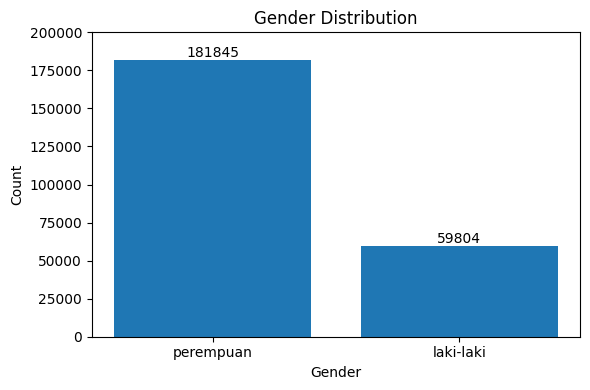

In [29]:
#@title **Gender Distribution**
plt.figure(figsize=(6, 4))

plt.bar(user['gender'].unique(), user['gender'].value_counts())
plt.ylim(0,200000)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

for i, count in enumerate(user['gender'].value_counts()):
    plt.text(i, count + 0.1, f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


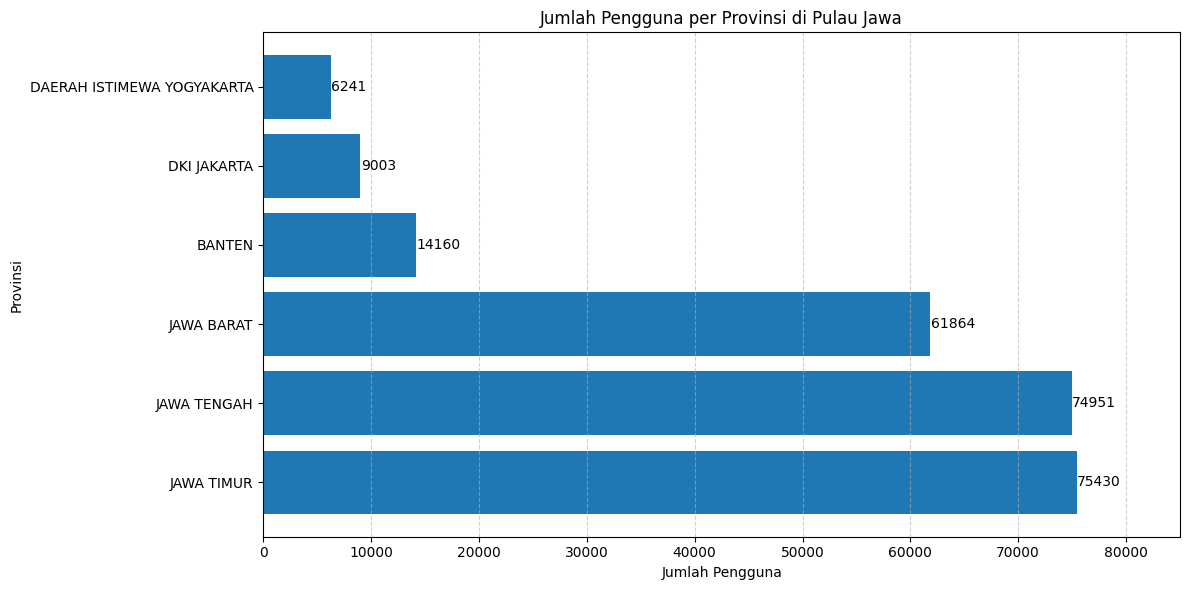

In [30]:
#@title **Jumlah Pengguna**
asprov = user.groupby('nama provinsi')['user_id'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.barh(asprov.index, asprov.values)

plt.xlim(0,85000)
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Provinsi')
plt.title('Jumlah Pengguna per Provinsi di Pulau Jawa')

plt.grid(axis='x', linestyle='--', alpha=0.6)


for i, v in enumerate(asprov.values):
    plt.annotate(f"{v}", xy=(v + 50, i), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

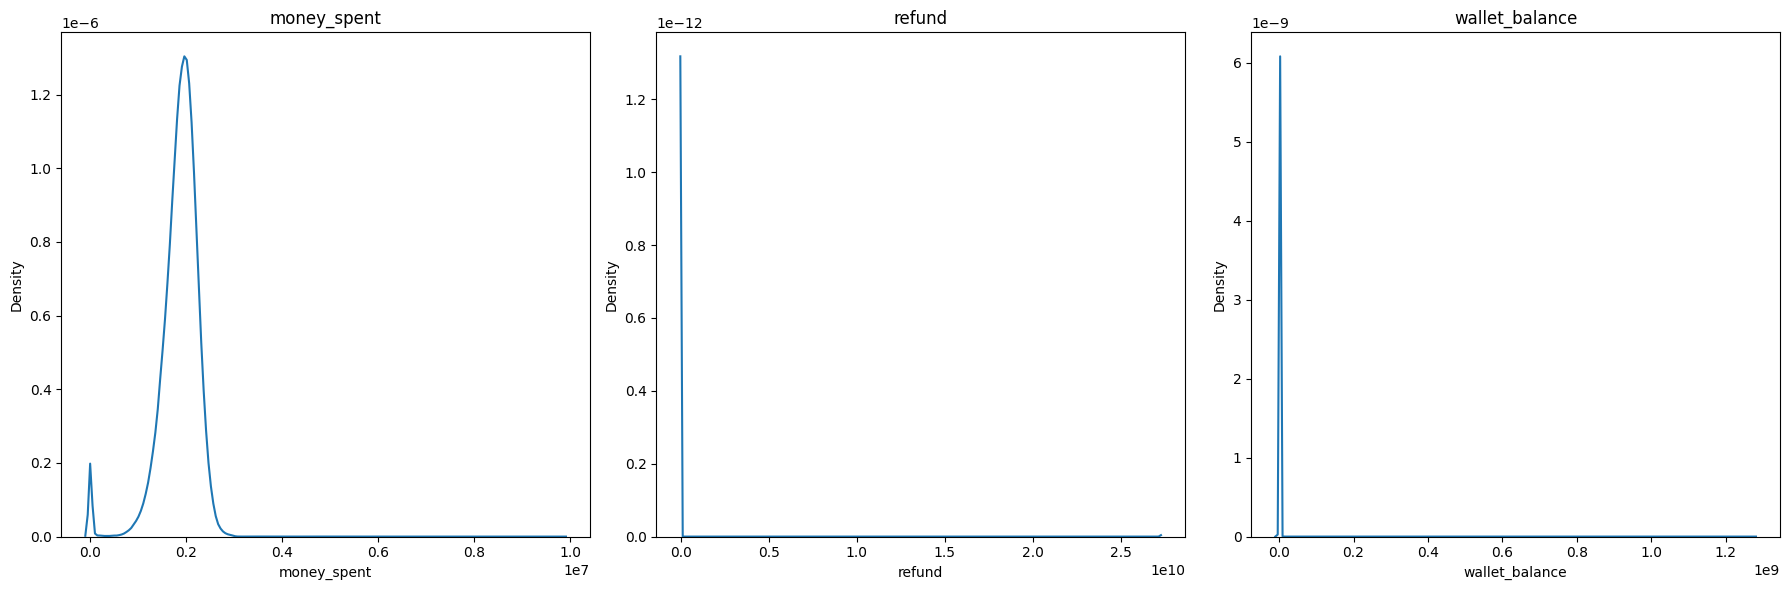

In [31]:
#@title **Numeric Columns Distribution on User Dataset**
columns = ['money_spent', 'refund', 'wallet_balance']

plt.figure(figsize=(18, 6))

for i, col in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(x=col, data=user)
    plt.title(f'{col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

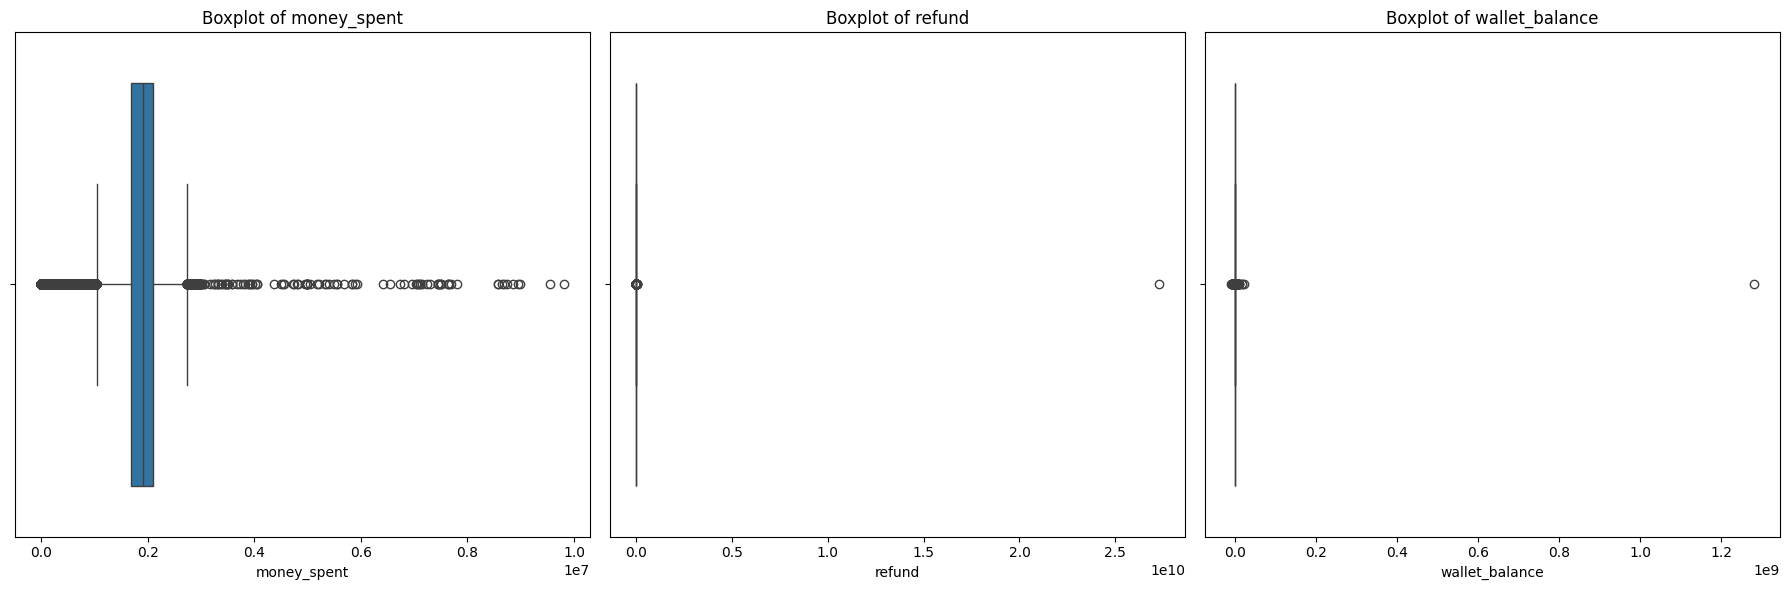

In [32]:
#@title **Boxplot**
plt.figure(figsize=(18, 6))

for i, col in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=col, data=user)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

> Ditemukan outliers yang sangat tinggi pada kolom `refund` dan `wallet_balance` sehingga kita akan lakukan treatment lanjutan pada Bagian Further Inspection


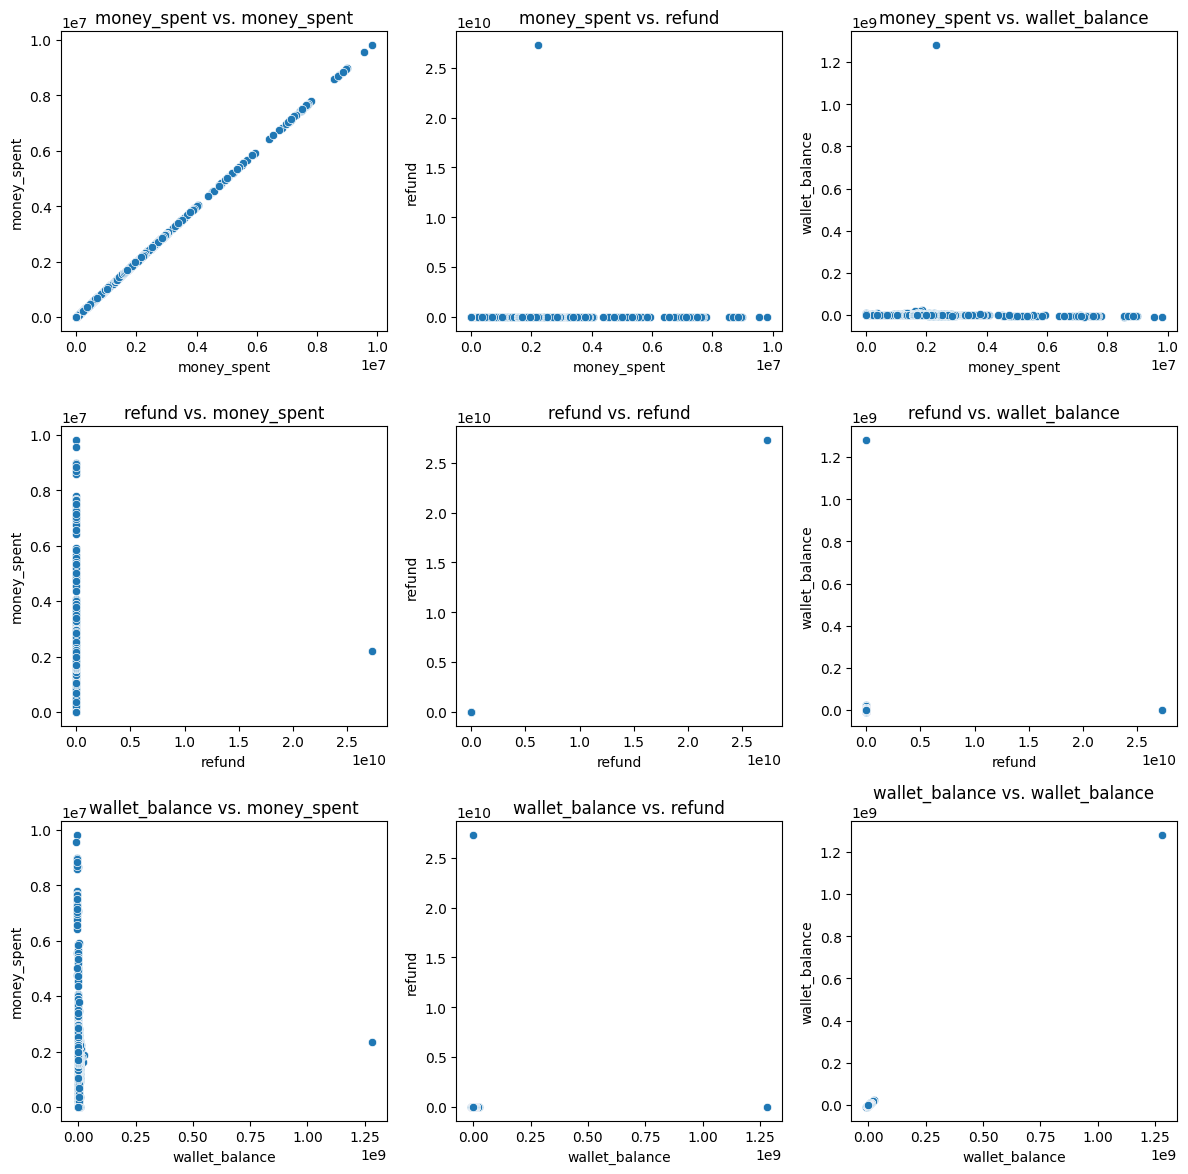

In [33]:
#@title **Scatterplot**
columns = ['money_spent', 'refund', 'wallet_balance']

# Membuat figure window baru
plt.figure(figsize=(12, 12))  # "figsize" adalah argumen untuk mengatur lebar dan panjang

# Loop through all column combinations
for i, col1 in enumerate(columns):
  for j, col2 in enumerate(columns):
      # Calculate subplot position based on loop indices
      ax = plt.subplot(len(columns), len(columns), i * len(columns) + j + 1)
      sns.scatterplot(x=col1, y=col2, data=user)
      plt.title(f'{col1} vs. {col2}')
      plt.xlabel(col1)
      plt.ylabel(col2)

plt.tight_layout()
plt.show()


> Ditemukan outliers yang sangat tinggi pada kolom `refund` dan `wallet_balance` sehingga kita akan lakukan treatment lanjutan pada Bagian Further Inspection







<Axes: >

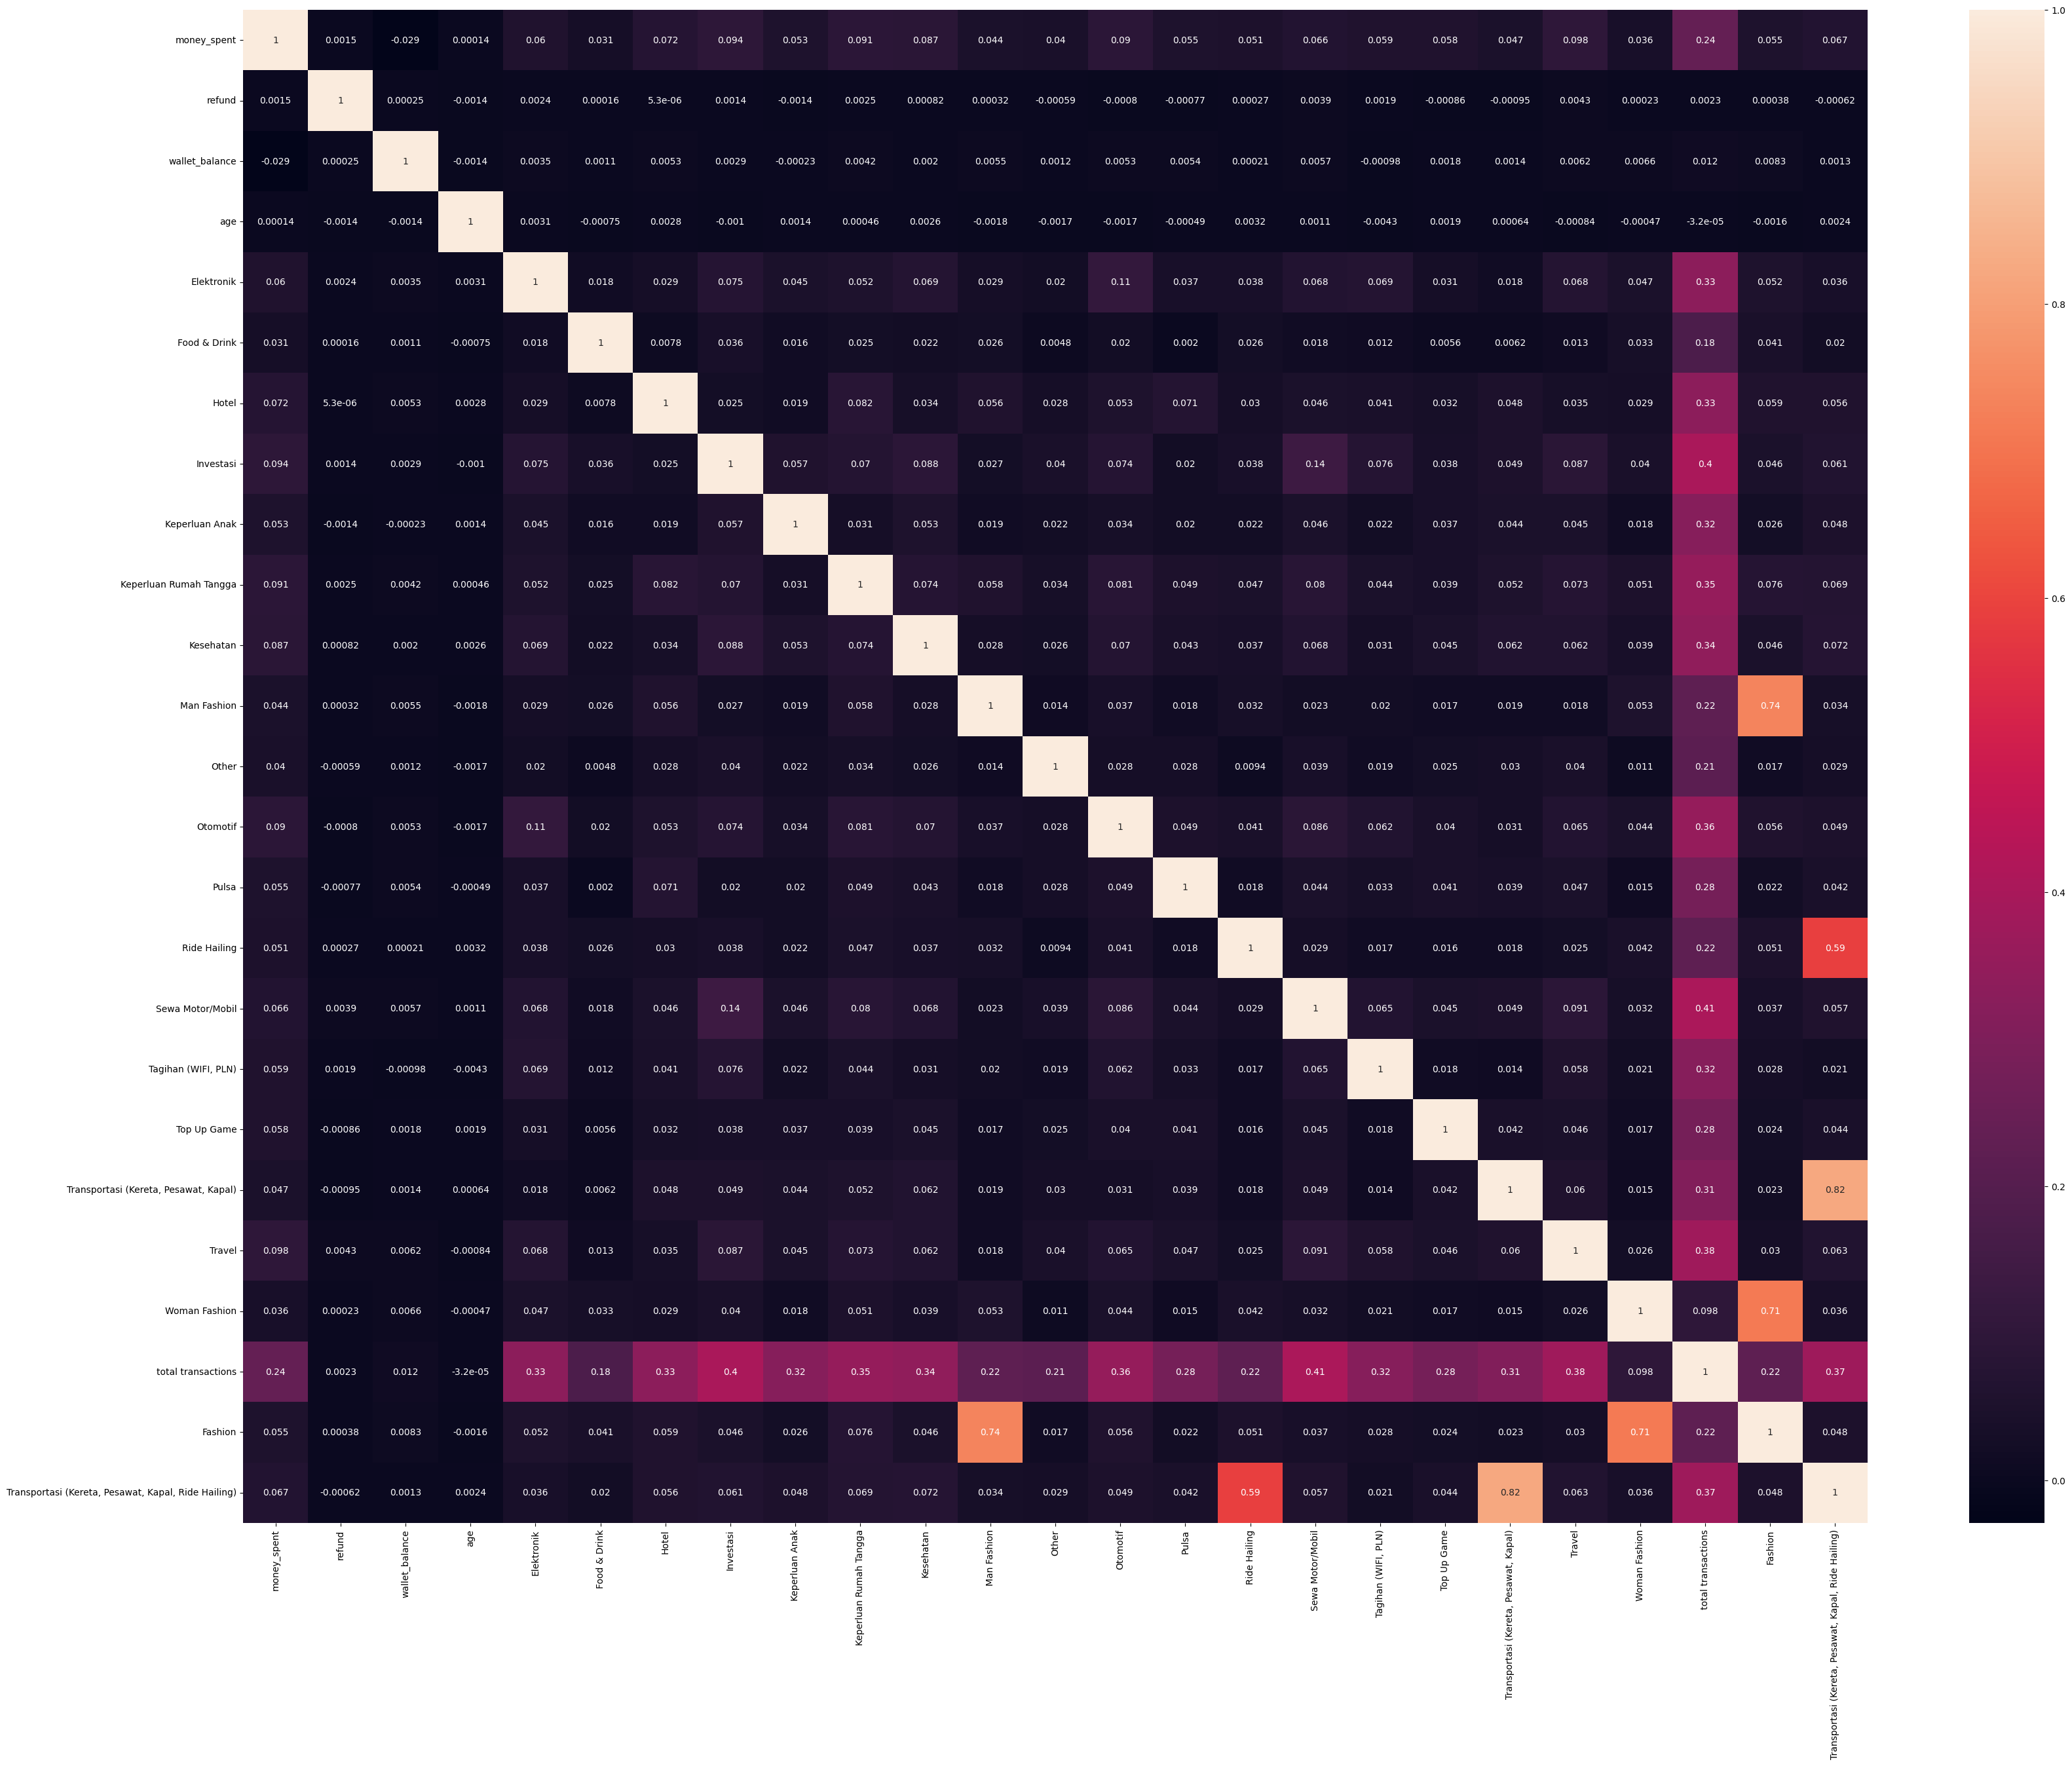

In [34]:
#@title **Heatmap - User Dataset**
plt.figure(figsize=(40,30))
sns.heatmap(user.corr(numeric_only=True), annot=True)

**Interpretasi Heatmap**
* Korelasi antara Money Spent dan Refund menunjukkan korelasi yang cenderung positif dan sangat lemah. Berdasarkan heatmap, semakin banyak jumlah uang yang dihabiskan, maka semakin banyak pula jumlah pengembalian dana, begitu juga sebaliknya.
* Korelasi antara Money Spent dan Wallet Ballance menunjukkan korelasi yang cenderung negatif dan sangat lemah. Berdasarkan heatmap, semakin banyak jumlah uang yang dihabiskan, maka semakin sedikit saldo dompet, begitu juga sebaliknya.
* Korelasi antara Refund dan Wallet Ballance menunjukkan korelasi yang cenderung positif dan sangat lemah. Berdasarkan heatmap, semakin banyak jumlah uang pengembalian dana, maka semakin sedikit saldo dompet, begitu juga sebaliknya.

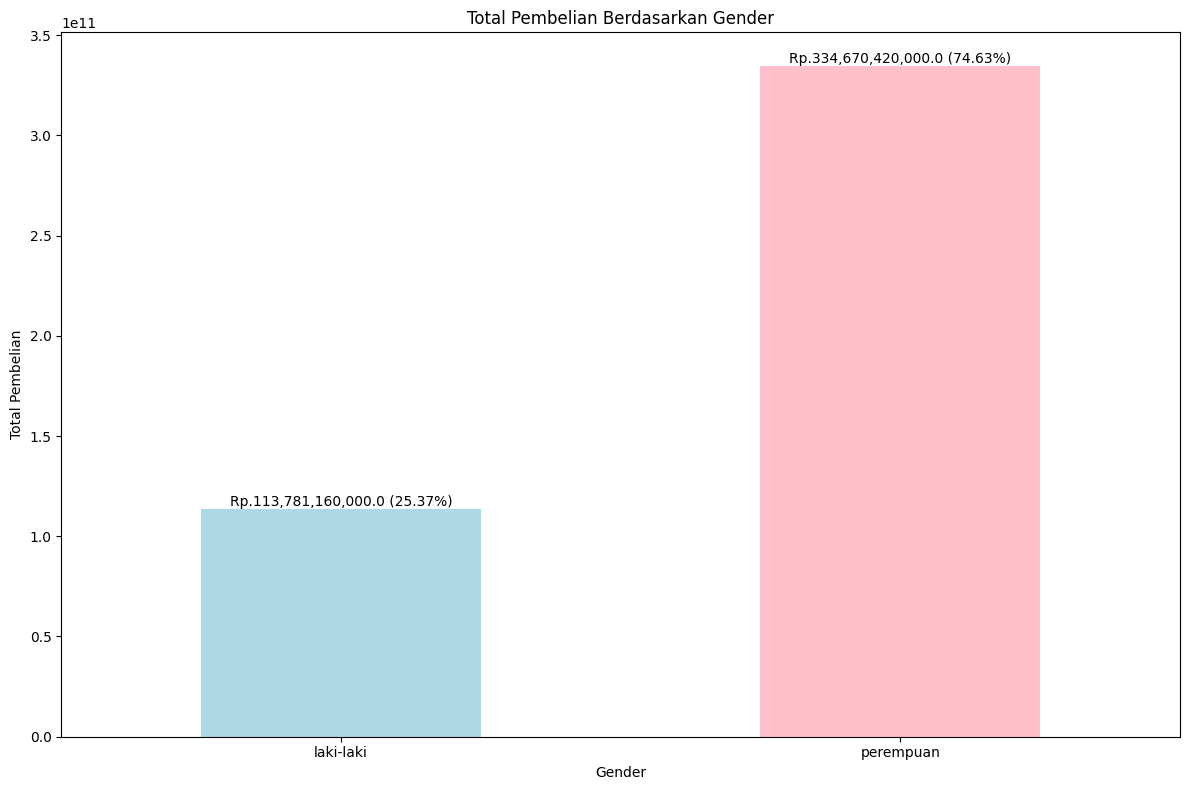

In [35]:
#@title **Kategori dengan pembelian terbanyak berdasarkan gender**
# Menghitung total pembelian berdasarkan gender
purchase_by_gender = user.groupby('gender')['money_spent'].sum()

# Plot bar chart
plt.figure(figsize=(12, 8))
purchase_by_gender.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Total Pembelian Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Total Pembelian')
plt.xticks(rotation=0)

# Menambahkan persentase di atas setiap bar
total_purchase = user['money_spent'].sum()
for index, value in enumerate(purchase_by_gender):
    percentage = (value / total_purchase) * 100
    plt.text(index, value + 30, f'Rp.{value:,} ({percentage:.2f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()

<ipython-input-36-ad38842f9d69>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age', y='money_spent', data=user, estimator=sum, ci=None)
<ipython-input-36-ad38842f9d69>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(user['age'], shade=True, color='skyblue')


<Figure size 1600x1200 with 0 Axes>

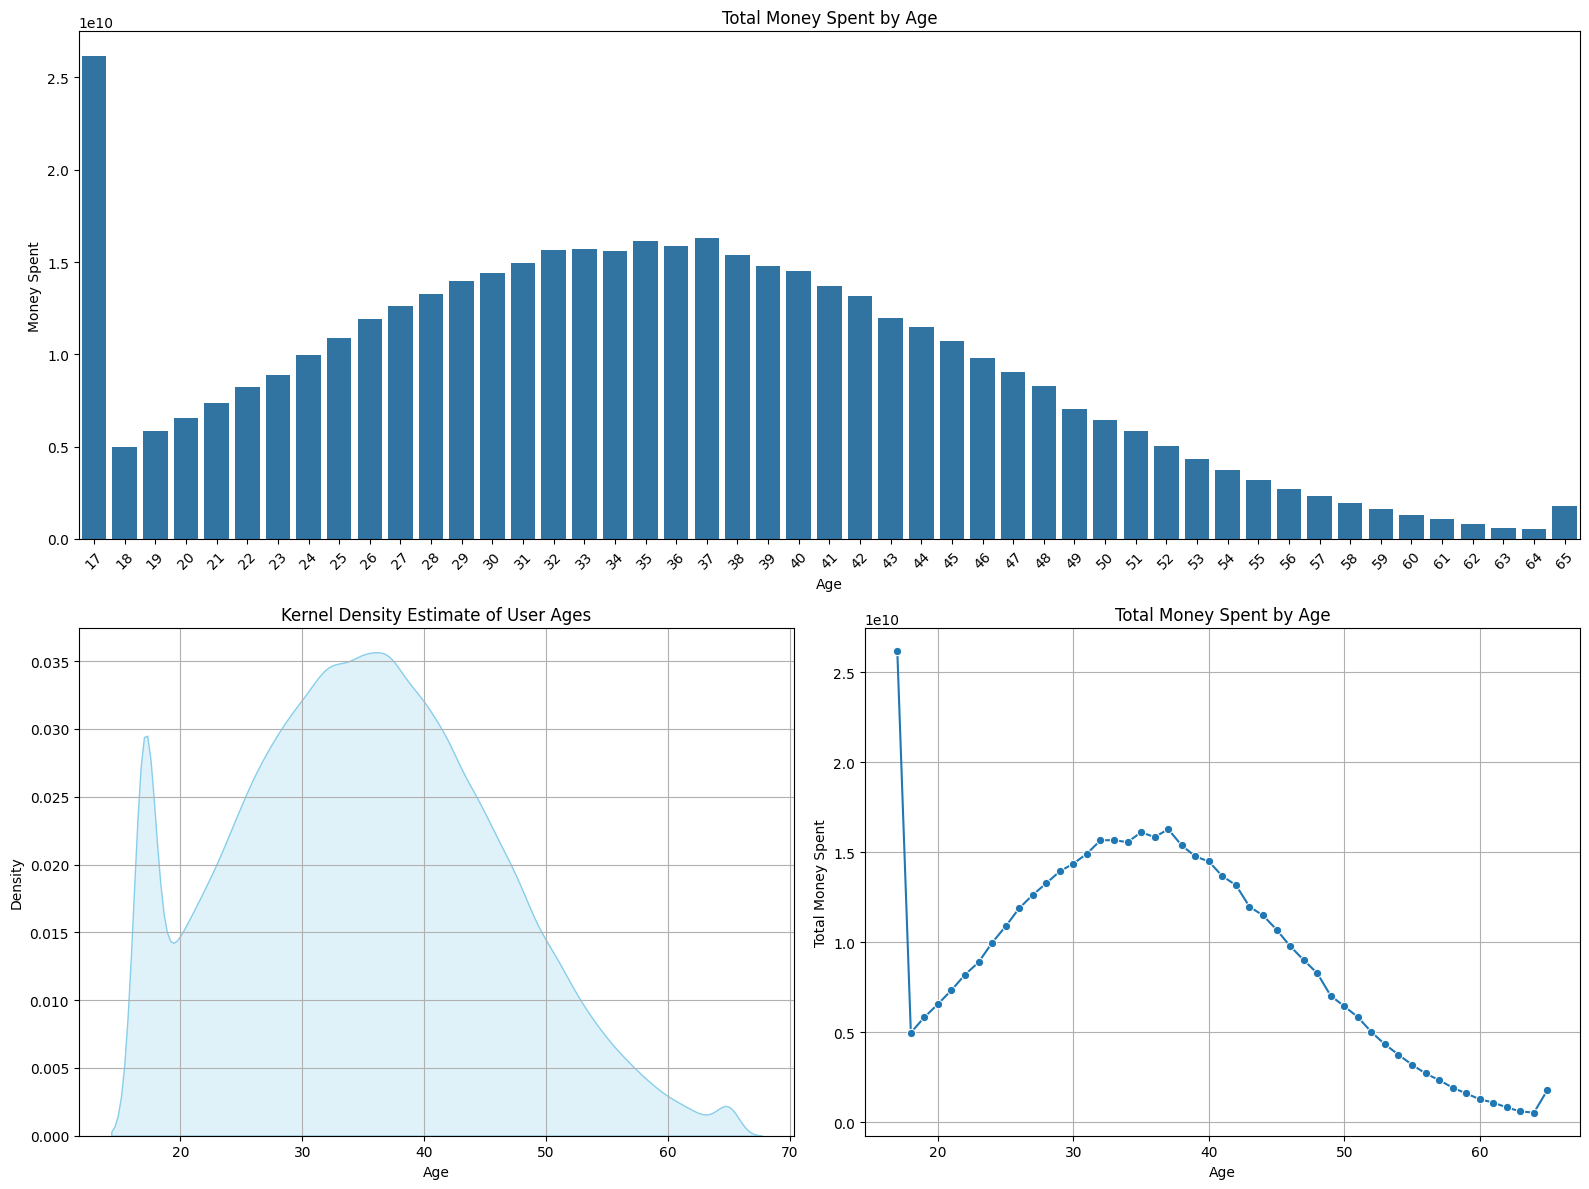

In [36]:
#@title **Total Pengeluaran Berdasarkan Usia**
plt.figure(figsize=(16, 12))

from matplotlib.gridspec import GridSpec

# Membuat figure dan grid spec
plt.figure(figsize=(16, 12))
gs = GridSpec(2, 2, width_ratios=[1, 1])

# Subplot pertama: Bar plot (mengisi baris pertama secara penuh)
plt.subplot(gs[0, :])  # 2 baris, 2 kolom, plot pertama (baris pertama secara penuh)
sns.barplot(x='age', y='money_spent', data=user, estimator=sum, ci=None)
plt.title('Total Money Spent by Age')
plt.xlabel('Age')
plt.ylabel('Money Spent')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot kedua: KDE plot
plt.subplot(gs[1, 0])  # 2 baris, 2 kolom, plot ketiga
sns.kdeplot(user['age'], shade=True, color='skyblue')
plt.title('Kernel Density Estimate of User Ages')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()

# Menghitung total uang yang dihabiskan berdasarkan umur
total_spent_by_age = user.groupby('age')['money_spent'].sum().reset_index()

# Subplot ketiga: Line plot
plt.subplot(gs[1, 1])  # 2 baris, 2 kolom, plot keempat
sns.lineplot(x='age', y='money_spent', data=total_spent_by_age, marker='o')
plt.title('Total Money Spent by Age')
plt.xlabel('Age')
plt.ylabel('Total Money Spent')
plt.grid(True)
plt.tight_layout()

# Menampilkan plot
plt.show()

<ipython-input-37-64c12eb224b2>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='money_spent', data=user, estimator=sum, ci=None)


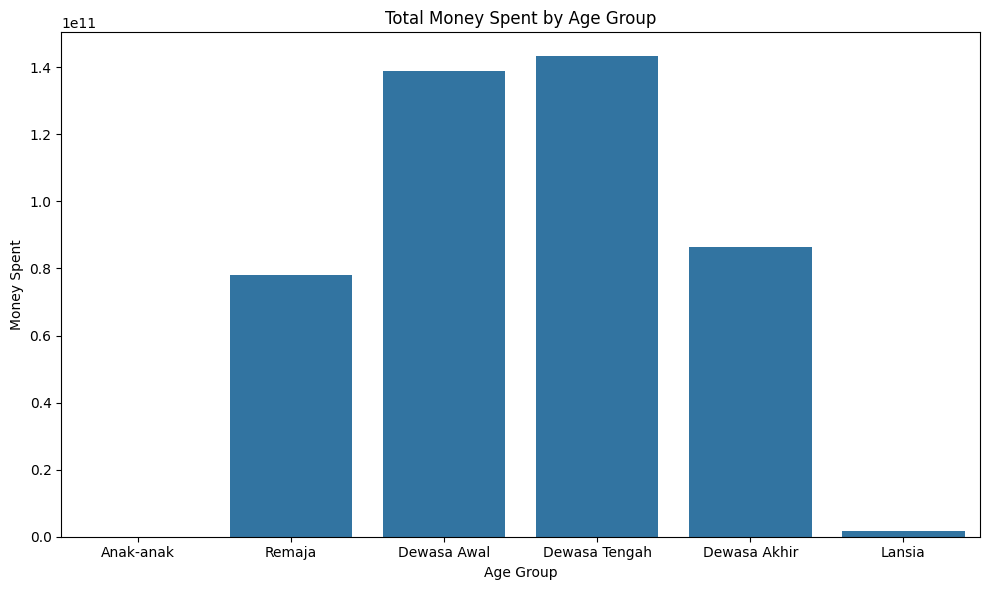

In [37]:
#@title **Plotting bar plot berdasarkan kategori usia**
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='money_spent', data=user, estimator=sum, ci=None)
plt.title('Total Money Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Money Spent')
plt.tight_layout()
plt.show()

<ipython-input-38-f47c3509be1d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_gross_per_category.index, y=total_gross_per_category.values, palette='viridis', native_scale=False)


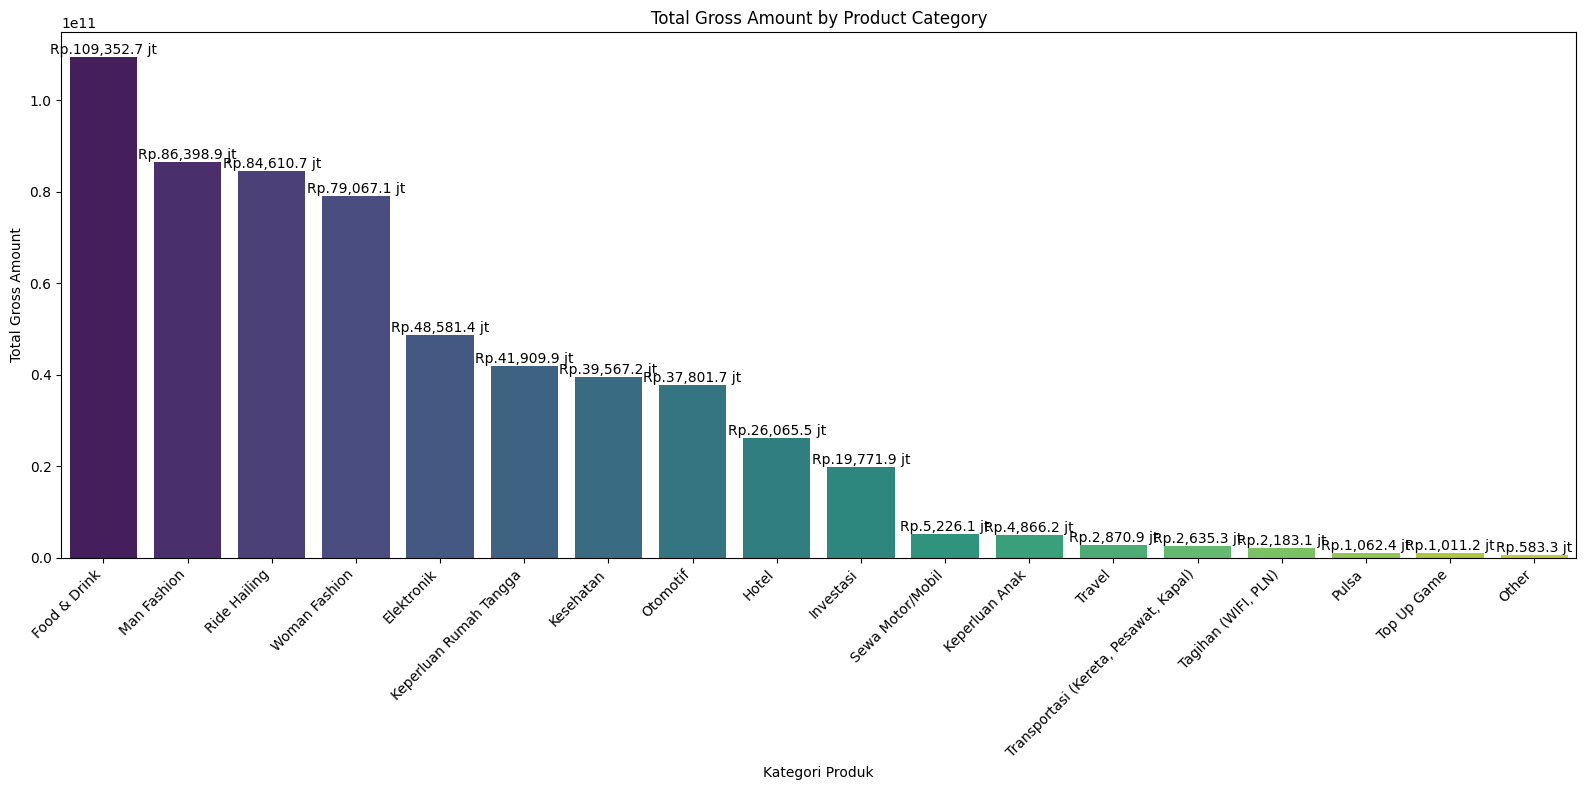

In [38]:
#@title **Gross Amount berdasarkan Kategori Produk**
total_gross_per_category = history.groupby('product name')['gross_amount'].sum()
total_gross_per_category = total_gross_per_category.sort_values(ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(x=total_gross_per_category.index, y=total_gross_per_category.values, palette='viridis', native_scale=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Gross Amount')
plt.title('Total Gross Amount by Product Category')
for index, value in enumerate(total_gross_per_category):
    juta = value / 1000000
    if value < 1000000:
      plt.text(index, value + 30, f'Rp.{juta:,.1f} ribu', ha='center', va='bottom')
    else:
      plt.text(index, value + 30, f'Rp.{juta:,.1f} jt', ha='center', va='bottom')
plt.tight_layout()
plt.show()

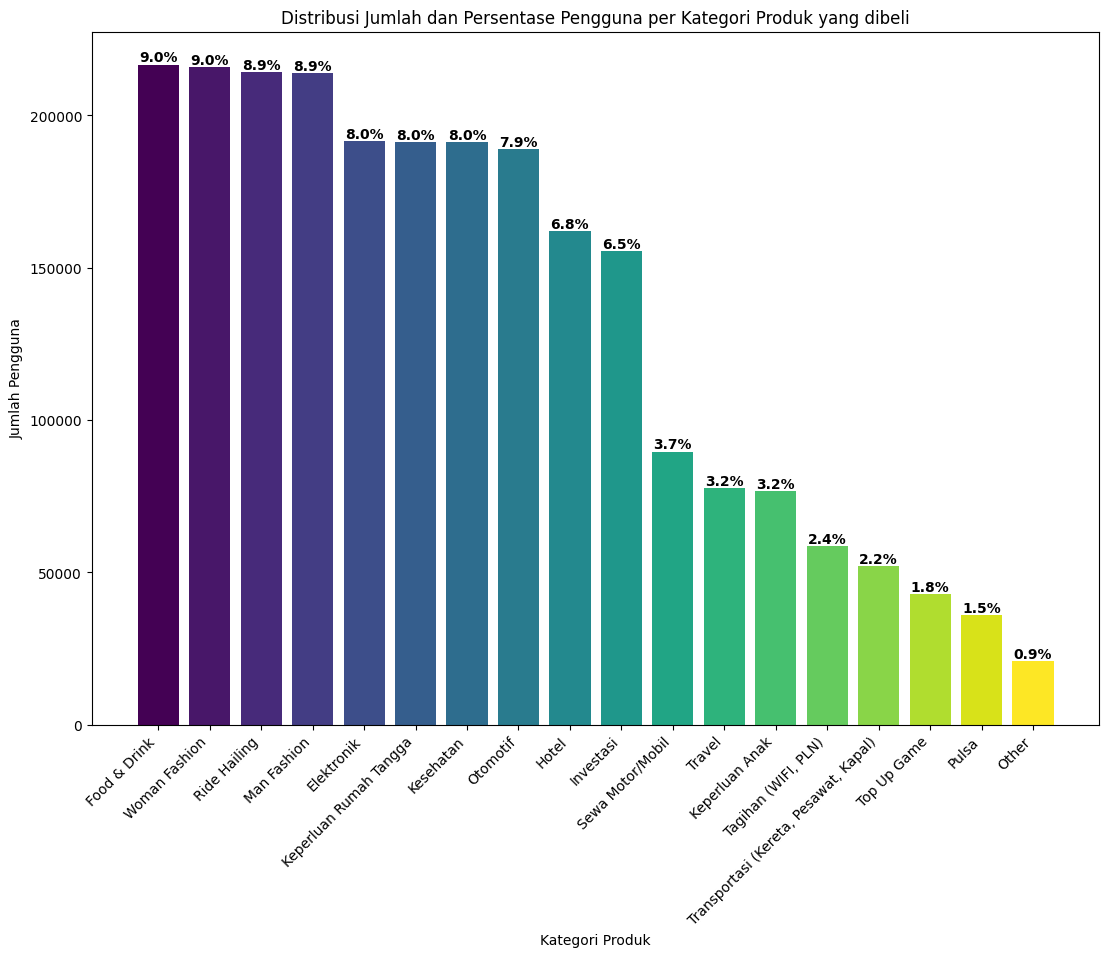

In [39]:
#@title **Jumlah User berdasarkan kategori produk/jasa yang dibeli**
user_per_category = history.groupby('product name')['user_id'].nunique()

# Mengurutkan data berdasarkan jumlah descending
user_per_category_sorted = user_per_category.sort_values(ascending=False)

# Menghitung persentase
total_users = user_per_category_sorted.sum()
percentages = (user_per_category_sorted / total_users) * 100

# Membuat bar chart
colors = plt.cm.viridis(np.linspace(0, 1, user_per_category_sorted.size))
plt.figure(figsize=(13, 9))
bars = plt.bar(user_per_category_sorted.index, user_per_category_sorted, color=colors)

# Mengatur label
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.title('Distribusi Jumlah dan Persentase Pengguna per Kategori Produk yang dibeli')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, ha='right')

# Menampilkan grafik
plt.show()


<ipython-input-40-ec6445a27d17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_per_category.index, y=frequency_per_category.values, palette='viridis', native_scale=False)


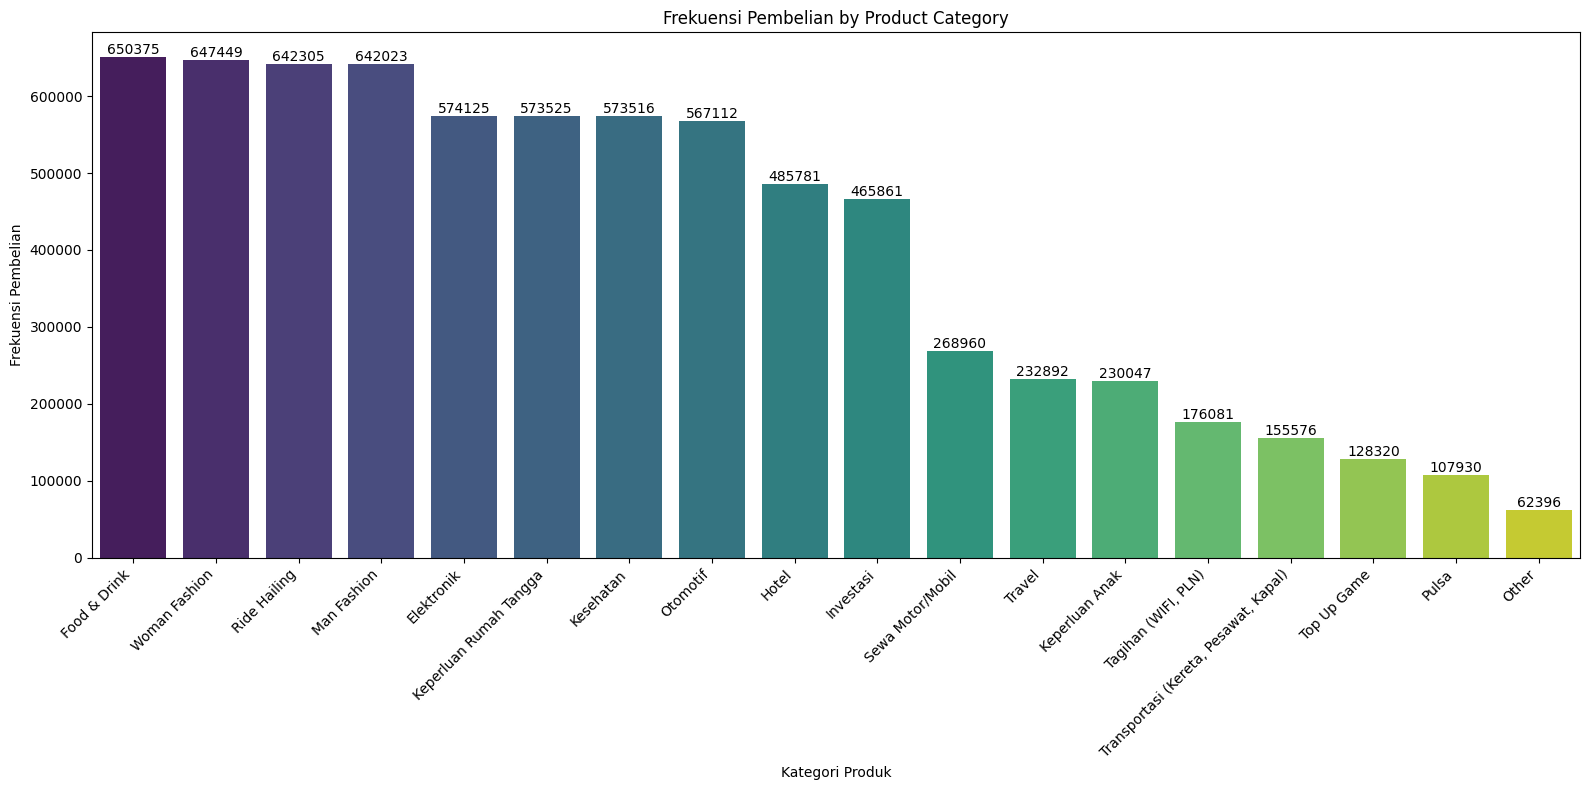

In [40]:
#@title **Frekuensi pembelian berdasarkan Kategori Produk**
frequency_per_category = history.groupby('product name')['product_id'].count()
frequency_per_category = frequency_per_category.sort_values(ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(x=frequency_per_category.index, y=frequency_per_category.values, palette='viridis', native_scale=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Kategori Produk')
plt.ylabel('Frekuensi Pembelian')
plt.title('Frekuensi Pembelian by Product Category')
for index, value in enumerate(frequency_per_category):
  plt.text(index, value + 5, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# **Feature Engineering**

##**Data Preparation - Final**

Disini kita bertujuan untuk memperbaiki beberapa kolom karena Datatype yang digunakan tidak sesuai dan menindaklanjuti hasil EDA pada bagian Scatter Plot dan Boxplot karena ada user yang terindikasi sebagai outliers


###**Handling Outliers**

In [41]:
#@markdown Pada kolom max ditemukan bahwa ada user yang jangkauan nilainya sangat jauh dibandingkan user yang lain sehingga tindakan yang akan diambil kita akan **menghapus user tersebut dari dataset**
user.describe()

money_spent                refund      wallet_balance  \
count            241,649.0             241,649.0           241,649.0   
mean  1,855,797.3755322802    309,721.2899701633  626,239.2974934719   
std    413,876.24368279614  55,476,654.862991676 2,632,006.368633035   
min                    0.0          -7,790,000.0        -9,550,000.0   
25%            1,680,000.0             110,000.0           460,000.0   
50%            1,910,000.0             180,000.0           610,000.0   
75%            2,100,000.0             270,000.0           780,000.0   
max            9,810,000.0 27,271,120,000.000004     1,280,390,000.0   

                     age         Elektronik       Food & Drink  \
count          241,649.0          220,306.0          220,306.0   
mean   35.19284582183249  2.606034334062622 2.9521438363004187   
std   10.606158136286115 1.2650178862000212 0.8957164439252988   
min                 17.0                0.0                0.0   
25%                 27.0                2.0                2.0   
50%                 35.0                3.0                3.0   
75%                 42.0                4.0                4.0   
max                 65.0                4.0                4.0   

                   Hotel          Investasi     Keperluan Anak  \
count          220,306.0          220,306.0          220,306.0   
mean  2.2050284604141512 2.1146087714360933  1.044215772607192   
std    1.495341364953838 1.5275345076002191 1.5079407378517402   
min                  0.0                0.0                0.0   
25%                  0.0                0.0                0.0   
50%                  2.0                2.0                0.0   
75%                  3.0                3.0                2.0   
max                  4.0                4.0                4.0   

       Keperluan Rumah Tangga  ...       Ride Hailing   Sewa Motor/Mobil  \
count               220,306.0  ...          220,306.0          220,306.0   
mean        2.603310849454849  ...  2.915512968325874 1.2208473668442983   
std         1.267361705437758  ... 0.9428999741351056 1.5635583749343995   
min                       0.0  ...                0.0                0.0   
25%                       2.0  ...                2.0                0.0   
50%                       3.0  ...                3.0                0.0   
75%                       4.0  ...                4.0                3.0   
max                       4.0  ...                4.0                4.0   

       Tagihan (WIFI, PLN)        Top Up Game  \
count            220,306.0          220,306.0   
mean     0.799256488702078 0.5824625747823482   
std     1.3924239340529225  1.239405802916932   
min                    0.0                0.0   
25%                    0.0                0.0   
50%                    0.0                0.0   
75%                    2.0                0.0   
max                    4.0                4.0   

       Transportasi (Kereta, Pesawat, Kapal)             Travel  \
count                              220,306.0          220,306.0   
mean                      0.7061814022314418  1.057129628789048   
std                       1.3319466737452408 1.5123182070349444   
min                                      0.0                0.0   
25%                                      0.0                0.0   
50%                                      0.0                0.0   
75%                                      0.0                2.0   
max                                      4.0                4.0   

           Woman Fashion  total transactions            Fashion  \
count          220,306.0           241,649.0          220,306.0   
mean   2.938862309696513  27.050908549176697  5.853095240256734   
std   0.9108200863015284  10.673694065175885 1.3489063114298787   
min                  0.0                 0.0                0.0   
25%                  2.0                24.0                5.0   
50%                  3.0                29.

In [42]:
user[user['refund'] == 27271120000.000004]

user_id    full_name     gender  money_spent  \
128554  SC3371011009009  AZ WADU ADE  perempuan  2,210,000.0   

                      refund  wallet_balance   join_date       birth  \
128554 27,271,120,000.000004       750,000.0  2023-12-09  1996-11-14   

       nama provinsi nama kabupaten  ... Ride Hailing  Sewa Motor/Mobil  \
128554   JAWA TENGAH  KOTA MAGELANG  ...          3.0               4.0   

       Tagihan (WIFI, PLN)  Top Up Game  \
128554                 2.0          0.0   

        Transportasi (Kereta, Pesawat, Kapal)  Travel  Woman Fashion  \
128554                                    0.0     4.0            3.0   

        total transactions  Fashion  \
128554                37.0      6.0   

        Transportasi (Kereta, Pesawat, Kapal, Ride Hailing)  
128554                                                3.0    

[1 rows x 34 columns]

In [43]:
user[user['wallet_balance'] == 1280390000]

user_id         full_name     gender  money_spent    refund  \
176961  SC3525122021001  Rinaldi FERNANDA  laki-laki  2,330,000.0 200,000.0   

        wallet_balance   join_date       birth nama provinsi nama kabupaten  \
176961 1,280,390,000.0  2023-12-02  1993-08-21    JAWA TIMUR         GRESIK   

        ... Ride Hailing  Sewa Motor/Mobil Tagihan (WIFI, PLN)  Top Up Game  \
176961  ...          2.0               0.0                 0.0          0.0   

        Transportasi (Kereta, Pesawat, Kapal)  Travel  Woman Fashion  \
176961                                    0.0     4.0            4.0   

        total transactions  Fashion  \
176961                31.0      7.0   

        Transportasi (Kereta, Pesawat, Kapal, Ride Hailing)  
176961                                                2.0    

[1 rows x 34 columns]

In [44]:
user = user[user['refund'] < 27271120000.000004]
user = user[user['wallet_balance'] < 1280390000]

###**Changing Datatypes - User Dataset**

In [45]:
user['join_date'] = pd.to_datetime(user['join_date'])
user['birth'] = pd.to_datetime(user['birth'])
user['age'] = user['age'].astype('int64')

###**Changing Datatypes - History Dataset**

In [46]:
history['transaction_date'] = pd.to_datetime(history['transaction_date'])
# history.to_csv('/content/drive/MyDrive/Tim 10D Final Project Drive/Dataset/history.csv')

## **Feature Creation - Final**

In [47]:
#@title **Handilng Missing Values due Feature Creation**
#@markdown Ditemukan bahwa Feature Engineering yang dihasilkan untuk beberapa user menghasilkan `NaN` Values, kita akan inspeksi kenapa ini bisa terjadi
user.isnull().sum()

user_id                                                    0
full_name                                                  0
gender                                                     0
money_spent                                                0
refund                                                     0
wallet_balance                                             0
join_date                                                  0
birth                                                      0
nama provinsi                                              0
nama kabupaten                                             0
nama kecamatan                                             0
age                                                        0
age_group                                                  0
Elektronik                                             21343
Food & Drink                                           21343
Hotel                                                  21343
Investasi               

In [48]:
#@markdown Melihat bagaimana sebaran `NaN` values
user[user['Elektronik'].isnull()]

user_id                     full_name     gender  \
6       SC3402052002013                 PRAMUNINGTYAS  perempuan   
25      SC3402052001011                       ANTHONY  perempuan   
38      SC3402052001043                   MEGA S.Adm.  perempuan   
41      SC3402052003001                         KARTI  perempuan   
44      SC3402052003016  ANTONI SIREGAR S.Si.T., M.M.  laki-laki   
...                 ...                           ...        ...   
241481  SC3504011006019                 RACHMAN ANITA  perempuan   
241484  SC3504011006022                          AMIN  perempuan   
241523  SC3504011009004              Artha DHAMAYANTI  perempuan   
241528  SC3504011009009                    RISMAYANTI  perempuan   
241635  SC3504011004010            ANAK AMALIA S.Sos.  perempuan   

                money_spent    refund  wallet_balance  join_date      birth  \
6               1,900,000.0 160,000.0       460,000.0 2023-10-07 1994-09-22   
25              1,790,000.0 120,000.0       320,000.0 2023-12-30 1987-04-02   
38     1,569,999.9999999998 130,000.0       220,000.0 2023-10-20 2004-05-02   
41              1,770,000.0 180,000.0       530,000.0 2023-10-28 1998-01-16   
44              1,890,000.0 230,000.0       520,000.0 2023-11-27 1995-08-23   
...                     ...       ...             ...        ...        ...   
241481            370,000.0 310,000.0     2,200,000.0 2023-12-25 1979-05-18   
241484          1,820,000.0 270,000.0       740,000.0 2023-12-02 2007-10-17   
241523          1,840,000.0 230,000.0       540,000.0 2023-10-04 1979-05-22   
241528          2,180,000.0 170,000.0       590,000.0 2023-11-08 1998-05-20   
241635                  0.0       0.0             0.0 2024-06-06 1996-11-21   

                     nama provinsi nama kabupaten  ... Ride Hailing  \
6       DAERAH ISTIMEWA YOGYAKARTA         BANTUL  ...          NaN   
25      DAERAH ISTIMEWA YOGYAKARTA         BANTUL  ...          NaN   
38      DAERAH ISTIMEWA YOGYAKARTA         BANTUL  ...          NaN   
41      DAERAH ISTIMEWA YOGYAKARTA         BANTUL  ...          NaN   
44      DAERAH ISTIMEWA YOGYAKARTA         BANTUL  ...          NaN   
...                            ...            ...  ...          ...   
241481                  JAWA TIMUR    TULUNGAGUNG  ...          NaN   
241484                  JAWA TIMUR    TULUNGAGUNG  ...          NaN   
241523                  JAWA TIMUR    TULUNGAGUNG  ...          NaN   
241528                  JAWA TIMUR    TULUNGAGUNG  ...          NaN   
241635                  JAWA TIMUR    TULUNGAGUNG  ...          NaN   

        Sewa Motor/Mobil Tagihan (WIFI, PLN)  Top Up Game  \
6                    NaN                 NaN          NaN   
25                   NaN                 NaN          NaN   
38                   NaN                 NaN          NaN   
41                   NaN                 NaN          NaN   
44                   NaN                 NaN          NaN   
...                  ...                 ...          ...   
241481               NaN                 NaN          NaN   
241484               NaN                 NaN          NaN   
241523               NaN                 NaN          NaN   
241528               NaN                 NaN          NaN   
241635               NaN                 NaN          NaN   

        Transportasi (Kereta, Pesawat, Kapal)  Travel  Woman Fashion  \
6                                         NaN     NaN            NaN   
25                                        NaN     NaN            NaN   
38                                        NaN     NaN            NaN   
41                                        NaN     NaN            NaN   
44                                        NaN     NaN            NaN   
...                                       ...     ...            ...   
241481                                    NaN     NaN            NaN   
241484                                    NaN     NaN            NaN   
241523          

Muncul 2 dugaan kenapa `NaN` values ini banyak bermunculan:
1. Beberapa User tidak melakukan transaksi apapun di tahun 2024
2. Beberapa User memang melakukan transaksi di tahun 2024 namun bukti riwayat transaksi mereka tidak terekap pada dataset yang diberikan

In [49]:
#@markdown Dapat dilihat bahwa memang user yang mengalami kendala Missing Values ini, tidak ada riwayat transaksi apapun yang terekap pada dataset history, disini kita belum dapat menyimpulkan apa alasan Missing Values ini banyak bermunculan
test_mv = history[history['user_id'] == 'SC3402052001043']
test_mv

Empty DataFrame
Columns: [user_id, product_id, gross_amount, discounts, transaction_date, product name]
Index: []

Kita coba bandingkan dengan salah satu user yang memiliki data lengkap

Lalu muncul beberapa pertanyaan:
1. Pada bagian Data Preparation apakah dengan mengalikan 15000 pada kolom `gross_amount` dan `discount` itu sudah tepat? karena pada dataset user di kolom `money_spent`, `refund`, dan `wallet_balance` sudah dalam bentuk kurs rupiah bukan dalam bentuk dolar
2. Apakah kolom `money_spent` pada dataset user merupakan hasil penjumlahan `gross_amount` dari keseluruhan transaksi yang dilakukan oleh user tersebut pada tahun 2024?

Karena dengan menjawab kedua pertanyaan ini, kita dapat mengetahui diantara kedua dugaan `NaN` values yang muncul, manakah dugaan yang benar sehingga nantinya dapat mempermudah kita dalam mengambil tindakan tepat terhadap Missing Values yang bermunculan

In [50]:
test = history[history['user_id'] == 'SC3402052002010']
test['gross_amount'].sum()

1630000.0

In [51]:
#@markdown Mengkomparasikan hasil penjumlahan `gross_amount` dengan `money_spent` pada dataset user
user[user['user_id'] == 'SC3402052002010']

user_id             full_name     gender          money_spent  \
4  SC3402052002010  HARJOKO IHSAN S.Sos.  laki-laki 1,629,999.9999999998   

    refund  wallet_balance  join_date      birth               nama provinsi  \
4 80,000.0       190,000.0 2023-12-08 2006-06-18  DAERAH ISTIMEWA YOGYAKARTA   

  nama kabupaten  ... Ride Hailing  Sewa Motor/Mobil Tagihan (WIFI, PLN)  \
4         BANTUL  ...          3.0               0.0                 3.0   

   Top Up Game  Transportasi (Kereta, Pesawat, Kapal)  Travel  Woman Fashion  \
4          0.0                                    0.0     0.0            3.0   

   total transactions  Fashion  \
4                20.0      5.0   

   Transportasi (Kereta, Pesawat, Kapal, Ride Hailing)  
4                                                3.0    

[1 rows x 34 columns]

Dapat disimpulkan bahwa:
1. Mengalikan 15000 pada kolom `gross_amount` dan `discount` itu **sudah tepat**
2. Kolom `money_spent` pada dataset user **merupakan** hasil penjumlahan `gross_amount` dari keseluruhan transaksi yang dilakukan oleh user tersebut pada tahun 2024

Sehingga dugaan Missing Values yang kedua: ***User tersebut memang melakukan transaksi di tahun 2024 namun riwayat transaksi mereka tidak terekap pada dataset yang diberikan***, merupakan dugaan paling tepat mengapa `NaN` Values banyak bermunculan

In [52]:
#@markdown Lalu tindak lanjut yang dilakukan untuk mengatasi missing values ini, yaitu dengan **Menghapus user dengan riwayat transaksi mereka yang tidak terekap pada dataset yang diberikan karena jika kita isi Missing valuesnya dengan angka 0**, itu akan sangat mempengaruhi model yang kita buat nantinya
user.dropna(inplace=True)

In [53]:
user.isnull().sum()

user_id                                                0
full_name                                              0
gender                                                 0
money_spent                                            0
refund                                                 0
wallet_balance                                         0
join_date                                              0
birth                                                  0
nama provinsi                                          0
nama kabupaten                                         0
nama kecamatan                                         0
age                                                    0
age_group                                              0
Elektronik                                             0
Food & Drink                                           0
Hotel                                                  0
Investasi                                              0
Keperluan Anak                 

In [54]:
user.drop(columns=['Man Fashion', 'Woman Fashion', 'Ride Hailing', 'Transportasi (Kereta, Pesawat, Kapal)'], inplace=True)

## **Exploratory Data Analysis - Final**

###**Gender Distribution**

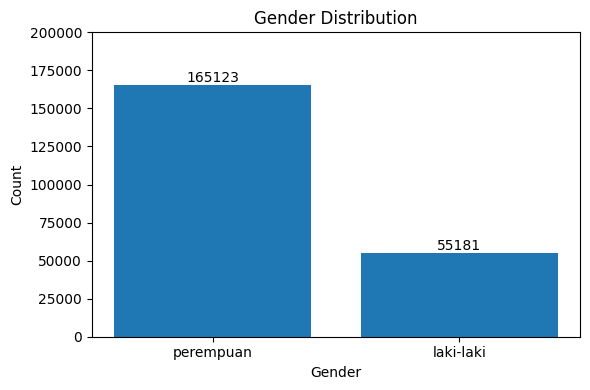

In [55]:
#@markdown
plt.figure(figsize=(6, 4))

plt.bar(user['gender'].unique(), user['gender'].value_counts())
plt.ylim(0,200000)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

for i, count in enumerate(user['gender'].value_counts()):
    plt.text(i, count + 0.1, f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


###**Jumlah Pengguna**

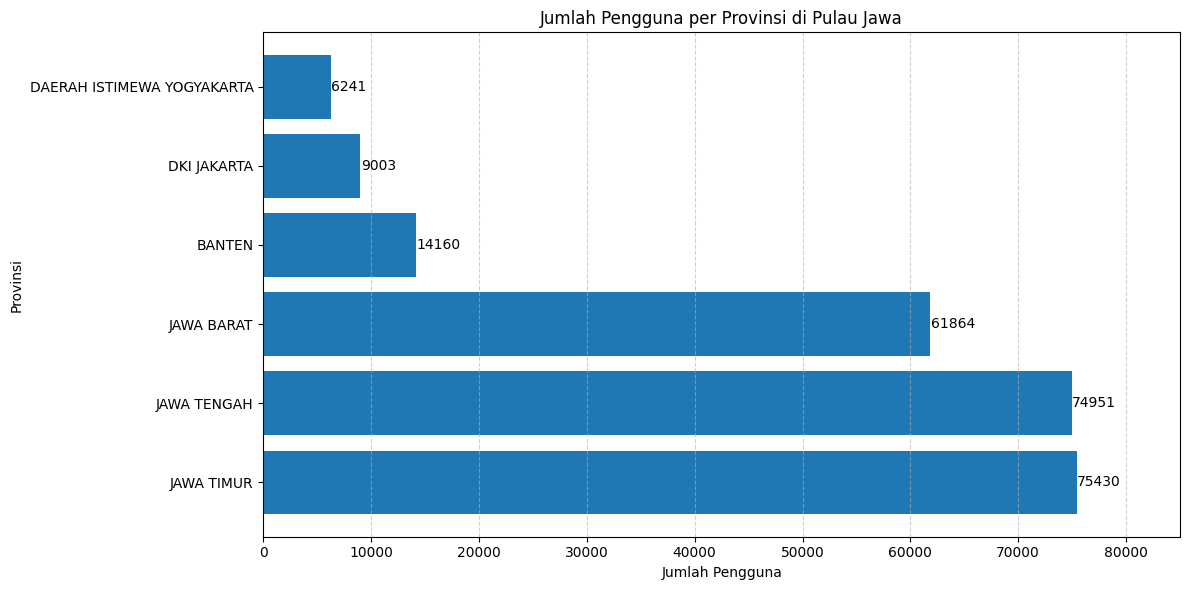

In [56]:
#@markdown
plt.figure(figsize=(12, 6))
plt.barh(asprov.index, asprov.values)

plt.xlim(0,85000)
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Provinsi')
plt.title('Jumlah Pengguna per Provinsi di Pulau Jawa')

plt.grid(axis='x', linestyle='--', alpha=0.6)

for i, v in enumerate(asprov.values):
    plt.annotate(f"{v}", xy=(v + 50, i), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

###**Numeric Columns Distribution on User Dataset**

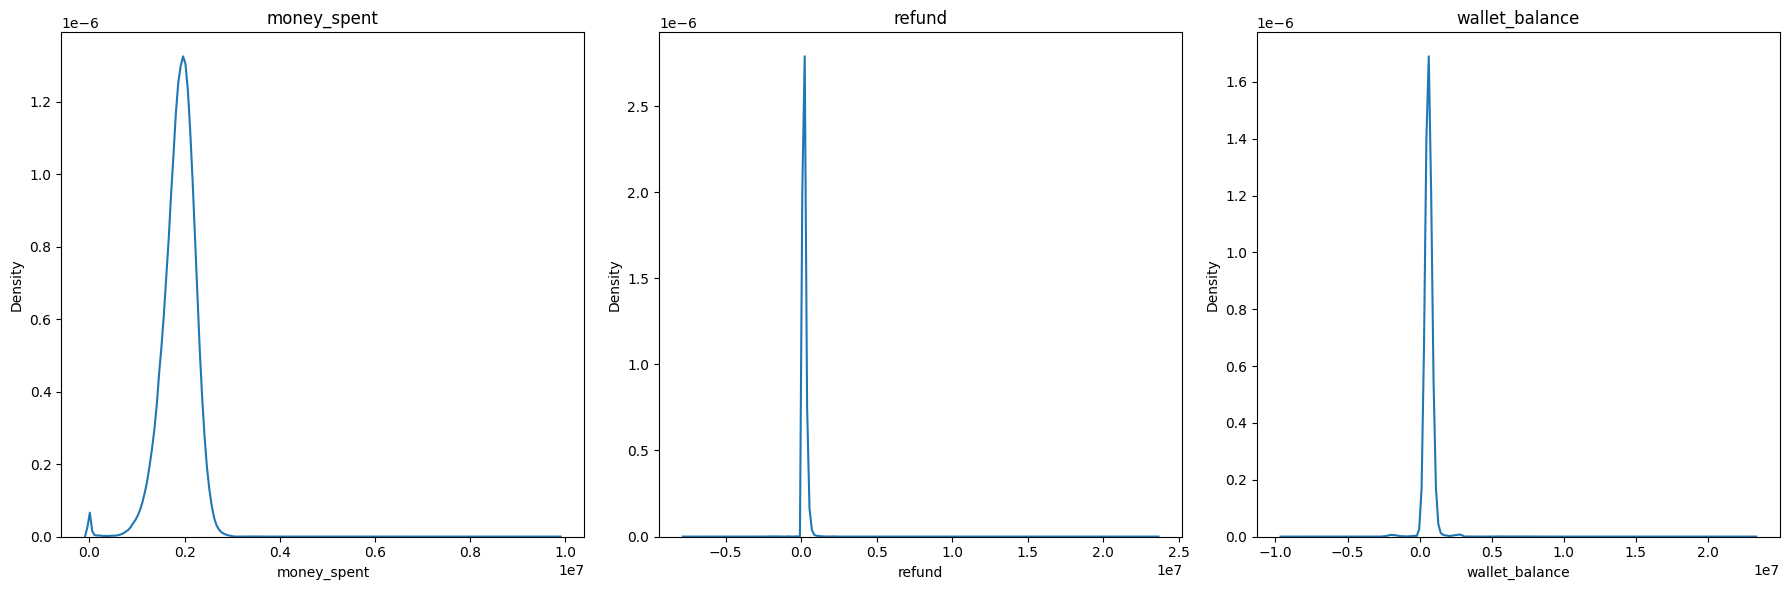

In [57]:
#@markdown
columns = ['money_spent', 'refund', 'wallet_balance']

plt.figure(figsize=(18, 6))

for i, col in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(x=col, data=user)
    plt.title(f'{col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### **Boxplot**

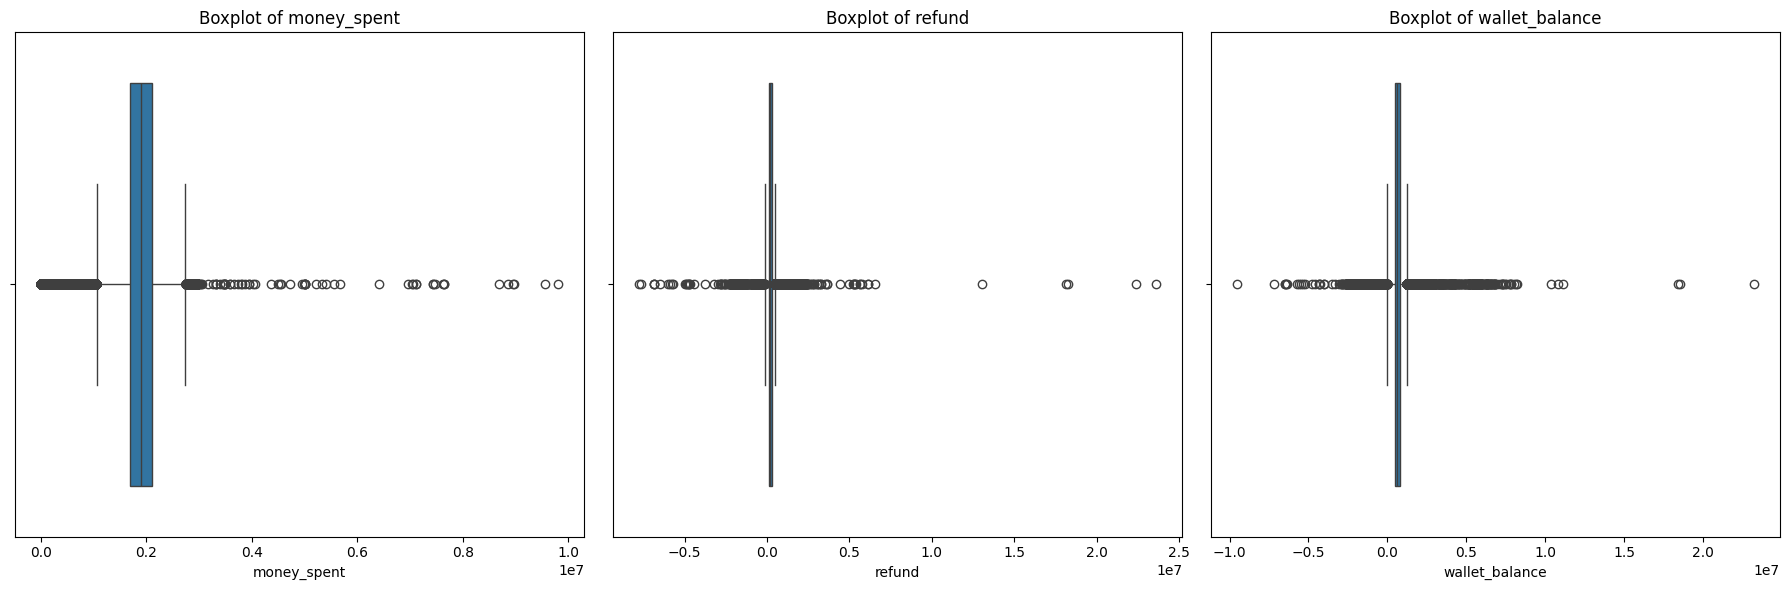

In [58]:
#@markdown
plt.figure(figsize=(18, 6))

for i, col in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=col, data=user)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

**Money Spent** : Sebagian besar pengguna membelanjakan uang dalam kisaran yang relatif moderat, namun ada juga yang membelanjakan lebih banyak secara signifikan

**Refund** : refund dana umumnya rendah, namun ada satu outlier penting yang jauh lebih tinggi dibandingkan yang lain, yang mungkin mengindikasikan transaksi pengembalian dana yang tidak biasa

**wallet balance** : Beberapa nilai ekstrem terlihat sebagai outlier, yang menunjukkan bahwa beberapa pengguna memiliki saldo dompet yang sangat tinggi dibandingkan mayoritas pengguna.

### **Scatterplot**

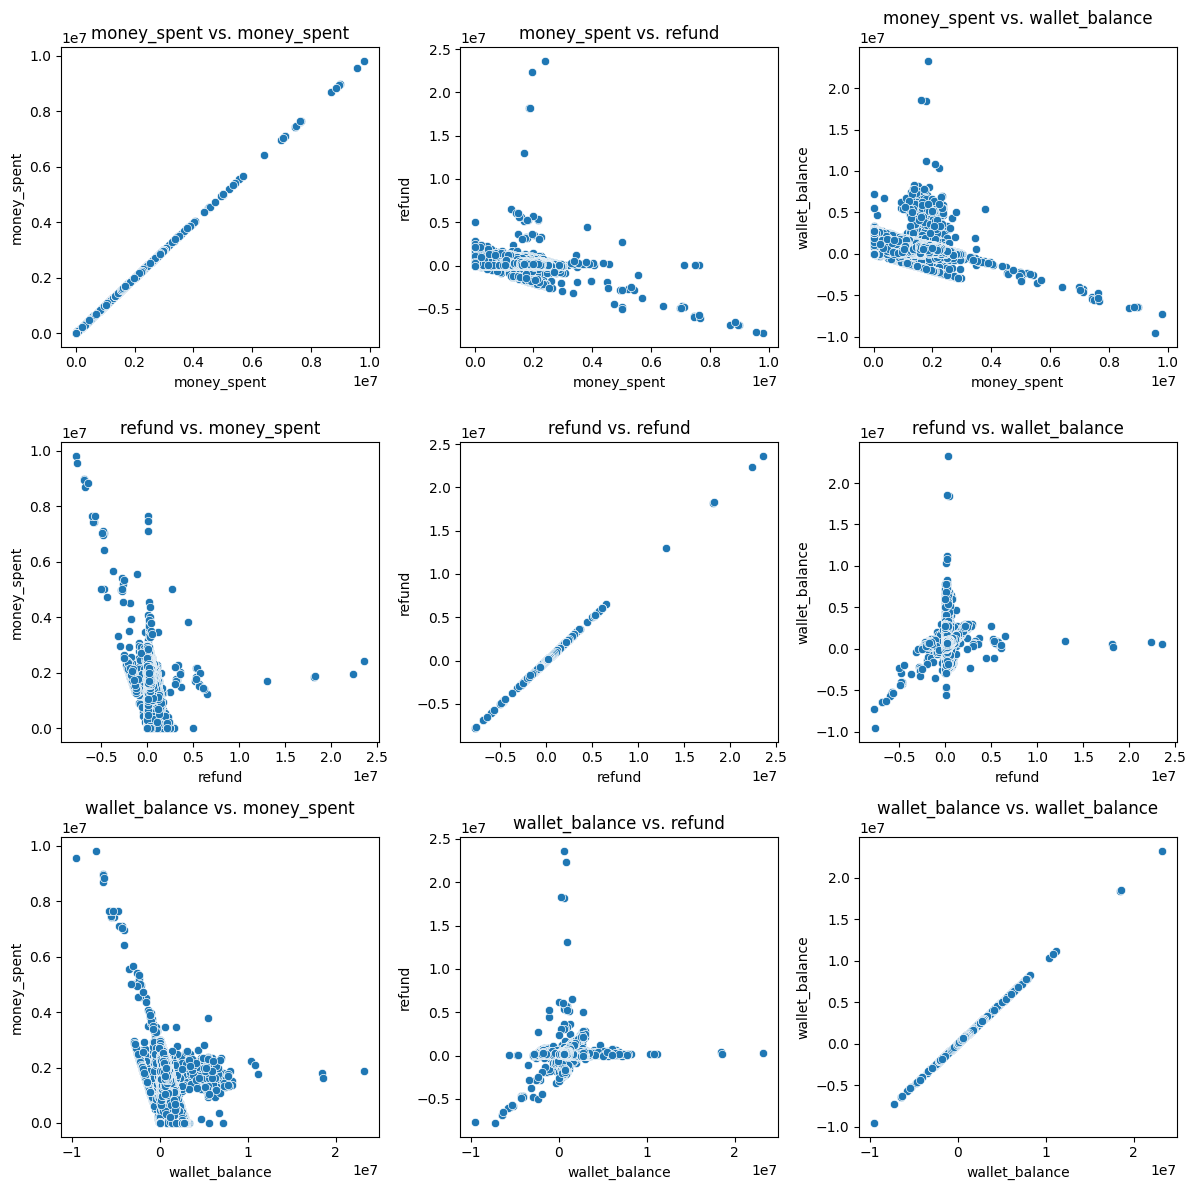

In [59]:
#@markdown
columns = ['money_spent', 'refund', 'wallet_balance']

# Membuat figure window baru
plt.figure(figsize=(12, 12))  # "figsize" adalah argumen untuk mengatur lebar dan panjang

# Loop through all column combinations
for i, col1 in enumerate(columns):
  for j, col2 in enumerate(columns):
      # Calculate subplot position based on loop indices
      ax = plt.subplot(len(columns), len(columns), i * len(columns) + j + 1)
      sns.scatterplot(x=col1, y=col2, data=user)
      plt.title(f'{col1} vs. {col2}')
      plt.xlabel(col1)
      plt.ylabel(col2)

plt.tight_layout()
plt.show()


**Interpretasi Scatter Plot**

* **Money Spent vs Refund**: Scatter plot menunjukkan tidak adanya hubungan yang linear antara keduanya. Semakin meningkatnya uang yang dihabiskan, tidak meningkatkan pengembalian dana yang diterima. Terdapat satu pencilan yang dapat diidentifikasi dalam scatter plot ini.
* **Money Spent vs Wallet Balance**: Scatter plot menunjukkan tidak adanya hubungan yang linear antara keduanya. Semakin meningkatnya uang yang dihabiskan, tidak meningkatkan pengembalian dana yang diterima. Terdapat satu pencilan yang dapat diidentifikasi dalam scatter plot ini.
* **Refund vs Wallet Balance**: Scatter plot menunjukkan adanya hubungan yang negatif antara keduanya. Terdapat 3 penyebaran data yang teridentifikasi pada scatter plot tersebut, yaitu ketika saldo dompet dan jumlah pengembalian dana nol, ketika saldo dompet tinggi sedangkan jumlah pengembalian dana rendah dan ketika saldo dompet rendah sedangkan pengembalian dana tinggi.







### **Heatmap - User Dataset**

<Axes: >

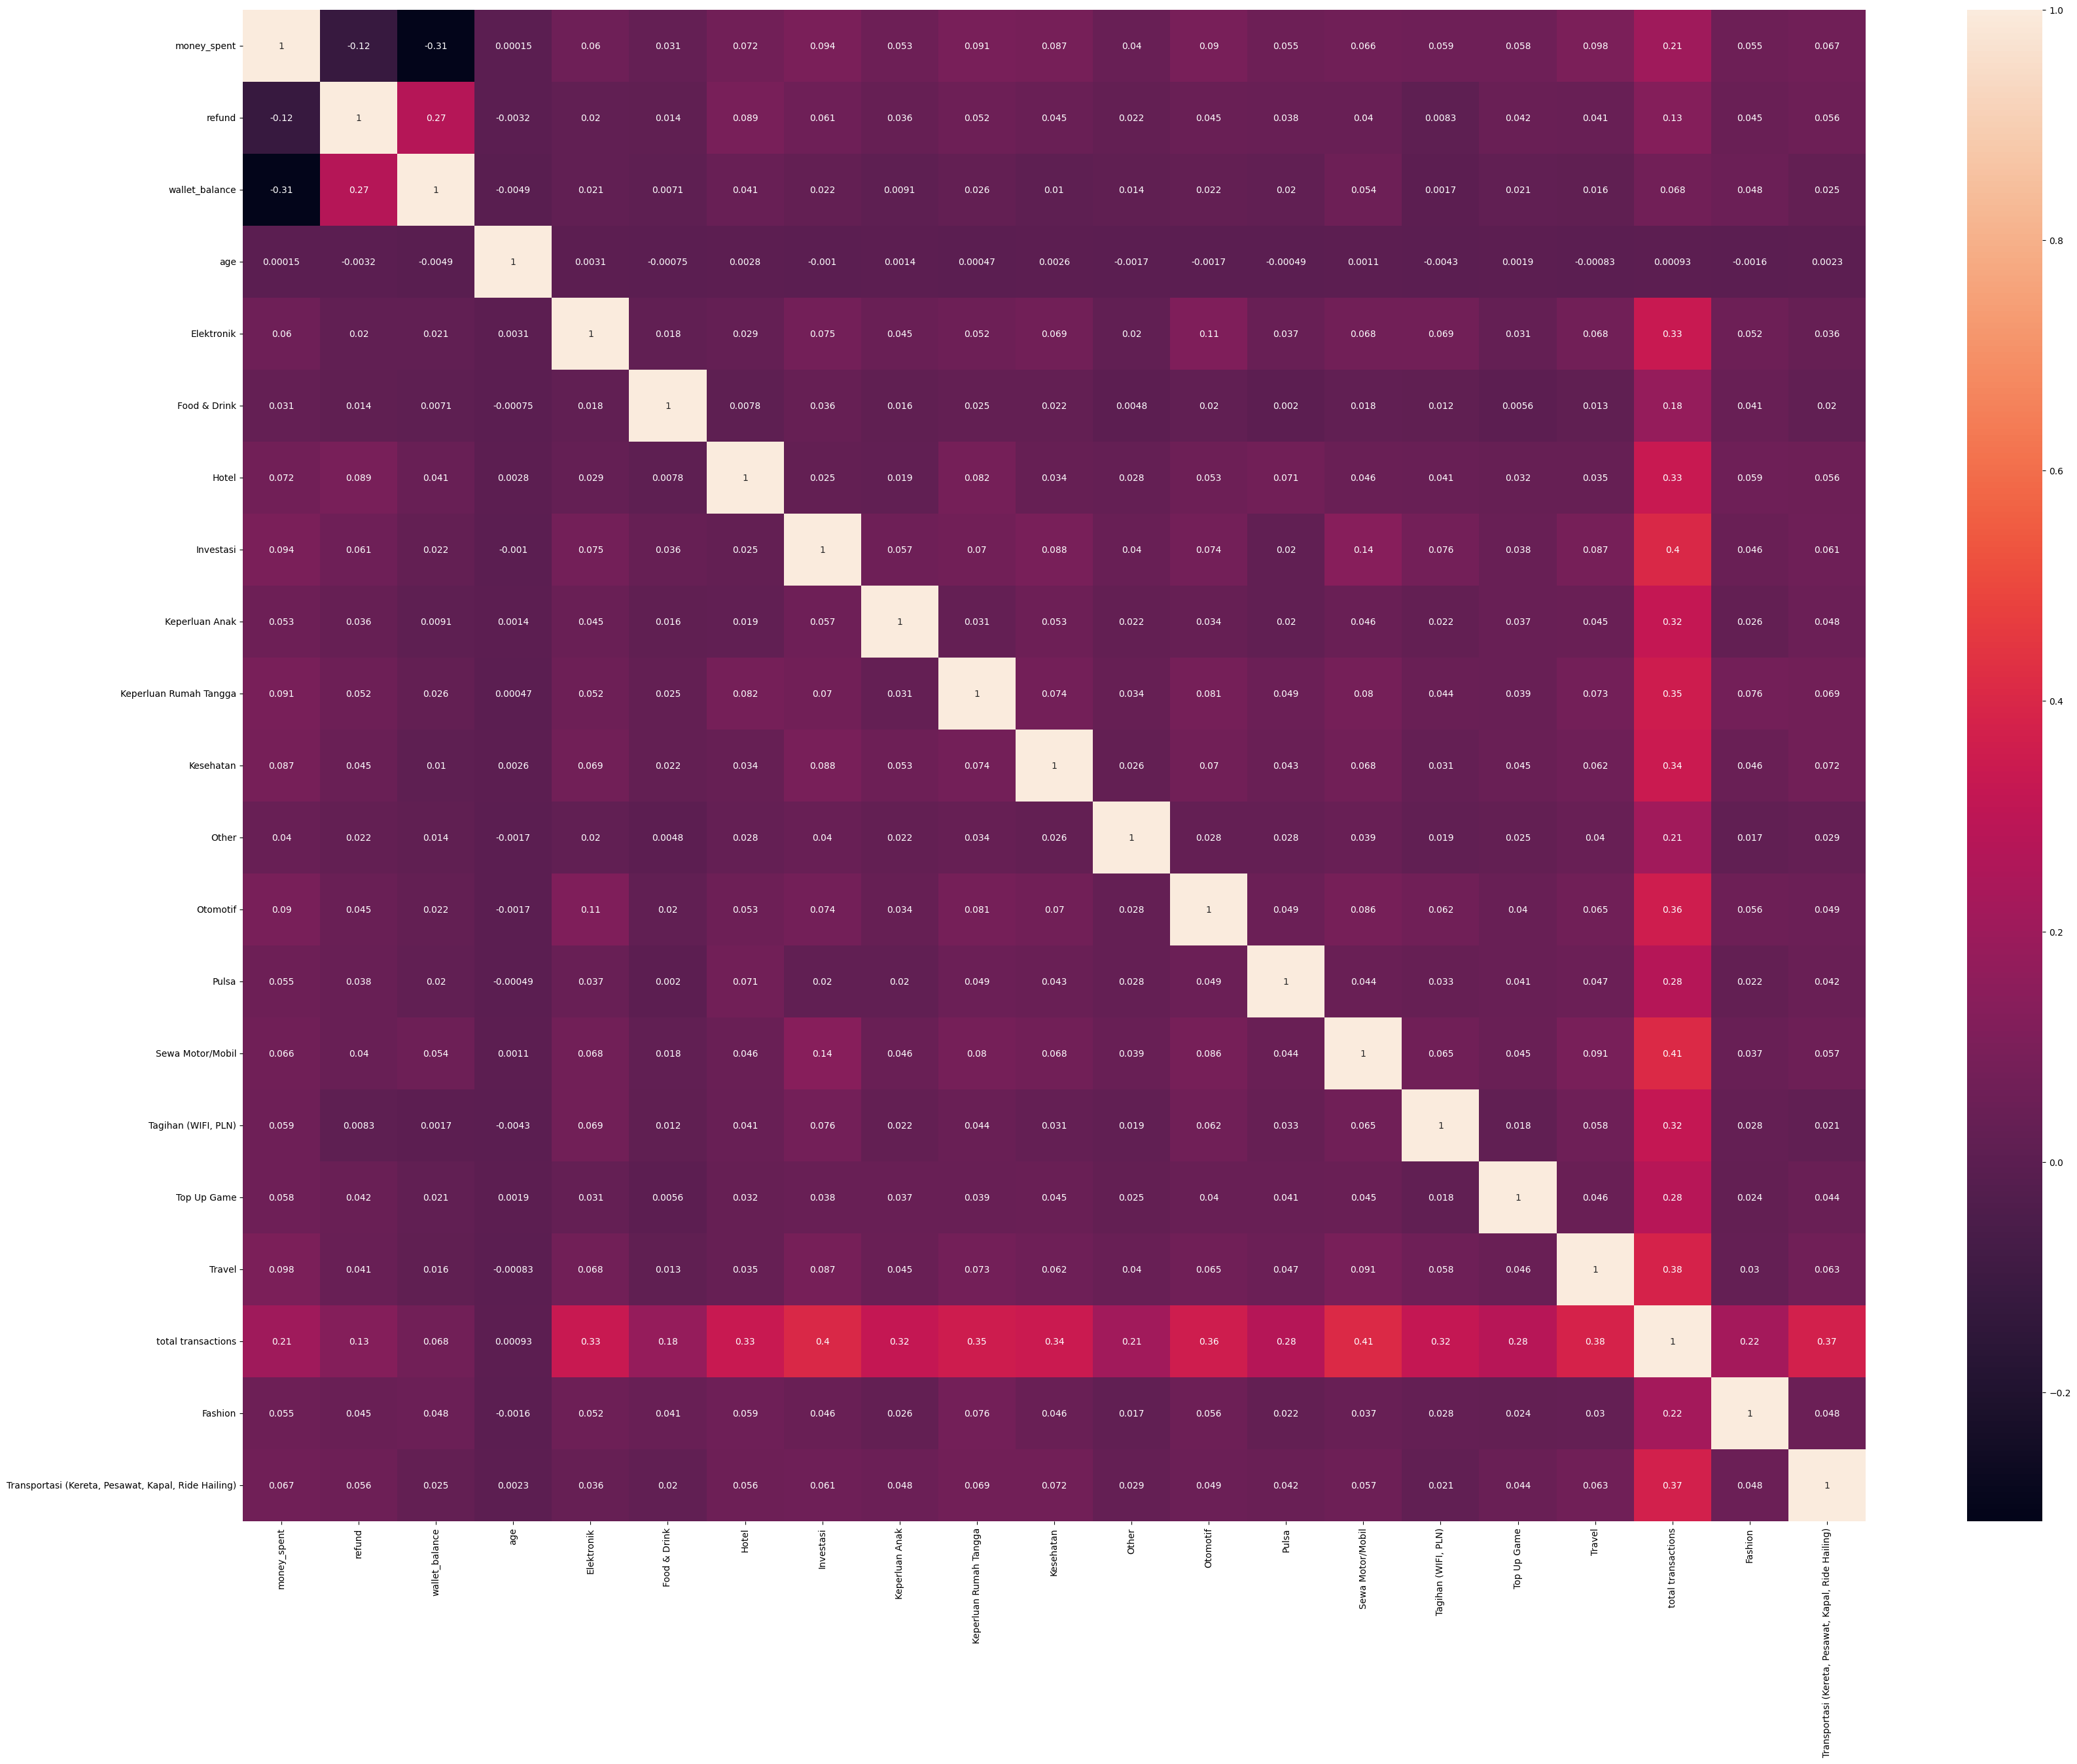

In [60]:
#@markdown
plt.figure(figsize=(40,30))
sns.heatmap(user.corr(numeric_only=True), annot=True)

**Interpretasi Heatmap**
* Korelasi antara Money Spent dan Refund menunjukkan korelasi yang cenderung positif dan sangat lemah. Berdasarkan heatmap, semakin banyak jumlah uang yang dihabiskan, maka semakin banyak pula jumlah pengembalian dana, begitu juga sebaliknya.
* Korelasi antara Money Spent dan Wallet Ballance menunjukkan korelasi yang cenderung negatif dan sangat lemah. Berdasarkan heatmap, semakin banyak jumlah uang yang dihabiskan, maka semakin sedikit saldo dompet, begitu juga sebaliknya.
* Korelasi antara Refund dan Wallet Ballance menunjukkan korelasi yang cenderung positif dan sangat lemah. Berdasarkan heatmap, semakin banyak jumlah uang pengembalian dana, maka semakin sedikit saldo dompet, begitu juga sebaliknya.

### **Kategori dengan pembelian terbanyak berdasarkan gender**

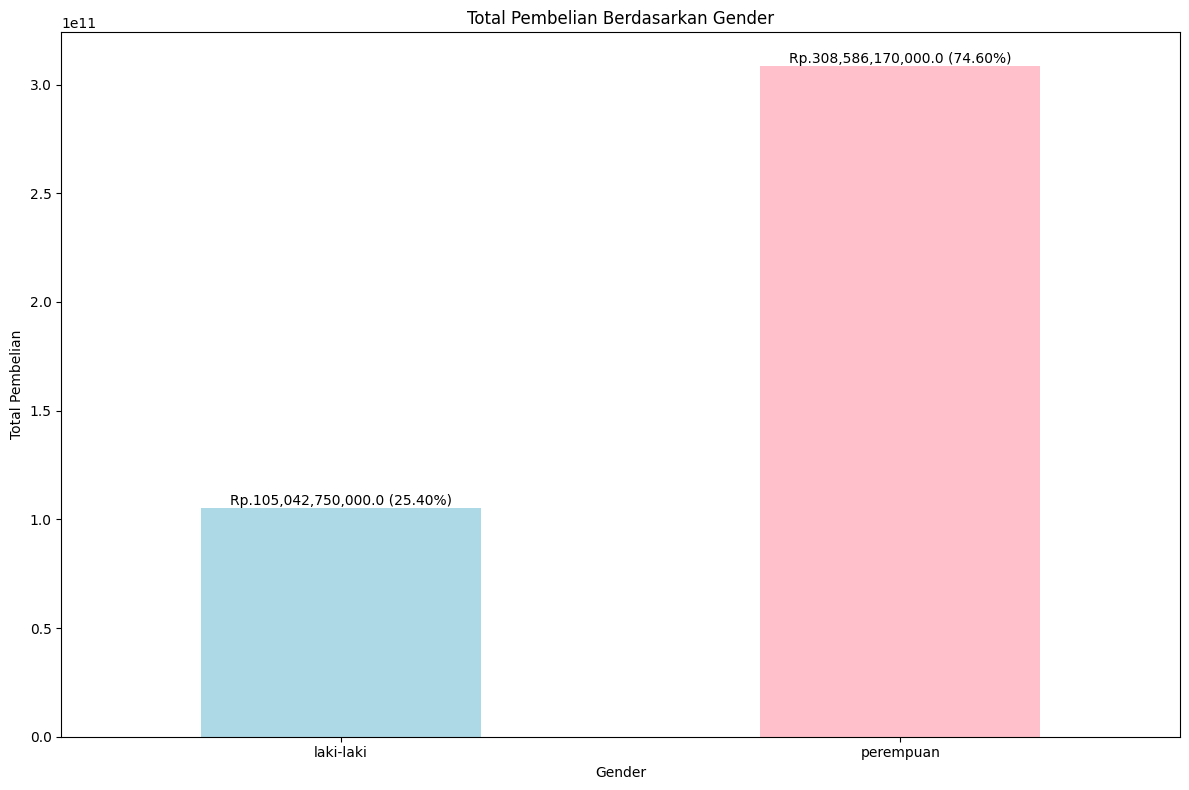

In [61]:
#@markdown
# Menghitung total pembelian berdasarkan gender
purchase_by_gender = user.groupby('gender')['money_spent'].sum()

# Plot bar chart
plt.figure(figsize=(12, 8))
purchase_by_gender.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Total Pembelian Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Total Pembelian')
plt.xticks(rotation=0)

# Menambahkan persentase di atas setiap bar
total_purchase = user['money_spent'].sum()
for index, value in enumerate(purchase_by_gender):
    percentage = (value / total_purchase) * 100
    plt.text(index, value + 30, f'Rp.{value:,} ({percentage:.2f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **Total Pengeluaran Berdasarkan Usia**

<ipython-input-62-ff01a051b11e>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age', y='money_spent', data=user, estimator=sum, ci=None)
<ipython-input-62-ff01a051b11e>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(user['age'], shade=True, color='skyblue')


<Figure size 1600x1200 with 0 Axes>

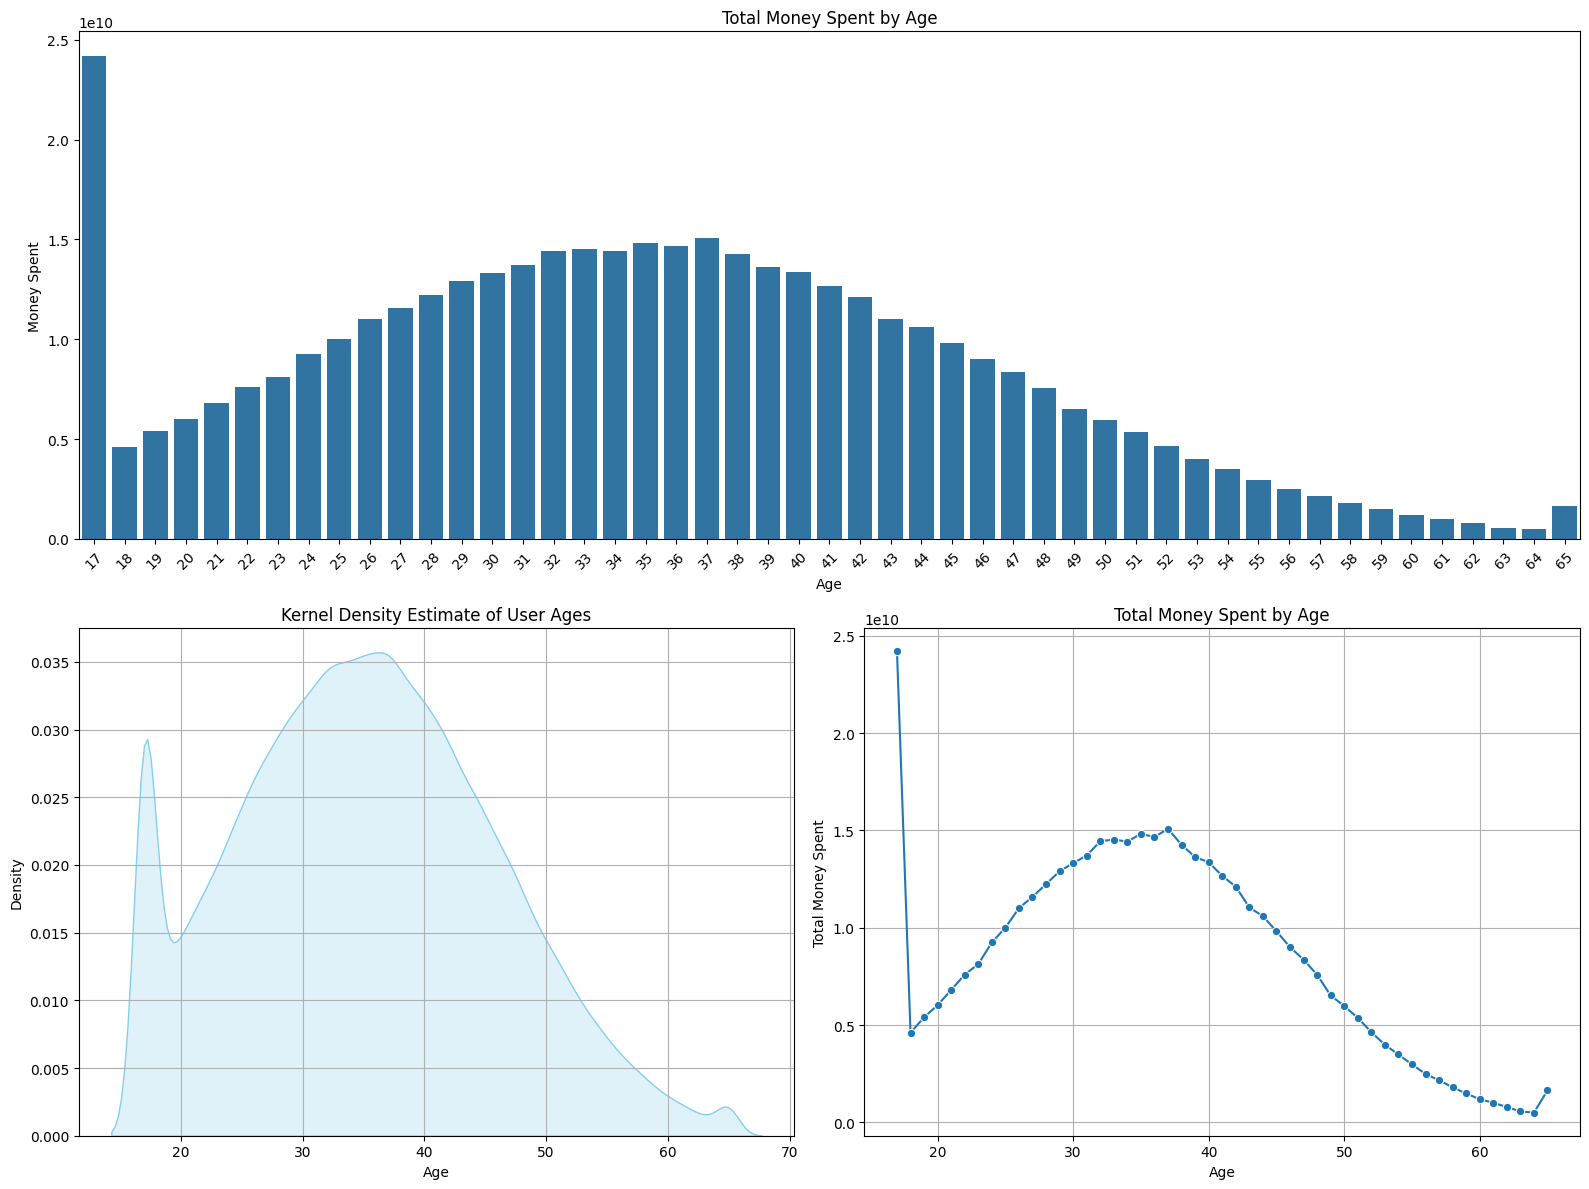

In [62]:
#@markdown
plt.figure(figsize=(16, 12))

from matplotlib.gridspec import GridSpec

# Membuat figure dan grid spec
plt.figure(figsize=(16, 12))
gs = GridSpec(2, 2, width_ratios=[1, 1])

# Subplot pertama: Bar plot (mengisi baris pertama secara penuh)
plt.subplot(gs[0, :])  # 2 baris, 2 kolom, plot pertama (baris pertama secara penuh)
sns.barplot(x='age', y='money_spent', data=user, estimator=sum, ci=None)
plt.title('Total Money Spent by Age')
plt.xlabel('Age')
plt.ylabel('Money Spent')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot kedua: KDE plot
plt.subplot(gs[1, 0])  # 2 baris, 2 kolom, plot ketiga
sns.kdeplot(user['age'], shade=True, color='skyblue')
plt.title('Kernel Density Estimate of User Ages')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()

# Menghitung total uang yang dihabiskan berdasarkan umur
total_spent_by_age = user.groupby('age')['money_spent'].sum().reset_index()

# Subplot ketiga: Line plot
plt.subplot(gs[1, 1])  # 2 baris, 2 kolom, plot keempat
sns.lineplot(x='age', y='money_spent', data=total_spent_by_age, marker='o')
plt.title('Total Money Spent by Age')
plt.xlabel('Age')
plt.ylabel('Total Money Spent')
plt.grid(True)
plt.tight_layout()

# Menampilkan plot
plt.show()

### **Plotting bar plot berdasarkan kategori usia**

<ipython-input-63-f5ad6ea0e533>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='money_spent', data=user, estimator=sum, ci=None)


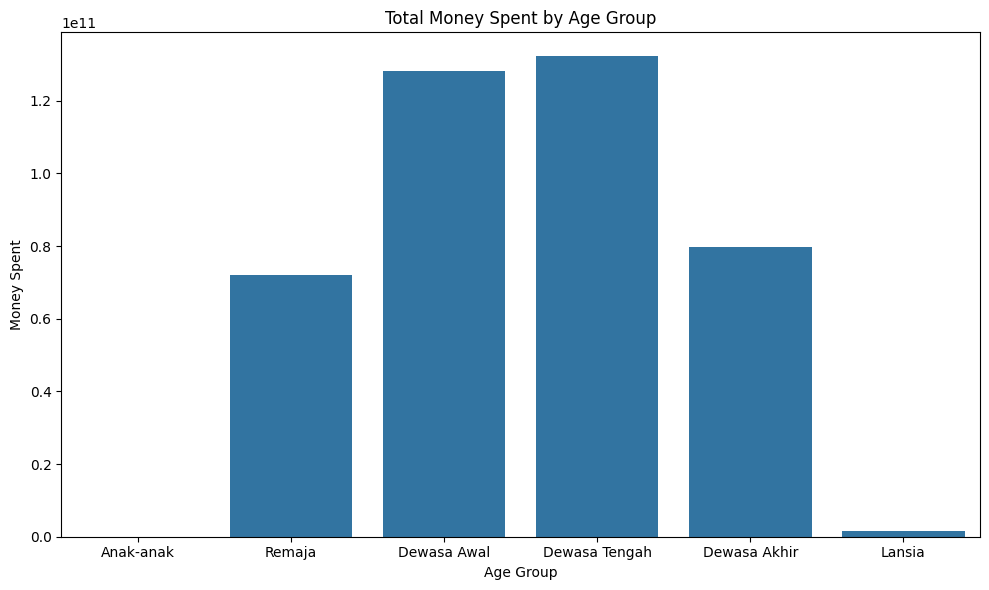

In [63]:
#@markdown
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='money_spent', data=user, estimator=sum, ci=None)
plt.title('Total Money Spent by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Money Spent')
plt.tight_layout()
plt.show()

### **Gross Amount berdasarkan Kategori Produk**

<ipython-input-64-13f75e8d7a16>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_gross_per_category.index, y=total_gross_per_category.values, palette='viridis', native_scale=False)


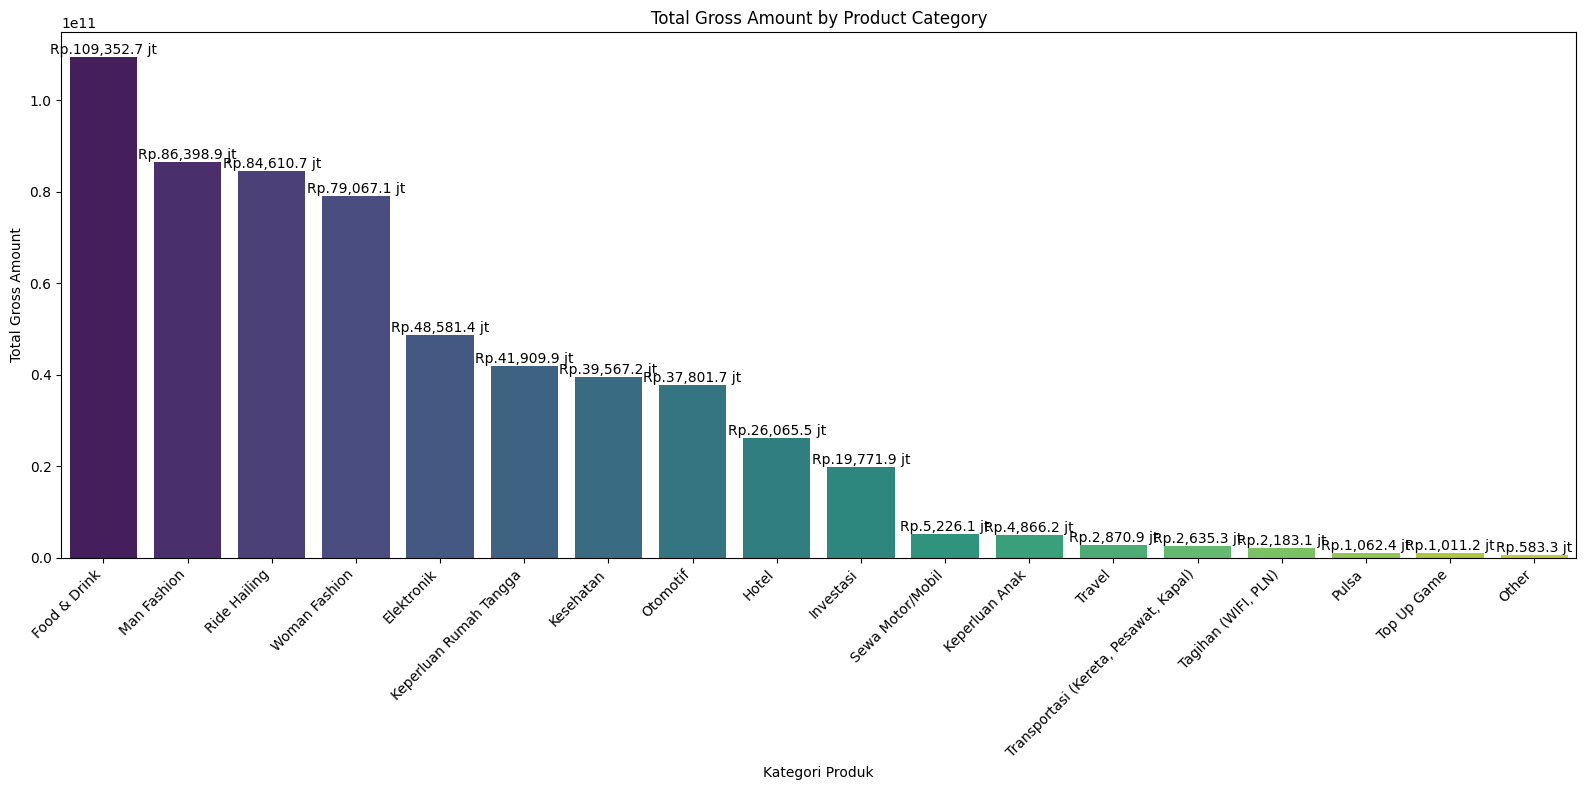

In [64]:
#@markdown
total_gross_per_category = history.groupby('product name')['gross_amount'].sum()
total_gross_per_category = total_gross_per_category.sort_values(ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(x=total_gross_per_category.index, y=total_gross_per_category.values, palette='viridis', native_scale=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Gross Amount')
plt.title('Total Gross Amount by Product Category')
for index, value in enumerate(total_gross_per_category):
    juta = value / 1000000
    if value < 1000000:
      plt.text(index, value + 30, f'Rp.{juta:,.1f} ribu', ha='center', va='bottom')
    else:
      plt.text(index, value + 30, f'Rp.{juta:,.1f} jt', ha='center', va='bottom')
plt.tight_layout()
plt.show()

### **Jumlah User berdasarkan kategori produk/jasa yang dibeli**

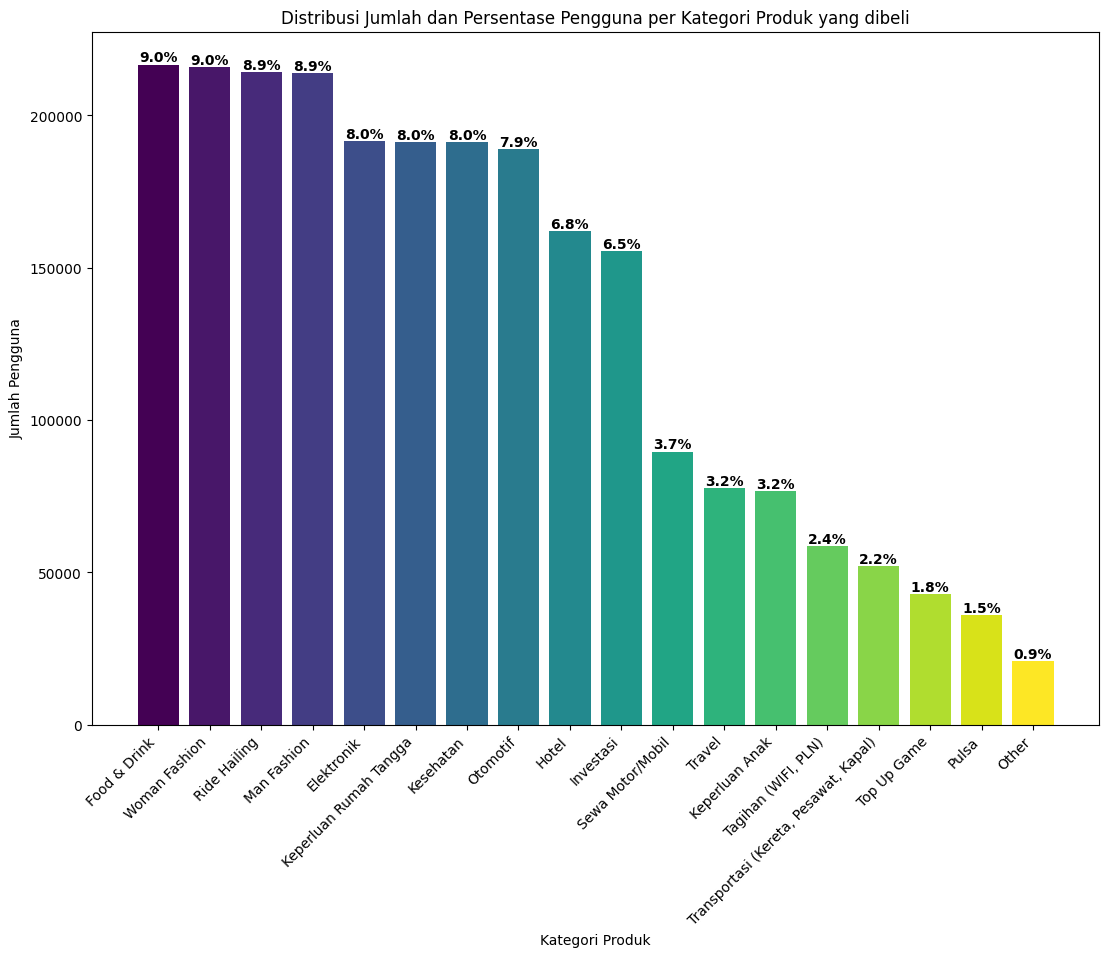

In [65]:
#@markdown
user_per_category = history.groupby('product name')['user_id'].nunique()

# Mengurutkan data berdasarkan jumlah descending
user_per_category_sorted = user_per_category.sort_values(ascending=False)

# Menghitung persentase
total_users = user_per_category_sorted.sum()
percentages = (user_per_category_sorted / total_users) * 100

# Membuat bar chart
colors = plt.cm.viridis(np.linspace(0, 1, user_per_category_sorted.size))
plt.figure(figsize=(13, 9))
bars = plt.bar(user_per_category_sorted.index, user_per_category_sorted, color=colors)

# Mengatur label
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.title('Distribusi Jumlah dan Persentase Pengguna per Kategori Produk yang dibeli')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, ha='right')

# Menampilkan grafik
plt.show()


### **Frekuensi pembelian berdasarkan Kategori Produk**

<ipython-input-66-09cc50e63392>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_per_category.index, y=frequency_per_category.values, palette='viridis', native_scale=False)


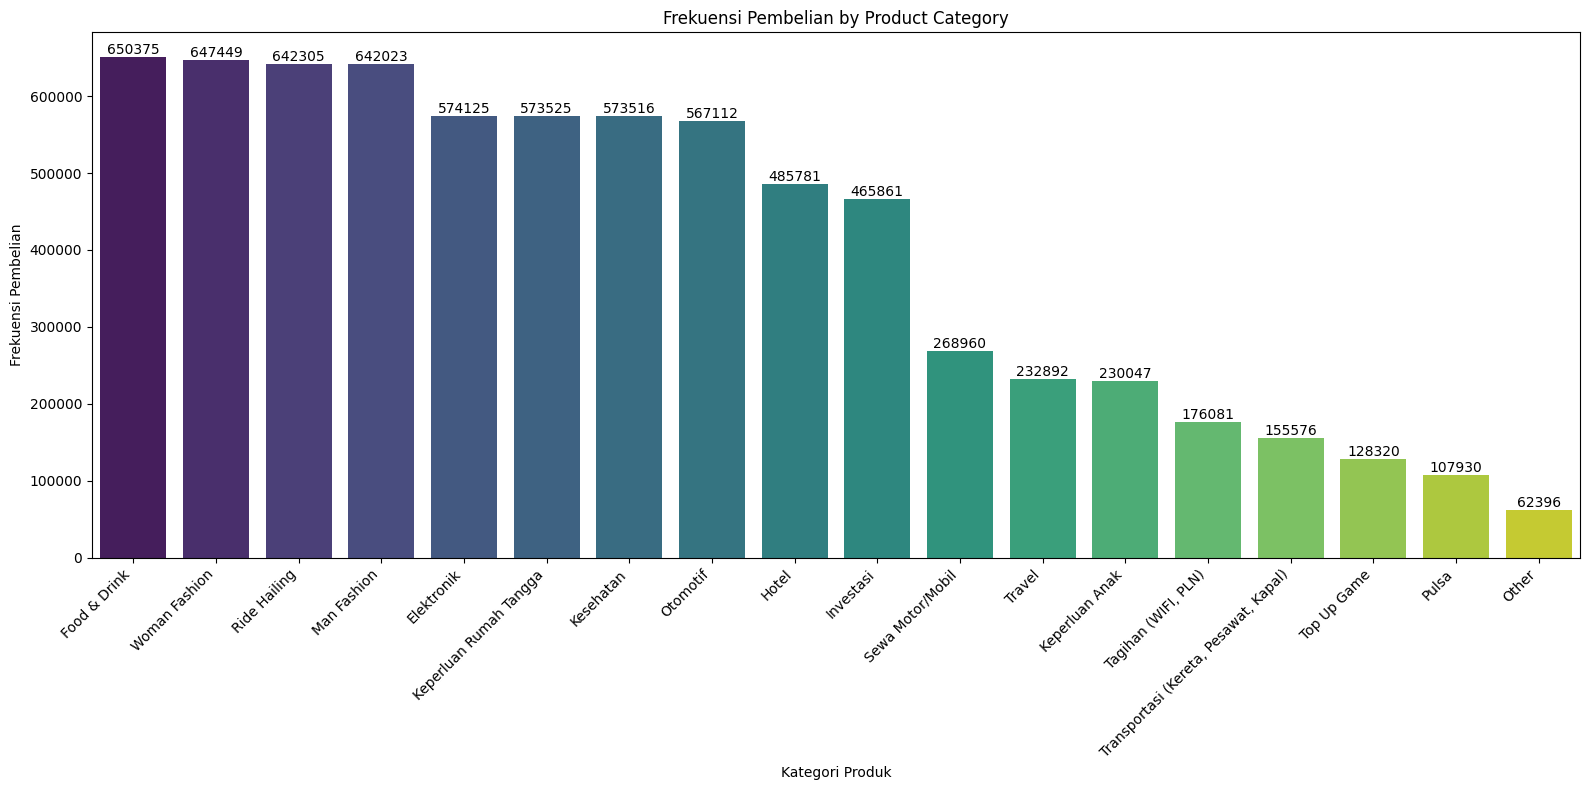

In [66]:
#@markdown
frequency_per_category = history.groupby('product name')['product_id'].count()
frequency_per_category = frequency_per_category.sort_values(ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(x=frequency_per_category.index, y=frequency_per_category.values, palette='viridis', native_scale=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Kategori Produk')
plt.ylabel('Frekuensi Pembelian')
plt.title('Frekuensi Pembelian by Product Category')
for index, value in enumerate(frequency_per_category):
  plt.text(index, value + 5, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

### **Frekuensi Pembelian per Bulan**

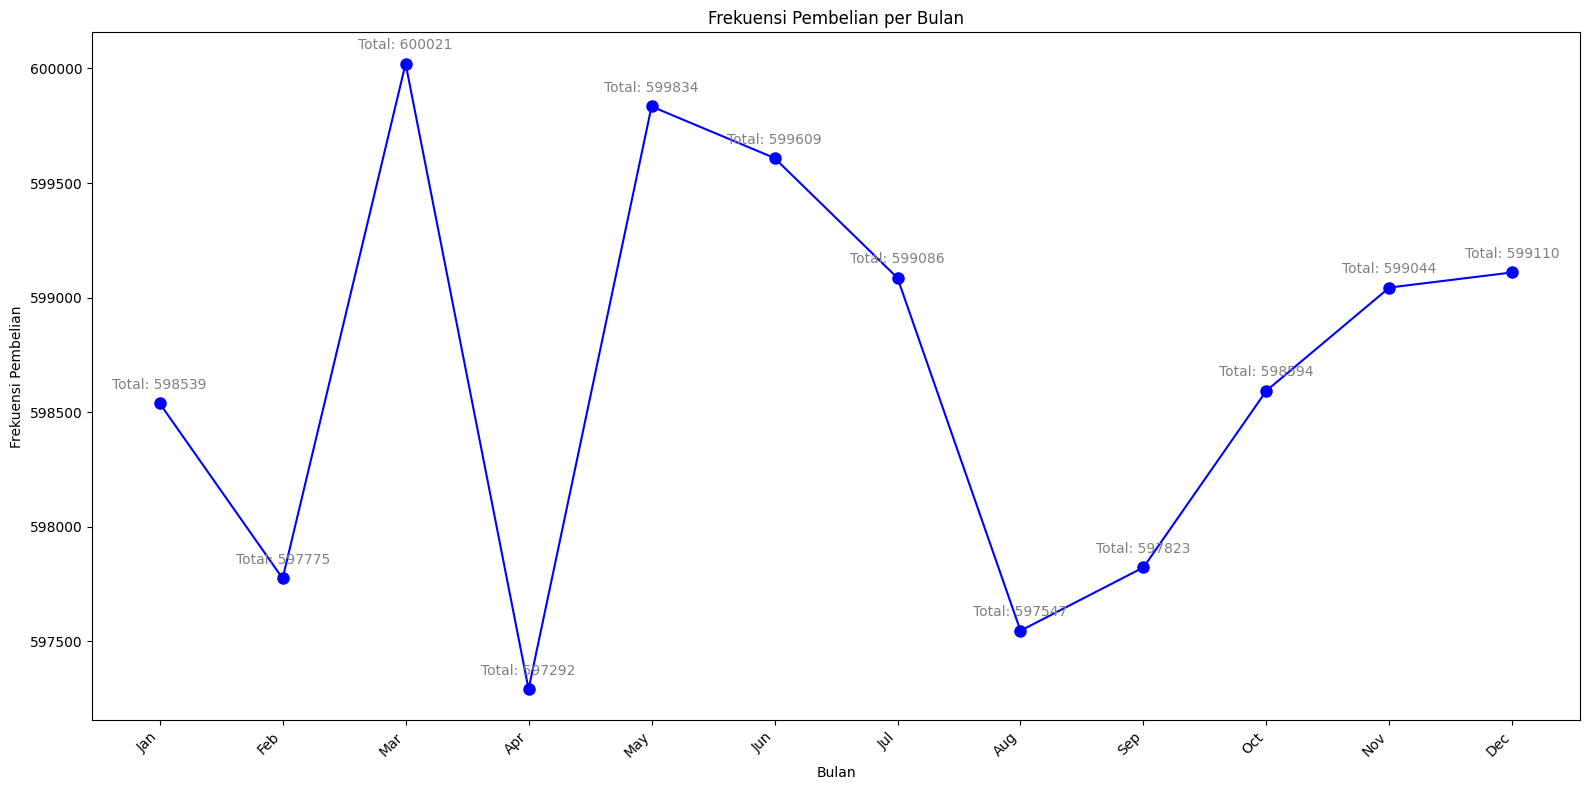

In [67]:
#@markdown
monthly = history.groupby(history['transaction_date'].dt.month)['product_id'].count()

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(16, 8))
plt.plot(monthly.index, monthly.values, marker='o', linestyle='-', color='b', markersize=8)

plt.xticks(monthly.index, month_names if month_names else monthly.index.values, rotation=45, ha='right')
plt.xlabel('Bulan')
plt.ylabel('Frekuensi Pembelian')
plt.title('Frekuensi Pembelian per Bulan')

for index, value in enumerate(monthly):
    plt.text(index+1, value + 50, f"Total: {value}", ha='center', va='bottom', fontsize=10, color='gray')

plt.tight_layout()
plt.show()

## **Transformation**

###**Feature Encoding**

In [68]:
#@markdown
from sklearn.preprocessing import LabelEncoder

categorical_columns = user[['gender', 'nama provinsi', 'nama kabupaten', 'nama kecamatan', 'age_group']]

encoder = LabelEncoder()

# Fit the encoder to the data (learn the unique categories)
encoded_user = user.copy()  # Create a copy to avoid modifying the original DataFrame

for col in categorical_columns:
  encoder.fit(user[col])
  encoded_user[col] = encoder.transform(user[col])

encoded_user

user_id                full_name  gender          money_spent  \
0       SC3402052002003        ISDANIAR KHAFIYAH       1          1,790,000.0   
1       SC3402052002005            DEBBY ORINBAO       1          1,510,000.0   
2       SC3402052002007  MUHAMMAD WENEHEN WIRATA       0          2,360,000.0   
3       SC3402052002009                  GANINDA       1          1,770,000.0   
4       SC3402052002010     HARJOKO IHSAN S.Sos.       0 1,629,999.9999999998   
...                 ...                      ...     ...                  ...   
241644  SC3504011002009  dr. MEIVA SETIYANINGSIH       1          2,040,000.0   
241645  SC3504011002011            DIAN S.I.Kom.       1          2,160,000.0   
241646  SC3504011002012               SUSILAWATI       1          1,840,000.0   
241647  SC3504011002013   Dr. MARYANI NINDA S.P.       1 1,689,999.9999999998   
241648  SC3504011002014           FITRI AGUSTIEN       1          1,970,000.0   

          refund  wallet_balance  join_date      birth  nama provinsi  \
0      200,000.0       450,000.0 2023-10-30 2003-09-20              1   
1      300,000.0       470,000.0 2023-11-03 2005-02-28              1   
2      130,000.0       430,000.0 2023-11-28 1996-07-21              1   
3       30,000.0       190,000.0 2023-11-01 1977-10-07              1   
4       80,000.0       190,000.0 2023-12-08 2006-06-18              1   
...          ...             ...        ...        ...            ...   
241644 270,000.0       620,000.0 2023-10-14 1973-06-08              5   
241645 130,000.0       440,000.0 2023-12-06 1992-08-13              5   
241646 200,000.0       460,000.0 2023-11-27 1975-08-08              5   
241647 190,000.0       580,000.0 2023-12-16 1993-04-28              5   
241648 170,000.0       660,000.0 2023-12-14 1993-05-25              5   

        nama kabupaten  ...  Other  Otomotif  Pulsa  Sewa Motor/Mobil  \
0                    5  ...    0.0       4.0    4.0               0.0   
1                    5  ...    0.0       2.0    0.0               0.0   
2                    5  ...    0.0       3.0    3.0               0.0   
3                    5  ...    0.0       4.0    0.0               0.0   
4                    5  ...    0.0       2.0    0.0               0.0   
...                ...  ...    ...       ...    ...               ...   
241644             116  ...    0.0       4.0    0.0               0.0   
241645             116  ...    3.0       2.0    0.0               3.0   
241646             116  ...    0.0       2.0    0.0               3.0   
241647             116  ...    0.0       4.0    0.0               3.0   
241648             116  ...    0.0       3.0    0.0               2.0   

        Tagihan (WIFI, PLN)  Top Up Game  Travel  total transactions  Fashion  \
0                       0.0          0.0     4.0                32.0      7.0   
1                       3.0          0.0     2.0                28.0      5.0   
2                       4.0          0.0     0.0                35.0      7.0   
3                       0.0          0.0     0.0                25.0      8.0   
4                       3.0          0.0     0.0                20.0      5.0   
...                     ...          ...     ...                 ...      ...   
241644                  4.0          4.0     0.0                40.0      6.0   
241645                  0.0          0.0     0.0                42.0      5.0   
241646                  0.0          0.0     2.0                30.0      6.0   
241647                  3.0          0.0     4.0                32.0      7.0   
241648                  0.0          0.0     3.0                29.0      5.0   

        Transportasi (Kereta, Pesawat, Kapal, Ride Hailing)  
0                                                     2.0    
1                                                     4.0    
2                                                     3.0    
3                                                     2.0    
4     

### **Feature Scaling**

In [69]:
#@markdown
from sklearn.preprocessing import StandardScaler
columns_to_scale = encoded_user.copy()
columns_to_scale.drop(columns=['user_id','full_name','join_date','birth','age_group'], inplace=True)

scaler = StandardScaler()

scaler.fit(columns_to_scale)
scaled_user = pd.DataFrame(scaler.transform(columns_to_scale),columns= columns_to_scale.columns )
scaled_user

gender          money_spent                refund  \
0       0.5780840649473785  -0.2453135055894046 0.0005659994146131013   
1       0.5780840649473785  -1.0299845634559843    0.5141242162059414   
2      -1.7298522146446418   1.3520525764961326  -0.35892475233931675   
3       0.5780840649473785  -0.3013614382941603    -0.872482969130645   
4      -1.7298522146446418  -0.6936969672274508    -0.615703860734981   
...                    ...                  ...                   ...   
220299  0.5780840649473785  0.45528565322004155   0.36005675116854297   
220300  0.5780840649473785   0.7915732494485757  -0.35892475233931675   
220301  0.5780840649473785 -0.10519367382751538 0.0005659994146131013   
220302  0.5780840649473785  -0.5255531691131837  -0.05078982226451973   
220303  0.5780840649473785  0.25911788875339664   -0.1535014656227854   

              wallet_balance       nama provinsi      nama kabupaten  \
0        -0.4749195831317267 -2.0565709381836856 -1.3900588028406085   
1         -0.421167941341672 -2.0565709381836856 -1.3900588028406085   
2        -0.5286712249217814 -2.0565709381836856 -1.3900588028406085   
3        -1.1736909264024376 -2.0565709381836856 -1.3900588028406085   
4        -1.1736909264024376 -2.0565709381836856 -1.3900588028406085   
...                      ...                 ...                 ...   
220299 -0.018030627916261893  0.9888686168726425  1.5476638553837458   
220300    -0.501795404026754  0.9888686168726425  1.5476638553837458   
220301  -0.44804376223669934  0.9888686168726425  1.5476638553837458   
220302  -0.12553391149637125  0.9888686168726425  1.5476638553837458   
220303   0.08947265566384748  0.9888686168726425  1.5476638553837458   

            nama kecamatan                  age          Elektronik  \
0      -1.6298540374149733  -1.3376349047359466 0.31143754115571215   
1      -1.6298540374149733   -1.526160488853607  1.1019407564328971   
2      -1.6298540374149733  -0.6777953603241356 0.31143754115571215   
3      -1.6298540374149733    1.113197688793637  1.1019407564328971   
4      -1.6298540374149733   -1.620423280912437 -0.4790656741214727   
...                    ...                  ...                 ...   
220299   1.563096030493324   1.4902488570289576 0.31143754115571215   
220300   1.563096030493324 -0.30074419208881503 0.31143754115571215   
220301   1.563096030493324   1.3017232729112973 -0.4790656741214727   
220302   1.563096030493324  -0.3950069841476451 0.31143754115571215   
220303   1.563096030493324  -0.3950069841476451 -0.4790656741214727   

              Food & Drink  ...               Other             Otomotif  \
0      0.05342816969073978  ... -0.3103075100060675   1.1035478759544743   
1        1.169850392544647  ... -0.3103075100060675 -0.44441946837887714   
2        1.169850392544647  ... -0.3103075100060675  0.32956420378779855   
3        1.169850392544647  ... -0.3103075100060675   1.1035478759544743   
4        1.169850392544647  ... -0.3103075100060675 -0.44441946837887714   
...                    ...  ...                 ...                  ...   
220299   1.169850392544647  ... -0.3103075100060675   1.1035478759544743   
220300   1.169850392544647  ...  2.9765371122955235 -0.44441946837887714   
220301 0.05342816969073978  ... -0.3103075100060675 -0.44441946837887714   
220302 0.05342816969073978  ... -0.3103075100060675   1.1035478759544743   
220303 -1.0629940531631674  ... -0.3103075100060675  0.32956420378779855   

                     Pulsa    Sewa Motor/Mobil  Tagihan (WIFI, PLN)  \
0       3.0339247689214304 -0.7808138061670914  -0.5740024854185362   
1      -0.4234456405118819 -0.7808138061670914   1.5805141272549545   
2        2.169582166563102 -0.7808138061670914   2.2986863314794515   
3      -0.4234456405118819 -0.7808138061670914  -0.5740024854185362   
4      -0.4234456405118819 -0.7808138061670914   1.5805141272549545   
...                    ...                 ...                  ...   
220299 -0.42344

### **Dimensionality Reduction**

In [70]:
#@markdown
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca.fit(scaled_user)

PCA(n_components=3)

#### **Transform to 3D**

In [71]:
#@markdown
pca_df = pd.DataFrame(pca.transform(scaled_user), columns=['kolom1', 'kolom2', 'kolom3'])

#### **Tampilkan deskripsi hasil transformasi PCA**

In [72]:
#@markdown
desc_pca = (pca_df.describe().T)
desc_pca

count                    mean                std  \
kolom1 220,304.0 -1.2385086540956064e-17 1.6917479612302182   
kolom2 220,304.0   4.128362180318688e-18 1.2220695357318658   
kolom3 220,304.0   7.431051924573639e-17 1.0950337068236409   

                      min                 25%                   50%  \
kolom1 -7.994904136036156 -1.0597602108503295   0.07247336872669552   
kolom2 -49.52663024800621 -0.6299858160748082 -0.019499526127395472   
kolom3   -9.0375804807374 -0.7498151365294741  0.031615675316215355   

                      75%                max  
kolom1 1.1487421866068872 12.759780898217747  
kolom2  0.587613683691776 62.018330423881395  
kolom3 0.7888140674600252 10.738804984644641

#### **3D Plot**

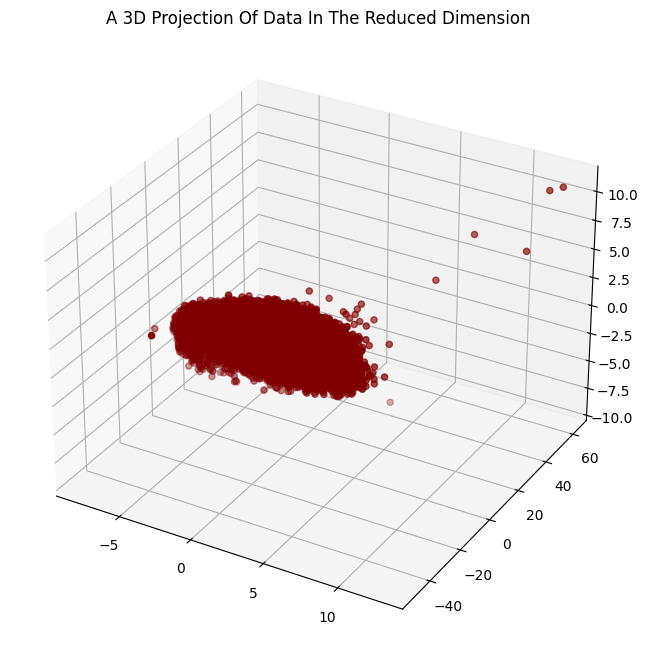

In [73]:
#@markdown
x =pca_df['kolom1']
y =pca_df['kolom2']
z =pca_df['kolom3']

# To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# **Modeling**

In [74]:
#@markdown
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, estimate_bandwidth

## **K-Means Clustering**

###**Elbow Method**

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

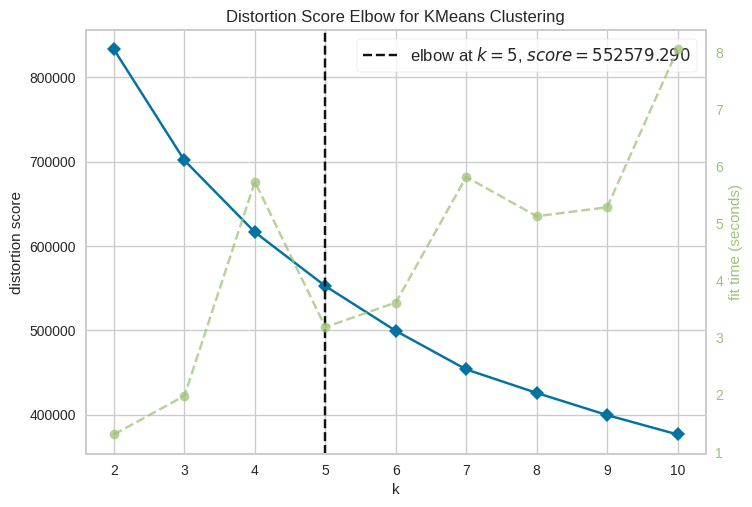

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
#@markdown
from yellowbrick.cluster import KElbowVisualizer

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(pca_df.copy())
Elbow_M.show()

###**Penambahkan Label Klaster**

In [76]:
#@markdown
#Terapkan KMeans clustering
pca_df_1 = pca_df.copy()
num_clusters = 5  # Tentukan jumlah kluster
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(pca_df_1)

# Tambahkan label kluster ke DataFrame hasil PCA
pca_df_1['Cluster'] = kmeans.labels_

user_1 = user.copy()
user_1['cluster'] = kmeans.labels_

# Tampilkan beberapa baris pertama dari DataFrame dengan label kluster
pca_df_1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


kolom1               kolom2              kolom3  Cluster
0        0.9507040766911691   -1.003101839461178 -2.7729043219903575        4
1      -0.12215415437827759 -0.04470477070086496  -3.140892460550699        4
2        1.7493521090416884  -1.8353691024165792  -2.547645577665736        4
3       -0.8210739039795376  -1.5224422852015502 -1.8048070262620448        4
4        -2.049841138459571   -1.476374190087081 -2.7788855541500967        4
...                     ...                  ...                 ...      ...
220299   2.0589569248768225  0.41642679064624183    2.53544884784219        2
220300    2.281498665896215  -0.1828183421236384   3.012364732907279        2
220301  -0.3199788822638453  0.20441275574480333    2.31425602585855        2
220302   0.3806135131214746  0.13327447169560408  1.0746516889936544        2
220303 -0.45719564104443955  0.17275728782744554  1.5170904587824225        2

[220304 rows x 4 columns]

### **Pusat Klaster**

In [77]:
#@markdown
print("Cluster Centers:")
kmeans.cluster_centers_

Cluster Centers:


array([[-0.34017637,  1.61474669, -0.20359413],
       [ 2.14867092, -0.05175905, -0.18555746],
       [ 0.07322264, -0.06959694,  1.06726729],
       [-2.42782555, -0.18542556, -0.06941139],
       [ 0.11528494, -0.62126874, -0.9789394 ]])

### **Distribusi Klaster**

In [78]:
#@markdown
print("Cluster Distribution:")
pca_df_1['Cluster'].value_counts()

Cluster Distribution:


Cluster
2    58369
1    47092
4    46253
3    41865
0    26725
Name: count, dtype: int64

### **3D Visualization**

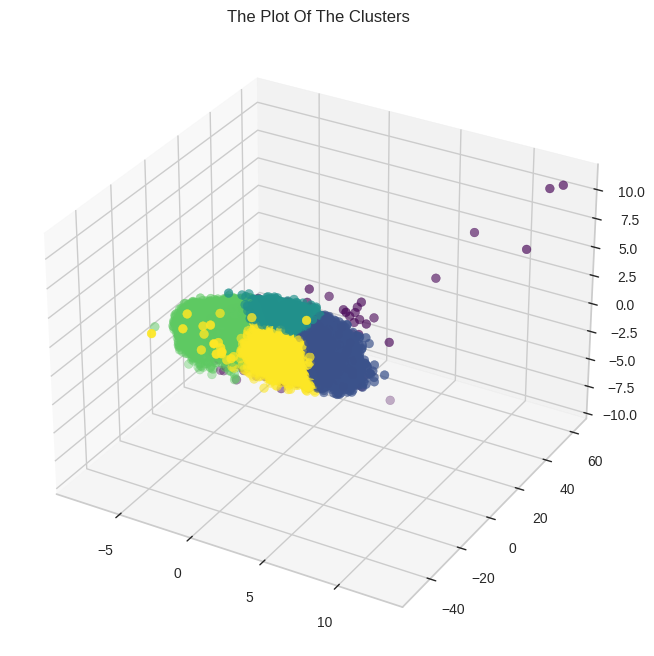

In [79]:
#@markdown
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_df_1["Cluster"], marker='o', cmap = 'viridis')
ax.set_title("The Plot Of The Clusters")
plt.show()

###**2D Visualization**

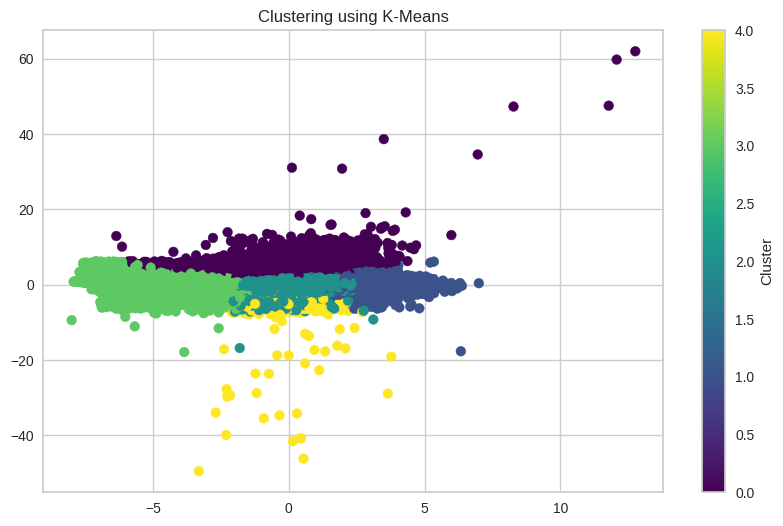

In [80]:
#@markdown
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=user_1['cluster'], cmap='viridis')
plt.title('Clustering using K-Means')
plt.colorbar(label='Cluster')
plt.show()

## **DBSCAN Clustering**

###**Penambahkan Label Klaster**

In [81]:
#@markdown
# Terapkan DBSCAN clustering
pca_df_DB = pca_df.copy()
m_DB = DBSCAN()

# Tambahkan label kluster ke DataFrame hasil PCA
pca_df_DB['Cluster'] = m_DB.fit_predict(pca_df_DB)

# Tampilkan beberapa baris pertama dari DataFrame dengan label kluster
pca_df_DB

kolom1               kolom2              kolom3  Cluster
0        0.9507040766911691   -1.003101839461178 -2.7729043219903575        0
1      -0.12215415437827759 -0.04470477070086496  -3.140892460550699        0
2        1.7493521090416884  -1.8353691024165792  -2.547645577665736        0
3       -0.8210739039795376  -1.5224422852015502 -1.8048070262620448        0
4        -2.049841138459571   -1.476374190087081 -2.7788855541500967        0
...                     ...                  ...                 ...      ...
220299   2.0589569248768225  0.41642679064624183    2.53544884784219        0
220300    2.281498665896215  -0.1828183421236384   3.012364732907279        0
220301  -0.3199788822638453  0.20441275574480333    2.31425602585855        0
220302   0.3806135131214746  0.13327447169560408  1.0746516889936544        0
220303 -0.45719564104443955  0.17275728782744554  1.5170904587824225        0

[220304 rows x 4 columns]

### **Distribusi Klaster**

In [82]:
#@markdown
print("Cluster Distribution:")
pca_df_DB['Cluster'].value_counts()

Cluster Distribution:


Cluster
 0     219079
-1       1055
 14        19
 15        19
 1         14
 18        13
 16        10
 5          8
 7          7
 20         7
 17         6
 10         6
 4          6
 9          6
 8          5
 19         5
 12         5
 21         5
 3          5
 2          5
 11         4
 6          4
 23         4
 22         4
 13         3
Name: count, dtype: int64

### **3D Visualization**

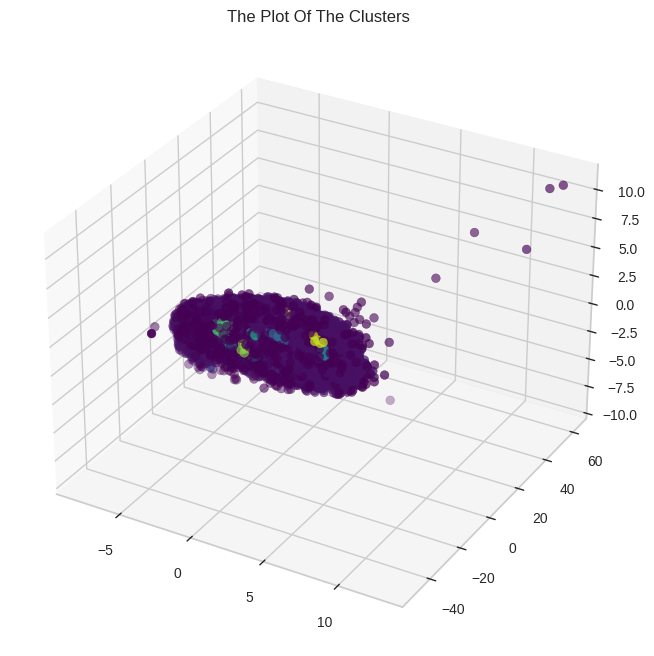

In [83]:
#@markdown
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_df_DB["Cluster"], marker='o', cmap = 'viridis')
ax.set_title("The Plot Of The Clusters")
plt.show()

###**2D Visualization**

In [84]:
# @markdown
# X_db = pca_df_DB[['kolom1', 'kolom2']]

# # Terapkan DBSCAN
# m_DB = DBSCAN()

# # Tambahkan label cluster ke dalam data
# user_DB = user.copy()
# user_DB['cluster'] = m_DB.fit_predict(X_db)

# # Visualisasikan hasil clustering
# plt.figure(figsize=(10, 6))
# plt.scatter(x, y, c=user_DB['cluster'], cmap='viridis')
# plt.title('Clustering using DBSCAN')
# plt.colorbar(label='Cluster')
# plt.show()

## **Mean Shift**

###**Penambahkan Label Klaster**

In [85]:
#@markdown
# Terapkan Mean Shift clustering
pca_df_ms = pca_df.copy()

bandwidth = estimate_bandwidth(pca_df_ms, quantile=0.2, n_samples=1000)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(pca_df_ms)

# Tambahkan label kluster ke DataFrame hasil PCA
pca_df_ms['Cluster'] = ms.labels_

# Tampilkan beberapa baris pertama dari DataFrame dengan label kluster
pca_df_ms

kolom1               kolom2              kolom3  Cluster
0        0.9507040766911691   -1.003101839461178 -2.7729043219903575        0
1      -0.12215415437827759 -0.04470477070086496  -3.140892460550699        0
2        1.7493521090416884  -1.8353691024165792  -2.547645577665736        0
3       -0.8210739039795376  -1.5224422852015502 -1.8048070262620448        0
4        -2.049841138459571   -1.476374190087081 -2.7788855541500967        0
...                     ...                  ...                 ...      ...
220299   2.0589569248768225  0.41642679064624183    2.53544884784219        0
220300    2.281498665896215  -0.1828183421236384   3.012364732907279        0
220301  -0.3199788822638453  0.20441275574480333    2.31425602585855        0
220302   0.3806135131214746  0.13327447169560408  1.0746516889936544        0
220303 -0.45719564104443955  0.17275728782744554  1.5170904587824225        0

[220304 rows x 4 columns]

### **Pusat Klaster**

In [86]:
#@markdown
print("Cluster Centers:")
ms.cluster_centers_

Cluster Centers:


array([[ 8.86472810e-02,  2.94702779e-02,  1.46951435e-01],
       [-8.68943477e-01,  5.45797779e+00, -1.75082985e+00],
       [-6.49280237e+00,  5.12747798e+00, -3.17710196e+00],
       [ 1.45560414e+00,  9.87029990e+00, -2.32346991e+00],
       [ 3.41592778e+00,  1.47722593e+01,  1.70558608e+00],
       [-1.71620535e+00,  1.22543511e+01, -2.42093452e+00],
       [ 1.54014875e+00, -1.70067867e+01,  1.03804201e+00],
       [-1.97501668e+00, -2.88869006e+01,  2.66903149e+00],
       [ 3.93437920e+00,  1.05956939e+01,  1.01980974e+00],
       [ 9.35324652e-01,  1.72713374e+01, -1.89168142e+00],
       [ 3.40985536e-01, -4.10325066e+01,  3.68634405e+00],
       [ 2.72987566e-01, -1.27875793e+01, -3.37075043e-01],
       [-2.77025370e-01, -2.33056083e+01,  5.39140959e-01],
       [ 8.61840562e-01, -2.17749923e+01,  2.70520133e-01],
       [-1.90979196e-02, -3.44179384e+01,  2.75924608e+00],
       [-1.80579732e+00, -3.47064345e+01,  5.02550860e+00],
       [-2.09516912e+00, -1.69634559e+01

### **Distribusi Klaster**

In [87]:
#@markdown
print("Cluster Distribution:")
pca_df_ms['Cluster'].value_counts()

Cluster Distribution:


Cluster
0     216781
1       1769
2        879
26       187
3        163
30       146
45       130
39        75
32        35
5         25
42        24
8         15
17        13
4          9
11         7
6          4
7          4
9          3
10         3
15         2
16         2
13         2
12         2
14         2
28         1
35         1
19         1
36         1
43         1
41         1
22         1
44         1
37         1
40         1
21         1
27         1
20         1
33         1
31         1
23         1
24         1
25         1
18         1
29         1
34         1
38         1
Name: count, dtype: int64

### **3D Visualization**

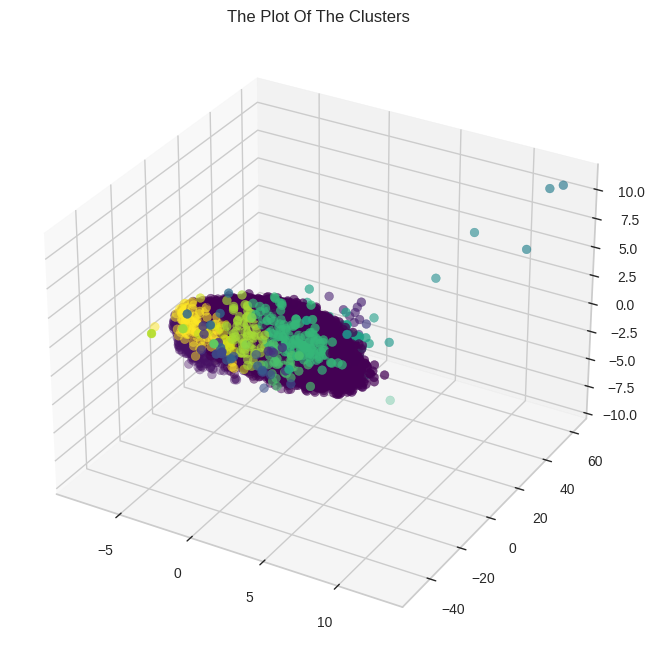

In [88]:
#@markdown
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_df_ms["Cluster"], marker='o', cmap = 'viridis')
ax.set_title("The Plot Of The Clusters")
plt.show()

###**2D Visualization**

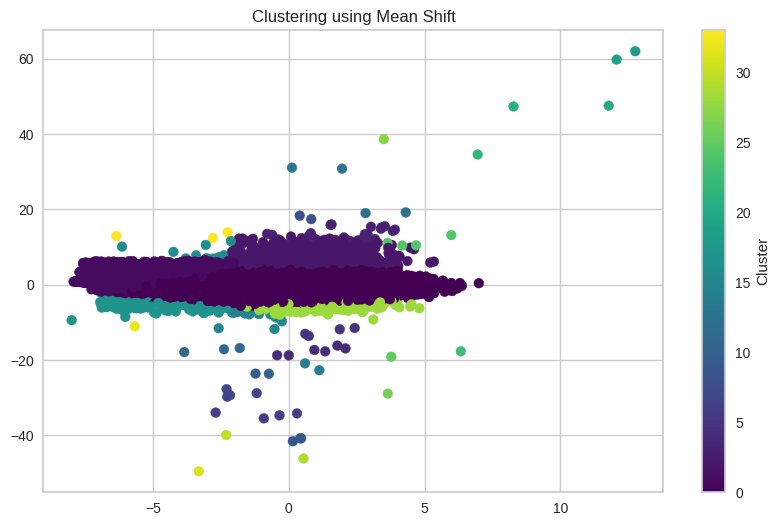

In [89]:
#@markdown
X_ms = pca_df_ms[['kolom1', 'kolom2']]
# Terapkan Mean Shift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_ms)

# Tambahkan label cluster ke dalam data
user_ap = user.copy()
user_ap['cluster'] = ms.labels_

# Visualisasikan hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=user_ap['cluster'], cmap='viridis')
plt.title('Clustering using Mean Shift')
plt.colorbar(label='Cluster')
plt.show()

#**Profiling**

##**Cluster Distribution**

<ipython-input-90-003942c1587d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


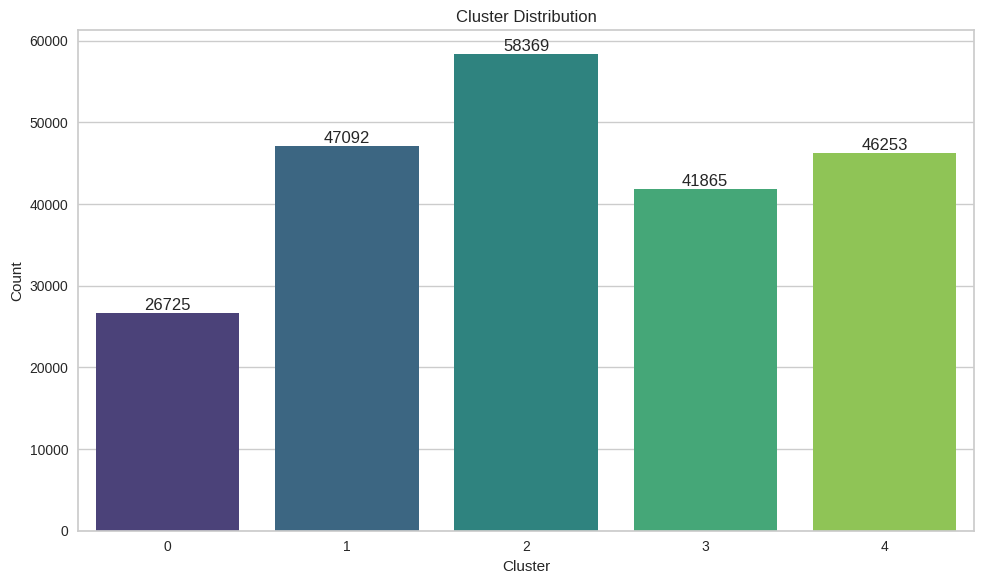

In [90]:
#@markdown
cluster_counts = user_1.groupby('cluster')['user_id'].count()

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')

for index, value in enumerate(cluster_counts):
    plt.text(index, value +1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## **Cluster Profiling by Total Transaction**

<ipython-input-91-47eb6043661c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_transactions_per_cluster.index, y=total_transactions_per_cluster.values, palette='viridis')


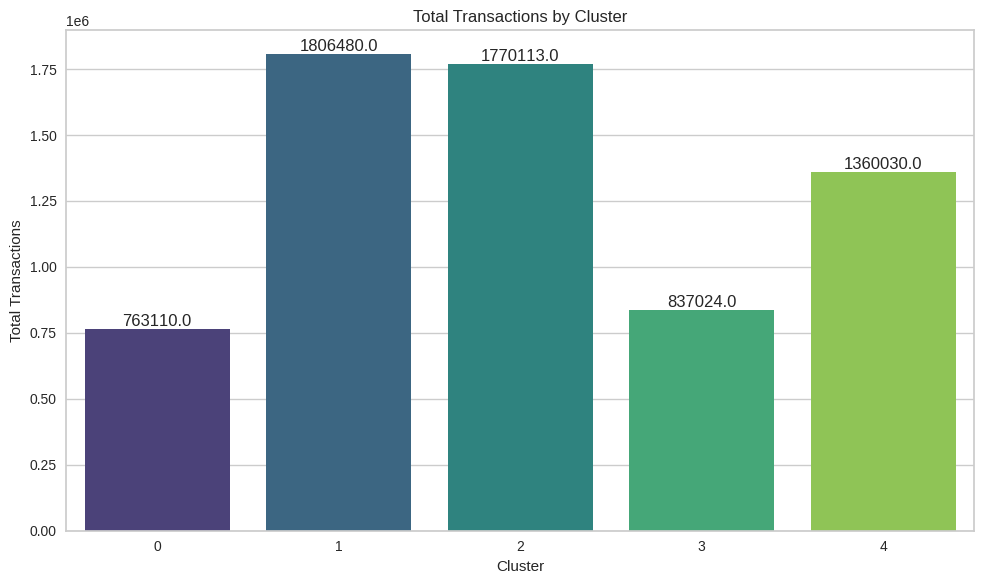

In [91]:
#@markdown
total_transactions_per_cluster = user_1.groupby('cluster')['total transactions'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=total_transactions_per_cluster.index, y=total_transactions_per_cluster.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Total Transactions')
plt.title('Total Transactions by Cluster')

for index, value in enumerate(total_transactions_per_cluster):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

###**Money Spent Statistics by Cluster**

<Figure size 1000x600 with 0 Axes>

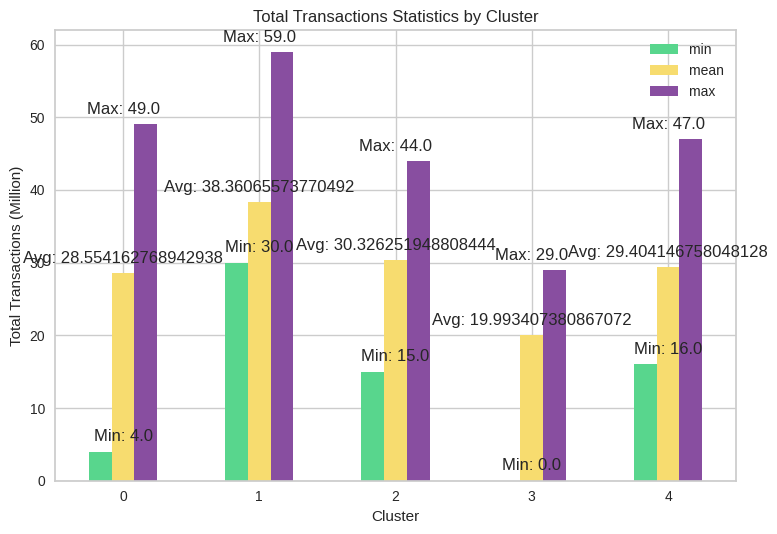

In [92]:
#@markdown
def millions_format(value):
    return value

# Calculate statistics for each cluster (assuming you still need them)
total_transactions_per_cluster = user_1.groupby('cluster')['total transactions'].agg(['min', 'mean', 'max'])

# Create a color palette for the bars
colors = ['#58D68D', '#F7DC6F', '#884EA0']

plt.figure(figsize=(10, 6))
total_transactions_per_cluster.plot(kind='bar', stacked=False, color=colors)
plt.xlabel('Cluster')
plt.ylabel('Total Transactions (Million)')  # Update label for millions
plt.title('Total Transactions Statistics by Cluster')

# Loop through index and access corresponding values
for index, row in total_transactions_per_cluster.iterrows():
    min_label = row['min']
    mean_label = row['mean']
    max_label = row['max']
    # Add labels for other statistics as needed (e.g., mean, min)
    plt.text(index, row['min'] + 1, f"Min: {min_label}", ha='center', va='bottom')
    plt.text(index, row['mean'] + 1, f"Avg: {mean_label}", ha='center', va='bottom')
    plt.text(index, row['max'] + 1, f"Max: {max_label}", ha='center', va='bottom')

plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## **Cluster Profiling by Money Spent**

###**Money Spent by Cluster**

<ipython-input-93-f41da22529e5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ms_per_cluster.index, y=ms_per_cluster.values, palette='viridis')


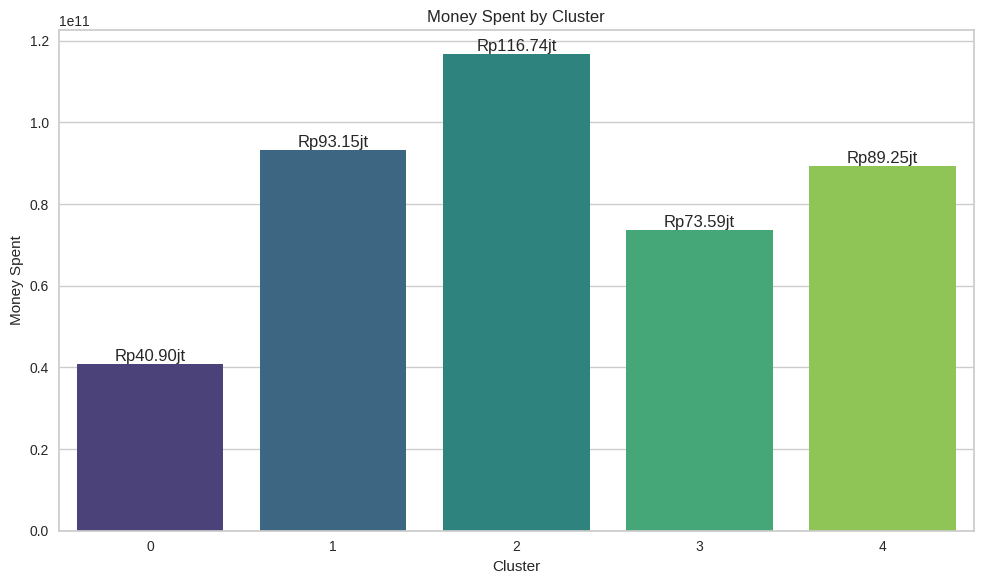

In [93]:
#@markdown
ms_per_cluster = user_1.groupby('cluster')['money_spent'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=ms_per_cluster.index, y=ms_per_cluster.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Money Spent')
plt.title('Money Spent by Cluster')

for index, value in enumerate(ms_per_cluster):
    plt.text(index, value + 1, str("Rp{:,.2f}jt".format(value / 1000000000)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

###**Money Spent Statistics by Cluster**

<Figure size 1000x600 with 0 Axes>

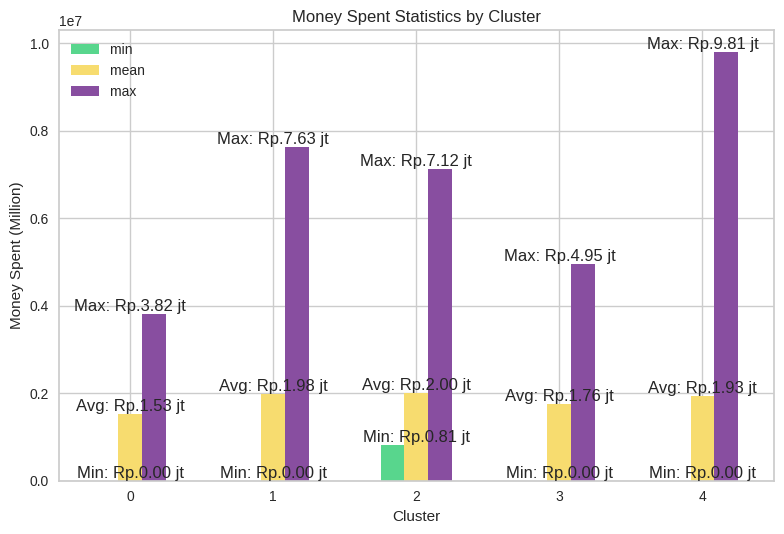

In [94]:
#@markdown
def millions_format(value):
    return "Rp.{:,.2f} jt".format(value / 1000000)

# Calculate statistics for each cluster (assuming you still need them)
money_spent_per_cluster = user_1.groupby('cluster')['money_spent'].agg(['min', 'mean', 'max'])

# Create a color palette for the bars
colors = ['#58D68D', '#F7DC6F', '#884EA0']

plt.figure(figsize=(10, 6))
money_spent_per_cluster.plot(kind='bar', stacked=False, color=colors)
plt.xlabel('Cluster')
plt.ylabel('Money Spent (Million)')  # Update label for millions
plt.title('Money Spent Statistics by Cluster')

# Loop through index and access corresponding values
for index, row in money_spent_per_cluster.iterrows():
    min_label = millions_format(row['min'])
    mean_label = millions_format(row['mean'])
    max_label = millions_format(row['max'])
    # Add labels for other statistics as needed (e.g., mean, min)
    plt.text(index, row['min'] + 1, f"Min: {min_label}", ha='center', va='bottom')
    plt.text(index, row['mean'] + 1, f"Avg: {mean_label}", ha='center', va='bottom')
    plt.text(index, row['max'] + 1, f"Max: {max_label}", ha='center', va='bottom')

plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##**Total Transactions vs Money Spent**

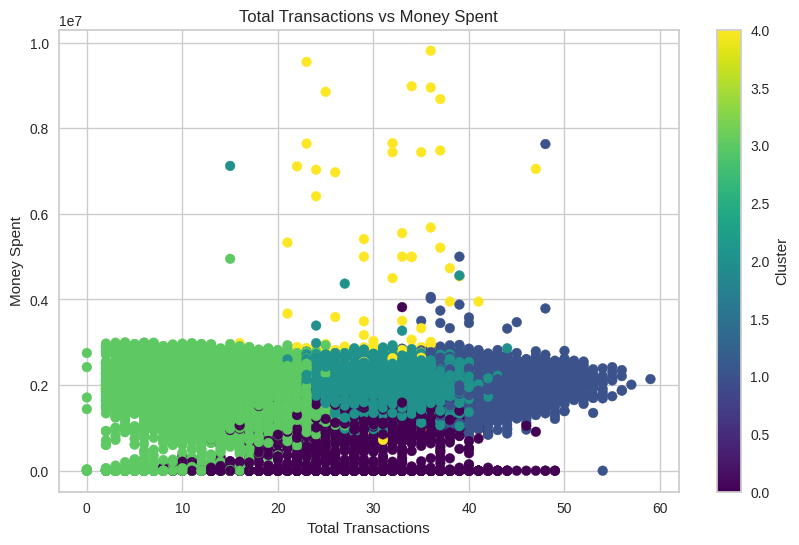

In [95]:
#@markdown
plt.figure(figsize=(10, 6))
plt.scatter(user_1['total transactions'], user_1['money_spent'], c=user_1['cluster'], cmap='viridis')
plt.xlabel('Total Transactions')
plt.ylabel('Money Spent')
plt.title('Total Transactions vs Money Spent')
plt.colorbar(label='Cluster')
plt.show()

#**Evaluation**

##**Province**

###**Cluster Counts by Province**

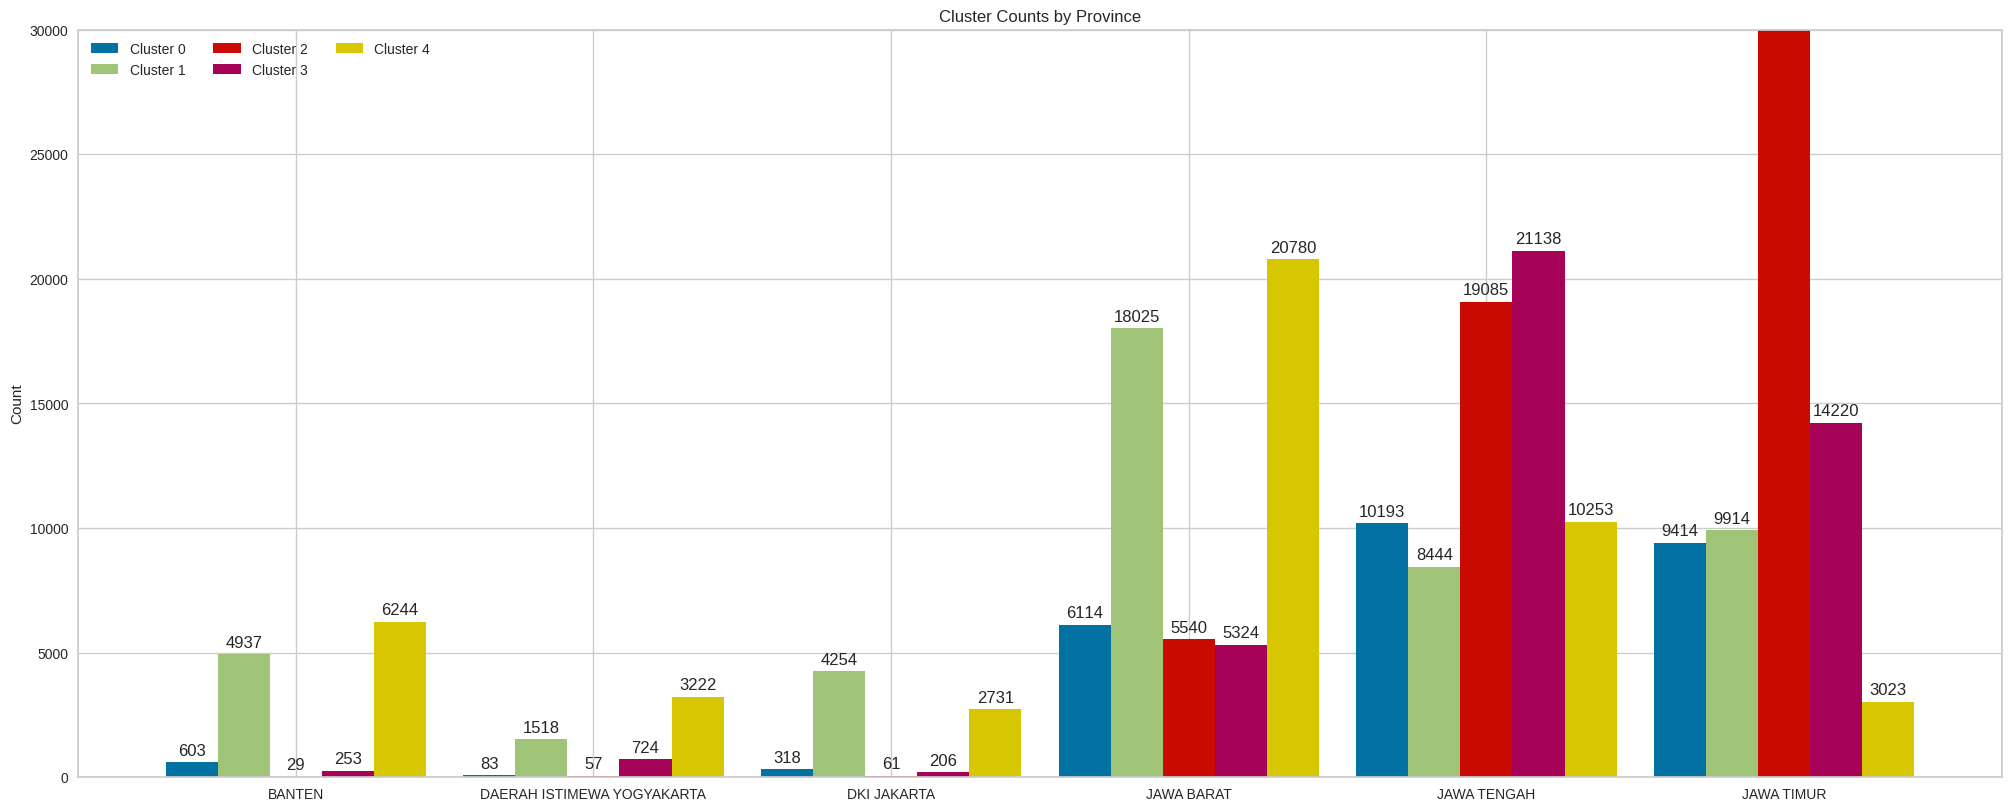

In [96]:
#@markdown
cluster_counts_prov = user_1.groupby(['nama provinsi', 'cluster'])['cluster'].value_counts().unstack(fill_value=0)

province_names = cluster_counts_prov.index.get_level_values('nama provinsi').tolist()

x = np.arange(len(province_names))  # the label locations
width = 0.175  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(20,8))

for attribute, measurement in cluster_counts_prov.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=f'Cluster {attribute}')
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Cluster Counts by Province')
ax.set_xticks(x + width * (multiplier - 1) / 2, province_names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 30000)

plt.show()

###**Total Transactions by Province for each Cluster**

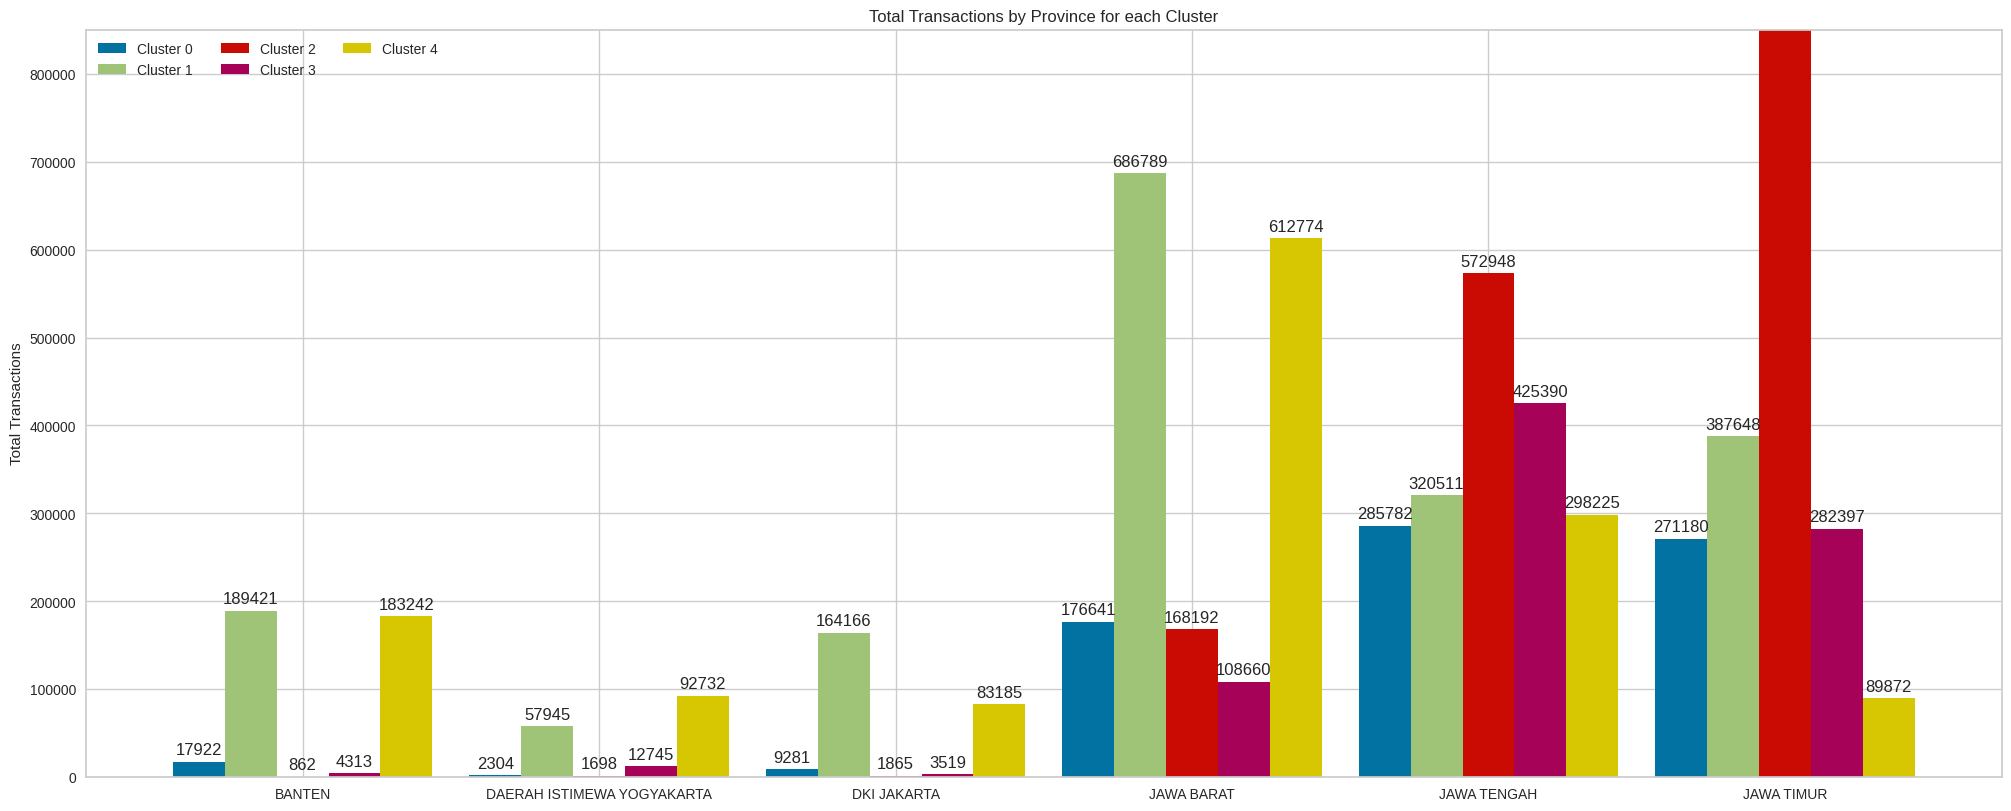

In [97]:
#@markdown
cluster_counts_prov_trans = user_1.groupby(['nama provinsi', 'cluster'])['total transactions'].sum().unstack(fill_value=0)

province_names = cluster_counts_prov_trans.index.get_level_values('nama provinsi').tolist()

x = np.arange(len(province_names))  # the label locations
width = 0.175  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(20,8))

for attribute, measurement in cluster_counts_prov_trans.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=f'Cluster {attribute}')
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Transactions')
ax.set_title('Total Transactions by Province for each Cluster')
ax.set_xticks(x + width * (multiplier - 1) / 2, province_names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 850000)

plt.show()

###**Money Spent by Province for each Cluster**

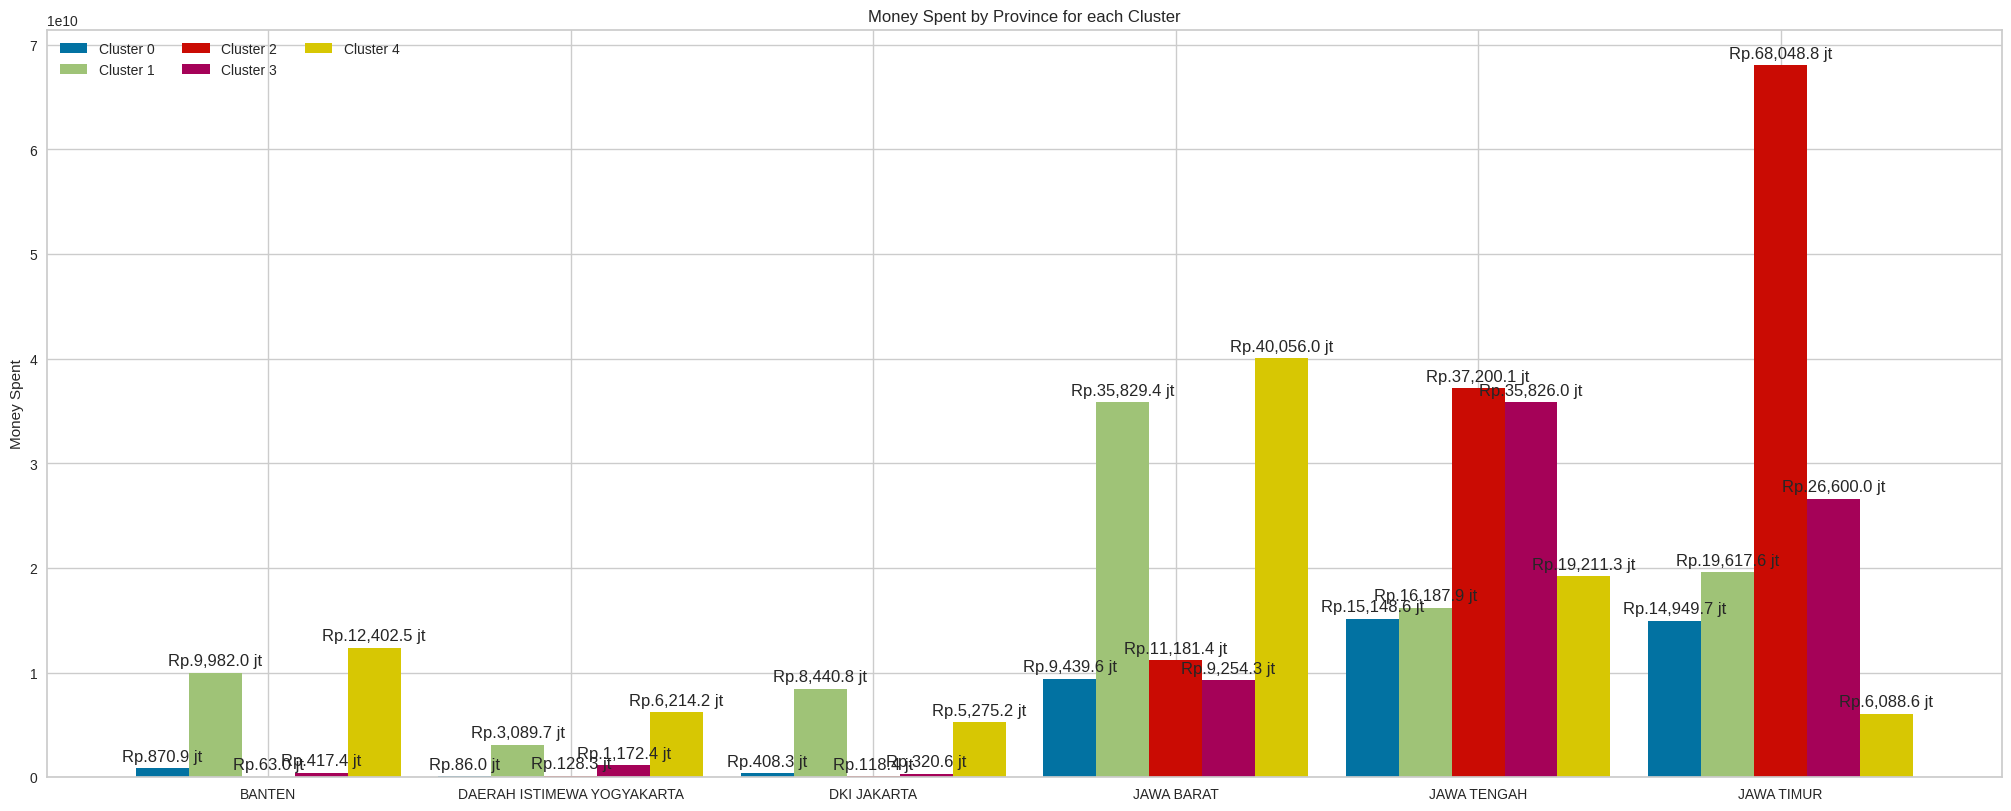

In [98]:
#@markdown
cluster_counts_prov_mon = user_1.groupby(['nama provinsi', 'cluster'])['money_spent'].sum().unstack(fill_value=0)

province_names = cluster_counts_prov_mon.index.get_level_values('nama provinsi').tolist()

x = np.arange(len(province_names))  # the label locations
width = 0.175  # the width of the bars
multiplier = 0
cluster_colors = plt.cm.tab20.colors

fig, ax = plt.subplots(layout='constrained', figsize=(20,8))

def custom_label_format(value):
    value = value/1000000
    return f"Rp.{value:,.1f} jt"

for attribute, measurement in cluster_counts_prov_mon.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=f'Cluster {attribute}')
    formatted_labels = [custom_label_format(val) for val in measurement]
    ax.bar_label(rects, labels=formatted_labels, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Money Spent')
ax.set_title('Money Spent by Province for each Cluster')
ax.set_xticks(x + width * (multiplier - 1) / 2, province_names)
ax.legend(loc='upper left', ncols=3)
# ax.set_ylim(0, 85000000)

plt.show()

## **Gender**

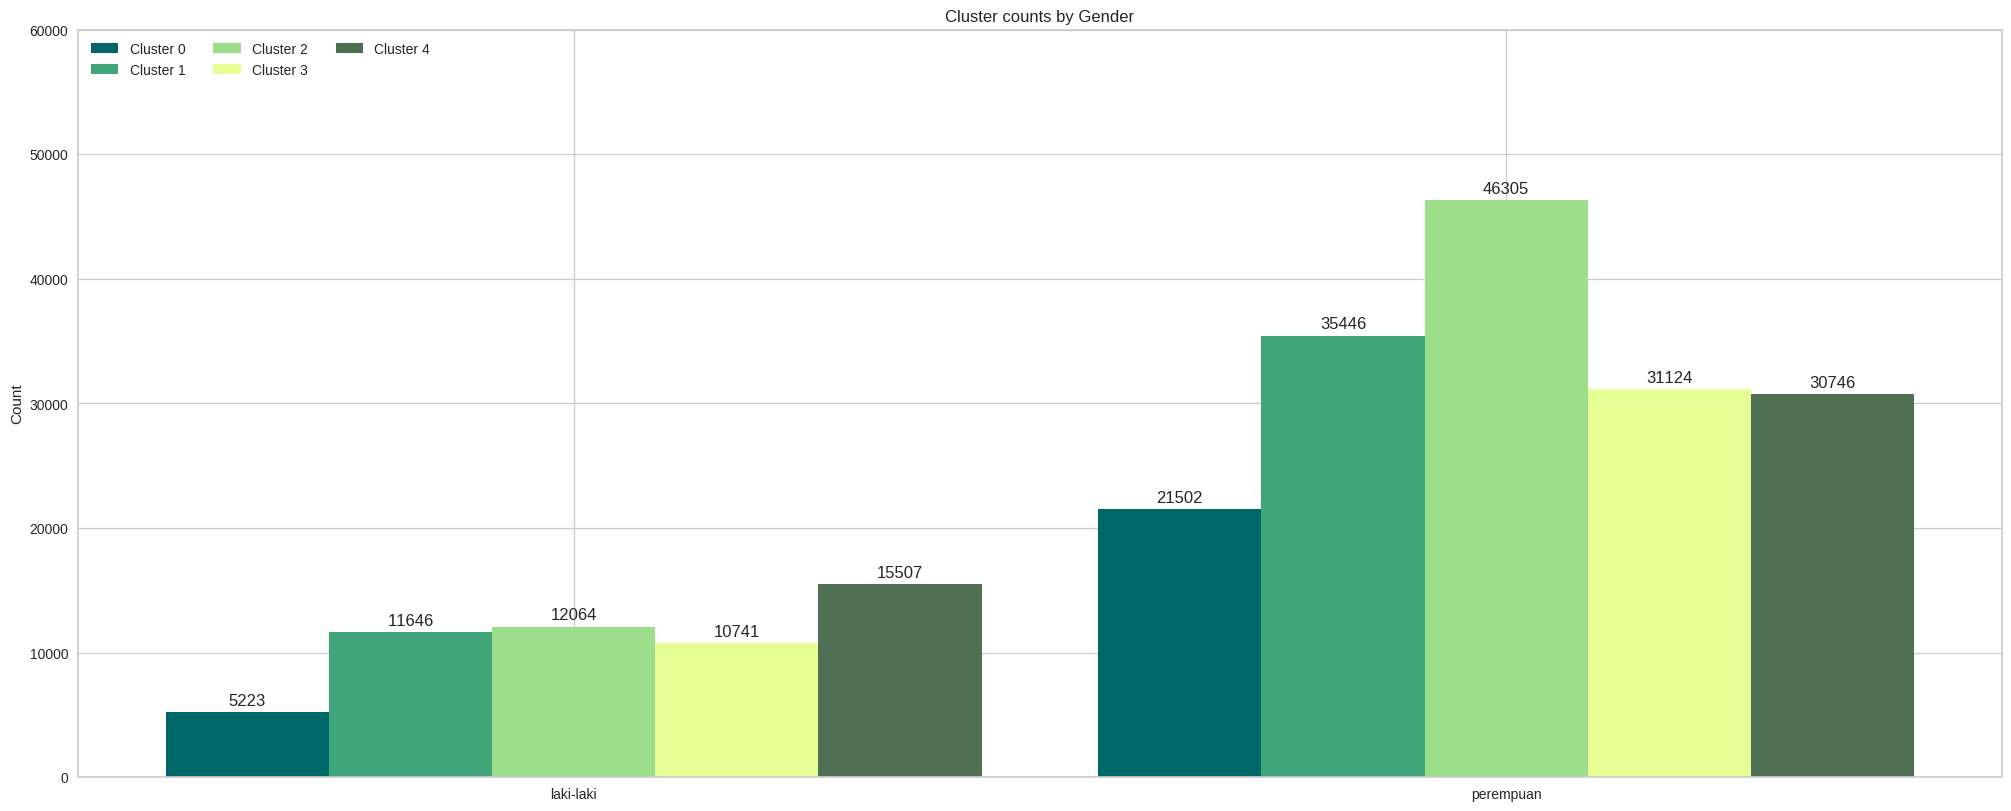

In [99]:
#@markdown
cluster_gen = user_1.groupby(['gender', 'cluster'])['cluster'].count().unstack(fill_value=0)

gender_names = cluster_gen.index.get_level_values('gender').tolist()

x = np.arange(len(gender_names))  # the label locations
width = 0.175  # the width of the bars
multiplier = 0

colors = ['#006769', '#40A578', '#9DDE8B', '#E6FF94', '#4F6F52']
fig, ax = plt.subplots(layout='constrained', figsize=(20,8))

for attribute, measurement in cluster_gen.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=f'Cluster {attribute}', color=colors[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Cluster counts by Gender')
ax.set_xticks(x + width * (multiplier - 1) / 2, gender_names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 60000)

plt.show()

## **Age Group**

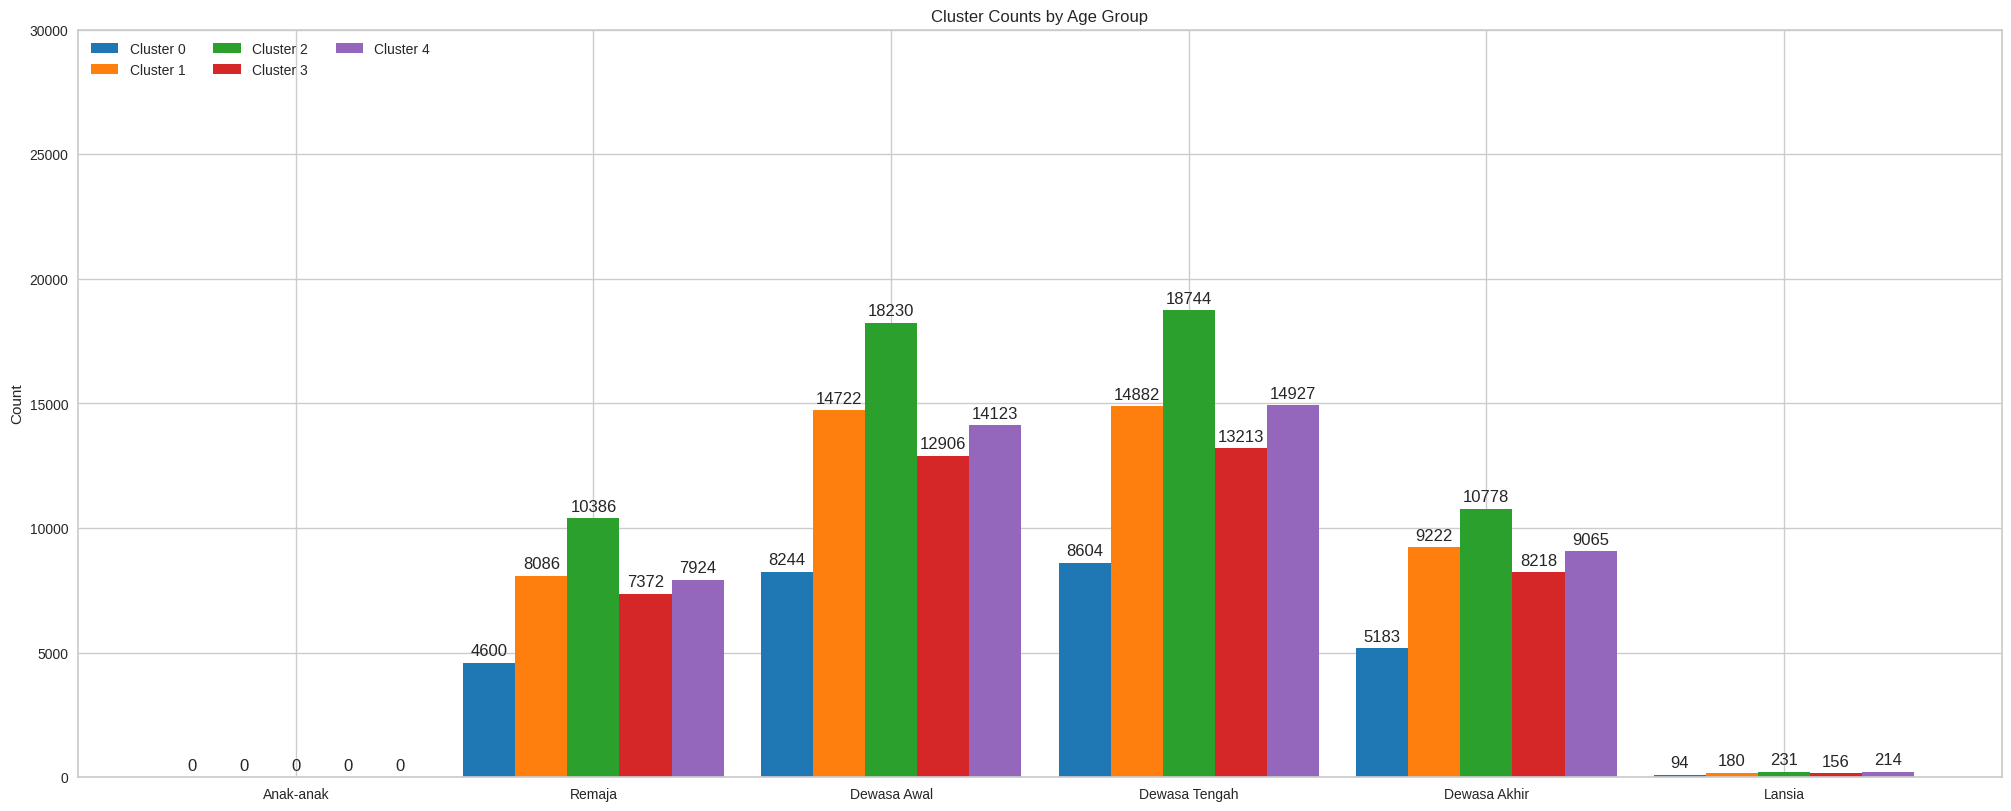

In [100]:
#@markdown
# Mengelompokkan data berdasarkan 'age_group' dan 'cluster'
cluster_counts_age = user_1.groupby(['age_group', 'cluster'])['cluster'].value_counts().unstack(fill_value=0)

ages = cluster_counts_age.index.get_level_values('age_group').tolist()

x = np.arange(len(ages))
width = 0.175
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(20, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plotting setiap cluster dalam kategori usia
for i, (attribute, measurement) in enumerate(cluster_counts_age.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=f'Cluster {attribute}', color=colors[i % len(colors)])
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Count')
ax.set_title('Cluster Counts by Age Group')
ax.set_xticks(x + width * (multiplier - 1) / 2, ages)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 30000)

plt.show()

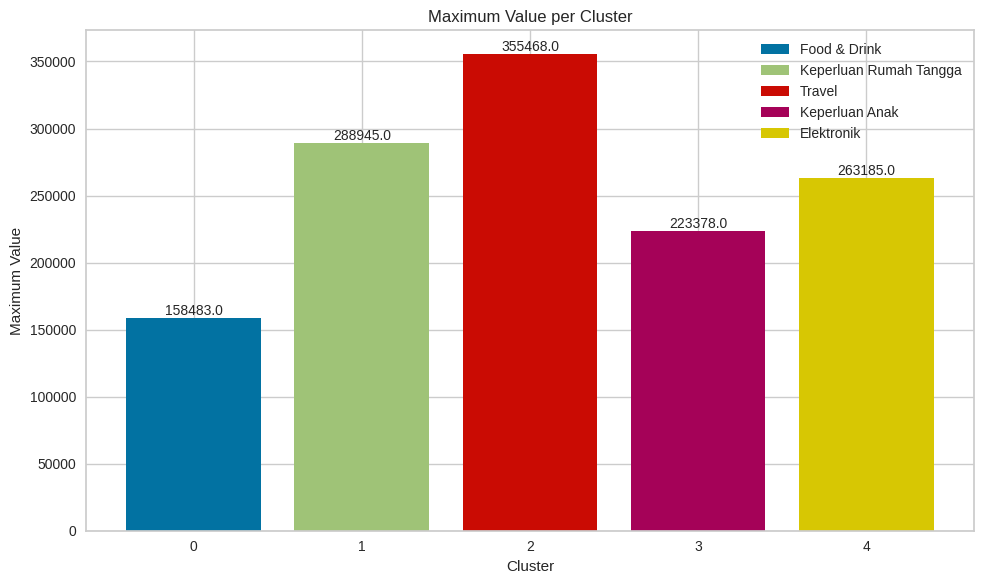

In [101]:
#@markdown
columms_cat_items = ['Food & Drink', 'Keperluan Rumah Tangga', 'Travel', 'Keperluan Anak', 'Elektronik', 'Other',
                     'Top Up Game', 'Otomotif', 'Pulsa', 'Kesehatan', 'Investasi', 'Sewa Motor/Mobil', 'Hotel', 'Tagihan (WIFI, PLN)', 'Fashion', 'Transportasi (Kereta, Pesawat, Kapal, Ride Hailing)']
grouped_data = user_1.groupby('cluster')[columms_cat_items].sum()
cluster_max_values, cluster_max_indices = grouped_data.max(axis=1), grouped_data.idxmax(axis=1)

plt.figure(figsize=(10,6))

bar_labels = []
for index, value in cluster_max_values.items():
  int_index = int(index)
  category_name = columms_cat_items[int_index]
  bar_labels.append(f"{category_name}")
  plt.bar(index, value, label=bar_labels[-1])  # Use the last appended label
  plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

# Add legend with labels
plt.legend(bar_labels)

plt.xlabel("Cluster")
plt.ylabel("Maximum Value")
plt.title("Maximum Value per Cluster")
plt.tight_layout()
plt.show()

#**RFM Analysis + K-means**

In [102]:
import datetime as dt
today_date = dt.datetime(2025, 1, 1)

In [103]:
history = history[~history['user_id'].isin(['SC3371011009009', 'SC3525122021001'])]

In [104]:
unique_transactions_per_user = history.groupby(['user_id', pd.Grouper(key='transaction_date', freq='D')])['transaction_date'].count().unstack().fillna(0).max(axis=1)

In [105]:
recent_transactions = history.groupby('user_id')['transaction_date'].max()
recent_transactions = (today_date - recent_transactions)

In [106]:
days_since_last_transaction = recent_transactions.dt.days.fillna(0).astype(int)

In [107]:
df_rfm = pd.DataFrame({
    'recency': days_since_last_transaction.values,
    'frequency': user_1['total transactions'],
    "monetary": user_1['money_spent']
})

In [108]:
df_rfm

recency  frequency             monetary
0            20       32.0          1,790,000.0
1             2       28.0          1,510,000.0
2            16       35.0          2,360,000.0
3             6       25.0          1,770,000.0
4            12       20.0 1,629,999.9999999998
...         ...        ...                  ...
241644        6       40.0          2,040,000.0
241645        4       42.0          2,160,000.0
241646       28       30.0          1,840,000.0
241647       10       32.0 1,689,999.9999999998
241648        4       29.0          1,970,000.0

[220304 rows x 3 columns]

In [109]:
df_rfm.describe().T

count                 mean                std  min  \
recency   220,304.0   12.536581269518484 13.120909273978697  1.0   
frequency 220,304.0   29.671531156946763 6.8706373578987625  0.0   
monetary  220,304.0 1,877,537.0397269228  356,838.235182218  0.0   

                           25%         50%         75%         max  
recency                    4.0         9.0        17.0       322.0  
frequency                 25.0        30.0        34.0        59.0  
monetary  1,689,999.9999999998 1,910,000.0 2,110,000.0 9,810,000.0

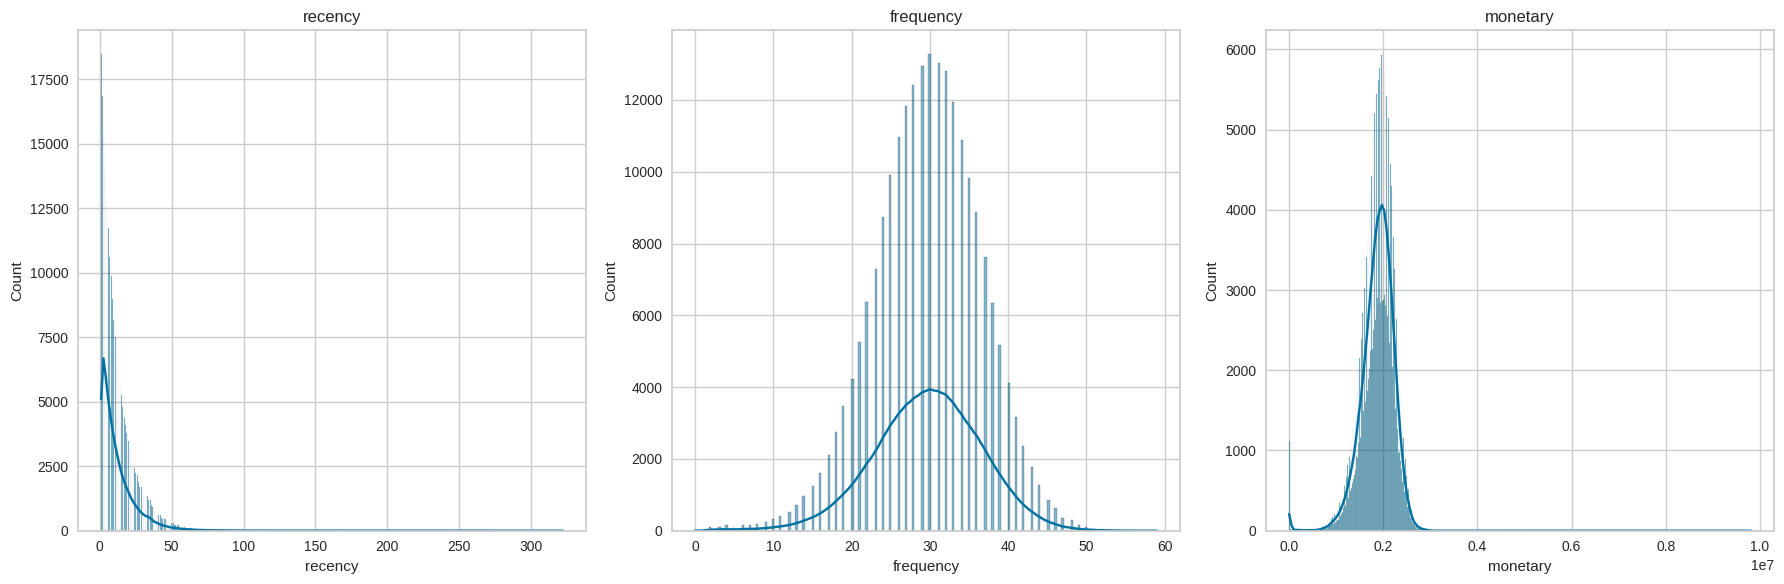

In [110]:
#@markdown
columns = ['recency', 'frequency', 'monetary']

plt.figure(figsize=(18, 6))

for i, col in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(x=col, data=df_rfm, kde=True)
    plt.title(f'{col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

##**Binning RFM Scores**

In [111]:
percentile_percentages = [0, 0.2, 0.4, 0.6, 0.8, 1]
custom_bins = [np.array(percentile_percentages) * df_rfm[col].max() for col in ['frequency']]

for col, bin_edges in zip(['frequency'], custom_bins):
    labels = list(range(1, len(bin_edges)))

    def assign_score(value):
        # Find the index of the first bin edge that is greater than or equal to the value
        idx = np.searchsorted(bin_edges, value, side='right') - 1
        return labels[min(idx, len(labels) - 1)]  # Handle potential out-of-range values

    df_rfm[f"{col}_score"] = df_rfm[col].apply(assign_score)

In [112]:
df_rfm["recency_score"] = pd.qcut(df_rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

# Calculate frequency score based on rank quantiles, assigning labels from 1 to 5 (1 being lowest frequency)
df_rfm["monetary_score"] = pd.qcut(df_rfm["monetary"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [113]:
df_rfm['segment'] = (df_rfm['recency_score'].astype(str) + df_rfm['frequency_score'].astype(str) + df_rfm['monetary_score'].astype(str)).astype('int64')
df_rfm

recency  frequency             monetary  frequency_score  \
0            20       32.0          1,790,000.0                3   
1             2       28.0          1,510,000.0                3   
2            16       35.0          2,360,000.0                3   
3             6       25.0          1,770,000.0                3   
4            12       20.0 1,629,999.9999999998                2   
...         ...        ...                  ...              ...   
241644        6       40.0          2,040,000.0                4   
241645        4       42.0          2,160,000.0                4   
241646       28       30.0          1,840,000.0                3   
241647       10       32.0 1,689,999.9999999998                3   
241648        4       29.0          1,970,000.0                3   

       recency_score monetary_score  segment  
0                  2              2      232  
1                  5              1      531  
2                  2              5      235  
3                  4              2      432  
4                  2              1      221  
...              ...            ...      ...  
241644             4              4      444  
241645             4              5      445  
241646             1              3      133  
241647             3              2      332  
241648             4              3      433  

[220304 rows x 7 columns]

##**RFM Status**

In [114]:
Champion = [555, 554, 544, 545, 454, 455, 445]
Loyal_Customer = [543, 444, 435, 355, 354, 345, 344, 335]
Potential_Loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]
New_Customer = [512, 511, 422, 421, 412, 411, 311]
Promising = [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]
Need_Attention = [535, 534, 443, 434, 343, 334, 325, 324]
Cannot_Lose_Them = [155, 154, 144, 214,215,115, 114, 113]
About_to_Sleep = [331, 321, 312, 221, 213]
At_Risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
Hibernating = [332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211]
Lost = [111, 112, 121, 131, 141, 151]

# Create a function to assign customers to various customer segments based on RFM score
def assign_cust_seg(col):
    list_col = list(col)
    segment = list()
    for score in list_col:
        if score in Champion:
            value = 'Champion'
        elif score in Loyal_Customer:
            value = 'Loyal Customer'
        elif score in Potential_Loyalist:
            value = 'Potential Loyalist'
        elif score in New_Customer:
            value = 'New Customer'
        elif score in Promising:
            value = 'Promising'
        elif score in Need_Attention:
            value = 'Need Attention'
        elif score in Cannot_Lose_Them:
            value = 'Cannot Lose Them'
        elif score in About_to_Sleep:
            value = 'About to Sleep'
        elif score in At_Risk:
            value = 'At Risk'
        elif score in Hibernating:
            value = 'Hibernating'
        elif score in Lost:
            value = 'Lost'
        else:
            value = np.NaN
        segment.append(value)
    return segment

# Assign customers to segments based on their RFM score
df_rfm['segment'] = assign_cust_seg(df_rfm['segment'])
df_rfm

recency  frequency             monetary  frequency_score  \
0            20       32.0          1,790,000.0                3   
1             2       28.0          1,510,000.0                3   
2            16       35.0          2,360,000.0                3   
3             6       25.0          1,770,000.0                3   
4            12       20.0 1,629,999.9999999998                2   
...         ...        ...                  ...              ...   
241644        6       40.0          2,040,000.0                4   
241645        4       42.0          2,160,000.0                4   
241646       28       30.0          1,840,000.0                3   
241647       10       32.0 1,689,999.9999999998                3   
241648        4       29.0          1,970,000.0                3   

       recency_score monetary_score             segment  
0                  2              2         Hibernating  
1                  5              1  Potential Loyalist  
2                  2              5             At Risk  
3                  4              2  Potential Loyalist  
4                  2              1      About to Sleep  
...              ...            ...                 ...  
241644             4              4      Loyal Customer  
241645             4              5            Champion  
241646             1              3             At Risk  
241647             3              2         Hibernating  
241648             4              3  Potential Loyalist  

[220304 rows x 7 columns]

In [115]:
df_rfm = df_rfm[['recency','frequency','monetary','segment']]
df_rfm

recency  frequency             monetary             segment
0            20       32.0          1,790,000.0         Hibernating
1             2       28.0          1,510,000.0  Potential Loyalist
2            16       35.0          2,360,000.0             At Risk
3             6       25.0          1,770,000.0  Potential Loyalist
4            12       20.0 1,629,999.9999999998      About to Sleep
...         ...        ...                  ...                 ...
241644        6       40.0          2,040,000.0      Loyal Customer
241645        4       42.0          2,160,000.0            Champion
241646       28       30.0          1,840,000.0             At Risk
241647       10       32.0 1,689,999.9999999998         Hibernating
241648        4       29.0          1,970,000.0  Potential Loyalist

[220304 rows x 4 columns]

In [116]:
user_1['segment'] = df_rfm['segment'].copy()

In [117]:
rfm_trans=df_rfm[['recency','frequency','monetary']].copy()

##**K-means Implementations on RFM Scores**

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_trans)

StandardScaler()

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

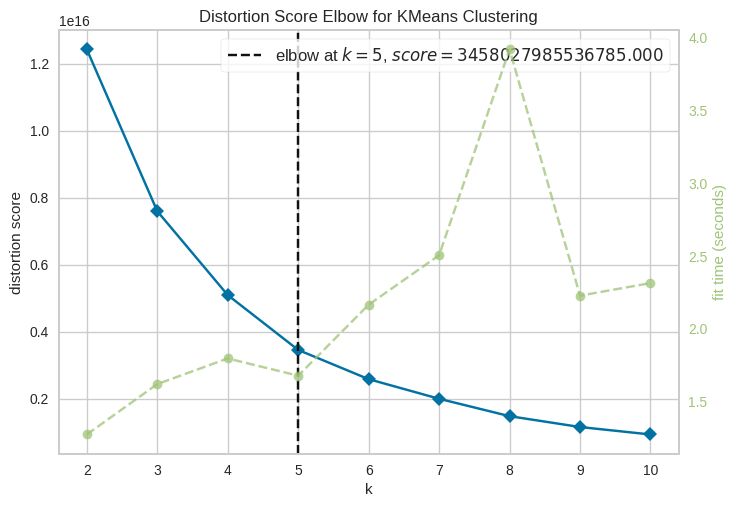

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(rfm_trans)
Elbow_M.show()

In [120]:
#@markdown
#Terapkan KMeans clustering
num_clusters = 5  # Tentukan jumlah kluster
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(rfm_trans)

# Tambahkan label kluster ke DataFrame hasil PCA
rfm_trans['Cluster'] = kmeans.labels_
# Tampilkan beberapa baris pertama dari DataFrame dengan label kluster
rfm_trans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


recency  frequency             monetary  Cluster
0            20       32.0          1,790,000.0        4
1             2       28.0          1,510,000.0        0
2            16       35.0          2,360,000.0        2
3             6       25.0          1,770,000.0        4
4            12       20.0 1,629,999.9999999998        4
...         ...        ...                  ...      ...
241644        6       40.0          2,040,000.0        1
241645        4       42.0          2,160,000.0        2
241646       28       30.0          1,840,000.0        4
241647       10       32.0 1,689,999.9999999998        4
241648        4       29.0          1,970,000.0        1

[220304 rows x 4 columns]

In [121]:
user_1.set_index('user_id', inplace=True)

In [122]:
user_1['cluster_rfm'] = kmeans.labels_

In [123]:
user_1

full_name     gender          money_spent  \
user_id                                                                    
SC3402052002003        ISDANIAR KHAFIYAH  perempuan          1,790,000.0   
SC3402052002005            DEBBY ORINBAO  perempuan          1,510,000.0   
SC3402052002007  MUHAMMAD WENEHEN WIRATA  laki-laki          2,360,000.0   
SC3402052002009                  GANINDA  perempuan          1,770,000.0   
SC3402052002010     HARJOKO IHSAN S.Sos.  laki-laki 1,629,999.9999999998   
...                                  ...        ...                  ...   
SC3504011002009  dr. MEIVA SETIYANINGSIH  perempuan          2,040,000.0   
SC3504011002011            DIAN S.I.Kom.  perempuan          2,160,000.0   
SC3504011002012               SUSILAWATI  perempuan          1,840,000.0   
SC3504011002013   Dr. MARYANI NINDA S.P.  perempuan 1,689,999.9999999998   
SC3504011002014           FITRI AGUSTIEN  perempuan          1,970,000.0   

                   refund  wallet_balance  join_date      birth  \
user_id                                                           
SC3402052002003 200,000.0       450,000.0 2023-10-30 2003-09-20   
SC3402052002005 300,000.0       470,000.0 2023-11-03 2005-02-28   
SC3402052002007 130,000.0       430,000.0 2023-11-28 1996-07-21   
SC3402052002009  30,000.0       190,000.0 2023-11-01 1977-10-07   
SC3402052002010  80,000.0       190,000.0 2023-12-08 2006-06-18   
...                   ...             ...        ...        ...   
SC3504011002009 270,000.0       620,000.0 2023-10-14 1973-06-08   
SC3504011002011 130,000.0       440,000.0 2023-12-06 1992-08-13   
SC3504011002012 200,000.0       460,000.0 2023-11-27 1975-08-08   
SC3504011002013 190,000.0       580,000.0 2023-12-16 1993-04-28   
SC3504011002014 170,000.0       660,000.0 2023-12-14 1993-05-25   

                              nama provinsi nama kabupaten nama kecamatan  \
user_id                                                                     
SC3402052002003  DAERAH ISTIMEWA YOGYAKARTA         BANTUL  BAMBANGLIPURO   
SC3402052002005  DAERAH ISTIMEWA YOGYAKARTA         BANTUL  BAMBANGLIPURO   
SC3402052002007  DAERAH ISTIMEWA YOGYAKARTA         BANTUL  BAMBANGLIPURO   
SC3402052002009  DAERAH ISTIMEWA YOGYAKARTA         BANTUL  BAMBANGLIPURO   
SC3402052002010  DAERAH ISTIMEWA YOGYAKARTA         BANTUL  BAMBANGLIPURO   
...                                     ...            ...            ...   
SC3504011002009                  JAWA TIMUR    TULUNGAGUNG    TULUNGAGUNG   
SC3504011002011                  JAWA TIMUR    TULUNGAGUNG    TULUNGAGUNG   
SC3504011002012                  JAWA TIMUR    TULUNGAGUNG    TULUNGAGUNG   
SC3504011002013                  JAWA TIMUR    TULUNGAGUNG    TULUNGAGUNG   
SC3504011002014                  JAWA TIMUR    TULUNGAGUNG    TULUNGAGUNG   

                 ...  Sewa Motor/Mobil Tagihan (WIFI, PLN)  Top Up Game  \
user_id          ...                                                      
SC3402052002003  ...               0.0                 0.0          0.0   
SC3402052002005  ...               0.0                 3.0          0.0   
SC3402052002007  ...               0.0                 4.0          0.0   
SC3402052002009  ...               0.0                 0.0          0.0   
SC3402052002010  ...               0.0                 3.0          0.0   
...              ...               ...                 ...          ...   
SC3504011002009  ...               0.0                 4.0          4.0   
SC3504011002011  ...               3.0                 0.0          0.0   
SC3504011002012  ...               3.0                 0.0          0.0   
SC3504011002013  ...               3.0                 3.0          0.0   
SC3504011002014  ...               2.0                 0.0          0.0   

                 Travel  total transactions  Fashion  \
user_id                                                
SC3402052002003     4.0                32.0      7.0   
SC3402052002005     2.0 

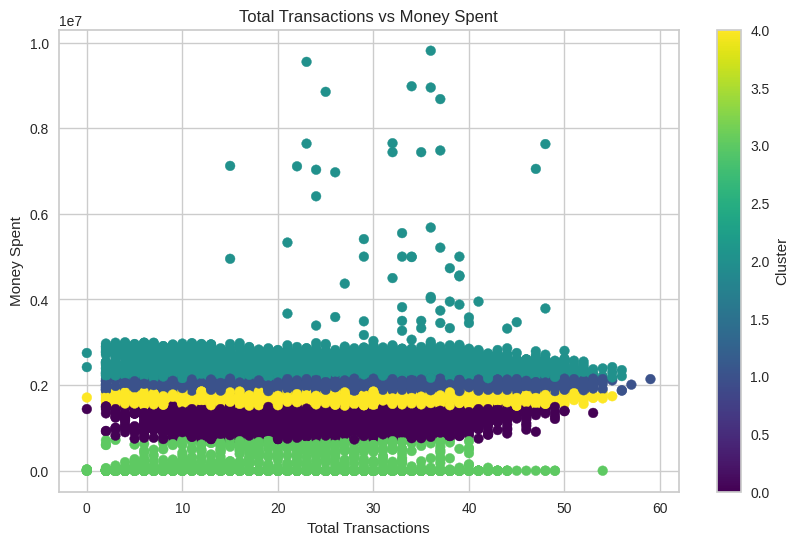

In [124]:
#@markdown
plt.figure(figsize=(10, 6))
plt.scatter(user_1['total transactions'], user_1['money_spent'], c=user_1['cluster_rfm'], cmap='viridis')
plt.xlabel('Total Transactions')
plt.ylabel('Money Spent')
plt.title('Total Transactions vs Money Spent')
plt.colorbar(label='Cluster')
plt.show()

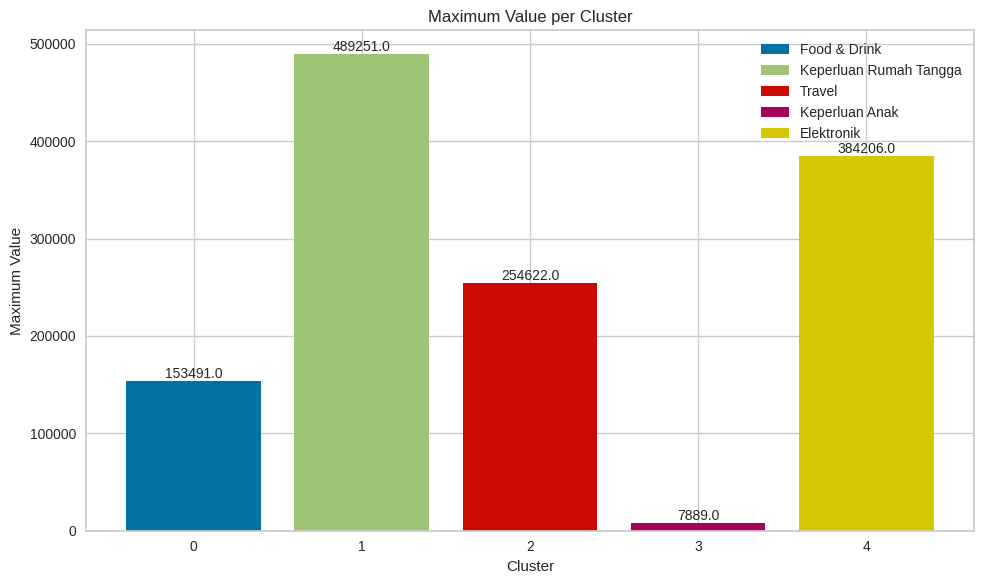

In [125]:
#@markdown
grouped_data_rfm = user_1.groupby('cluster_rfm')[columms_cat_items].sum()
cluster_max_values_rfm, cluster_max_indices_rfm = grouped_data_rfm.max(axis=1), grouped_data_rfm.idxmax(axis=1)

plt.figure(figsize=(10,6))

bar_labels = []
for index, value in cluster_max_values_rfm.items():
  int_index = int(index)
  category_name = columms_cat_items[int_index]
  bar_labels.append(f"{category_name}")
  plt.bar(index, value, label=bar_labels[-1])  # Use the last appended label
  plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

# Add legend with labels
plt.legend(bar_labels)

plt.xlabel("Cluster")
plt.ylabel("Maximum Value")
plt.title("Maximum Value per Cluster")
plt.tight_layout()
plt.show()

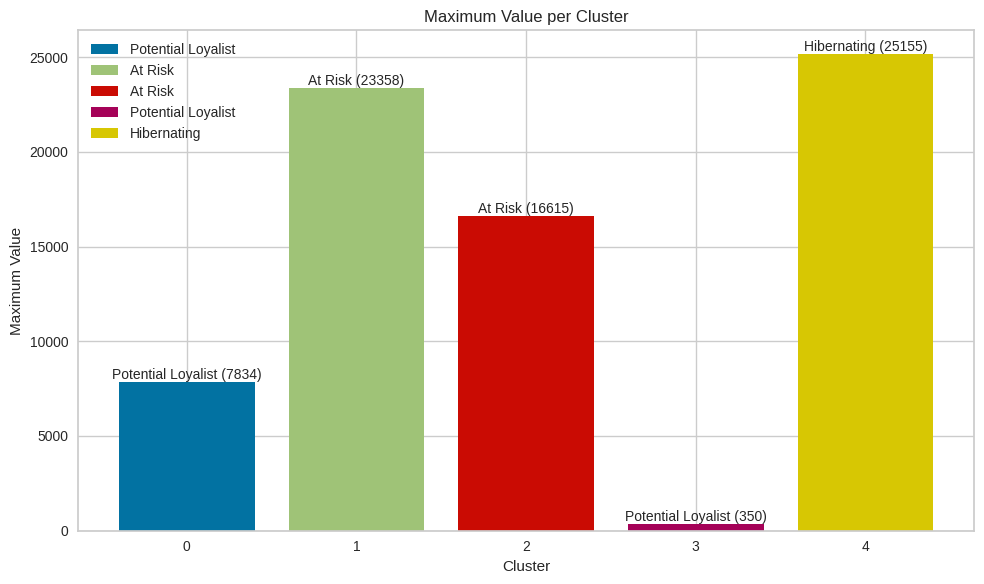

In [214]:
#@markdown
rfm_segment = user_1.groupby('cluster_rfm')['segment'].value_counts().unstack(fill_value=0)

cluster_max_values_rfm_1 = rfm_segment.max(axis=1)
cluster_max_indices_rfm_1 = rfm_segment.idxmax(axis=1)

plt.figure(figsize=(10,6))
bar_labels = cluster_max_indices_rfm_1.tolist()

for index, value in zip(cluster_max_values_rfm_1.items(), bar_labels):
    plt.bar(index[0], index[1])
    plt.text(index[0], index[1] + 0.1, f"{value} ({index[1]})", ha='center', va='bottom', fontsize=10)

plt.legend(bar_labels)

plt.xlabel("Cluster")
plt.ylabel("Maximum Value")
plt.title("Maximum Value per Cluster")
plt.tight_layout()
plt.show()